# Imports

In [1]:
import numpy as np
import pandas as pd
import random 
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpmig
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
from tqdm import tqdm
import shutil

# Import the data frame

In [2]:
df = pd.read_excel("(English translate)20210426_image_classification_Imbesideyou.xlsx", skiprows = 1)

In [3]:
df.head()

,Unnamed: 0,NO,File name,Person ID,"Mask: Y/N\n""-"" is not for face images"
0,NaN,1.0,187dcd69-e620-46b5-b40e-78020096caf4_00000850_...,1.0,N
1,NaN,2.0,187dcd69-e620-46b5-b40e-78020096caf4_00000851_...,1.0,N
2,NaN,3.0,187dcd69-e620-46b5-b40e-78020096caf4_00000852_...,1.0,N
3,NaN,4.0,187dcd69-e620-46b5-b40e-78020096caf4_00000853_...,1.0,N
4,NaN,5.0,187dcd69-e620-46b5-b40e-78020096caf4_00000854_...,1.0,N


# Exploratory data analysis

In [4]:
df.columns

Index(['Unnamed: 0', 'NO', 'File name', 'Person ID',
       'Mask: Y/N\n"-" is not for face images'],
      dtype='object')

In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.set_index('NO')

,File name,Person ID,"Mask: Y/N\n""-"" is not for face images"
NO,,,
1.0,187dcd69-e620-46b5-b40e-78020096caf4_00000850_...,1.0,N
2.0,187dcd69-e620-46b5-b40e-78020096caf4_00000851_...,1.0,N
3.0,187dcd69-e620-46b5-b40e-78020096caf4_00000852_...,1.0,N
4.0,187dcd69-e620-46b5-b40e-78020096caf4_00000853_...,1.0,N
5.0,187dcd69-e620-46b5-b40e-78020096caf4_00000854_...,1.0,N
...,...,...,...
57894.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,2.0,N
57895.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,0.0,-
57896.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,0.0,-


In [7]:
df.head()

,NO,File name,Person ID,"Mask: Y/N\n""-"" is not for face images"
0,1.0,187dcd69-e620-46b5-b40e-78020096caf4_00000850_...,1.0,N
1,2.0,187dcd69-e620-46b5-b40e-78020096caf4_00000851_...,1.0,N
2,3.0,187dcd69-e620-46b5-b40e-78020096caf4_00000852_...,1.0,N
3,4.0,187dcd69-e620-46b5-b40e-78020096caf4_00000853_...,1.0,N
4,5.0,187dcd69-e620-46b5-b40e-78020096caf4_00000854_...,1.0,N


In [8]:
no_mask_images = list(df[df['Mask: Y/N\n"-" is not for face images']=='N']['File name'])

In [9]:
len(no_mask_images)

30082

In [10]:
mask_images = list(df[df['Mask: Y/N\n"-" is not for face images']=='Y']['File name'])

In [11]:
len(mask_images)

5062

In [12]:
df['Person ID'].unique()

array([1., 0., 4., 3., 2.])

In [13]:
train_dir = 'faces meeting/'
train_dir

'faces meeting/'

In [14]:
len(no_mask_images)

30082

In [15]:
df = df[df['Mask: Y/N\n"-" is not for face images']=='N']

In [16]:
df = df.reset_index()
df

,index,NO,File name,Person ID,"Mask: Y/N\n""-"" is not for face images"
0,0,1.0,187dcd69-e620-46b5-b40e-78020096caf4_00000850_...,1.0,N
1,1,2.0,187dcd69-e620-46b5-b40e-78020096caf4_00000851_...,1.0,N
2,2,3.0,187dcd69-e620-46b5-b40e-78020096caf4_00000852_...,1.0,N
3,3,4.0,187dcd69-e620-46b5-b40e-78020096caf4_00000853_...,1.0,N
4,4,5.0,187dcd69-e620-46b5-b40e-78020096caf4_00000854_...,1.0,N
...,...,...,...,...,...
30077,57891,57892.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,1.0,N
30078,57892,57893.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,4.0,N
30079,57893,57894.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,2.0,N
30080,57896,57897.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...,1.0,N


# Data Visualization

In [17]:
nrows = 5
ncols = 5
def plot_image(folder, names):
    pic_index = np.random.randint(0, len(names))
    img_path = os.path.join(folder, names[pic_index])
    img = mpmig.imread(img_path)
    plt.axis('Off')
    plt.imshow(img)

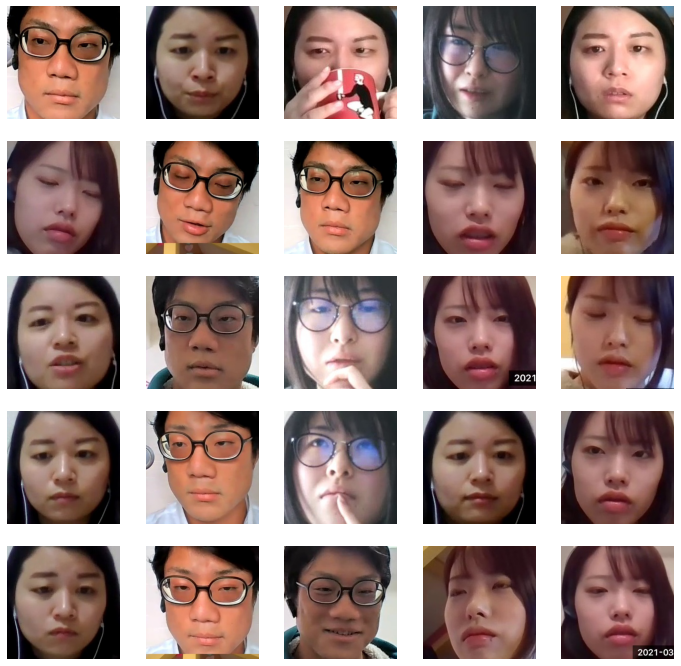

In [18]:
plt.figure(figsize=(12, 12))
for i in range(nrows*ncols):
    ax = plt.subplot(nrows, ncols, i+1)
    plot_image(train_dir, no_mask_images)

In [19]:
def image_feature(direc):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(direc):
        fname='faces meeting'+'/'+i
        img=image.load_img(fname,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

In [ ]:
img_features,img_name=image_feature(no_mask_images)

  0%|                                                                                        | 0/30082 [00:00<?, ?it/s]

1/1 [==============================] - 8s 8s/step


  0%|                                                                             | 1/30082 [00:07<63:39:04,  7.62s/it]

1/1 [==============================] - 0s 28ms/step


  0%|                                                                             | 3/30082 [00:07<16:54:04,  2.02s/it]

1/1 [==============================] - 0s 29ms/step


  0%|                                                                              | 5/30082 [00:07<8:28:23,  1.01s/it]

1/1 [==============================] - 0s 31ms/step


  0%|                                                                              | 7/30082 [00:08<5:07:42,  1.63it/s]

1/1 [==============================] - 0s 23ms/step


  0%|                                                                              | 9/30082 [00:08<3:23:52,  2.46it/s]

1/1 [==============================] - 0s 29ms/step


  0%|                                                                             | 11/30082 [00:08<2:24:12,  3.48it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                             | 13/30082 [00:08<1:46:54,  4.69it/s]

1/1 [==============================] - 0s 23ms/step


  0%|                                                                             | 15/30082 [00:08<1:22:24,  6.08it/s]

1/1 [==============================] - 0s 24ms/step


  0%|                                                                             | 17/30082 [00:08<1:05:57,  7.60it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                               | 19/30082 [00:08<55:03,  9.10it/s]

1/1 [==============================] - 0s 30ms/step


  0%|                                                                               | 21/30082 [00:08<48:38, 10.30it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                               | 23/30082 [00:09<43:57, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                               | 25/30082 [00:09<39:56, 12.54it/s]

1/1 [==============================] - 0s 29ms/step


  0%|                                                                               | 27/30082 [00:09<37:56, 13.20it/s]

1/1 [==============================] - 0s 27ms/step


  0%|                                                                               | 29/30082 [00:09<36:19, 13.79it/s]

1/1 [==============================] - 0s 28ms/step


  0%|                                                                               | 31/30082 [00:09<35:27, 14.13it/s]

1/1 [==============================] - 0s 27ms/step


  0%|                                                                               | 33/30082 [00:09<34:56, 14.34it/s]

1/1 [==============================] - 0s 25ms/step


  0%|                                                                               | 35/30082 [00:09<33:56, 14.76it/s]

1/1 [==============================] - 0s 31ms/step


  0%|                                                                               | 37/30082 [00:09<33:45, 14.83it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                               | 39/30082 [00:10<33:11, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


  0%|                                                                               | 41/30082 [00:10<33:06, 15.12it/s]

1/1 [==============================] - 0s 28ms/step


  0%|                                                                               | 43/30082 [00:10<32:47, 15.26it/s]

1/1 [==============================] - 0s 27ms/step


  0%|                                                                               | 45/30082 [00:10<32:14, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


  0%|                                                                               | 47/30082 [00:10<31:39, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 49/30082 [00:10<31:34, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▏                                                                              | 51/30082 [00:10<31:55, 15.67it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▏                                                                              | 53/30082 [00:10<33:58, 14.73it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 55/30082 [00:11<33:40, 14.86it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 57/30082 [00:11<32:51, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                                                              | 59/30082 [00:11<33:12, 15.07it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                                                              | 61/30082 [00:11<33:11, 15.08it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▏                                                                              | 63/30082 [00:11<32:37, 15.33it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▏                                                                              | 65/30082 [00:11<32:38, 15.33it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 67/30082 [00:11<32:22, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


  0%|▏                                                                              | 69/30082 [00:12<32:08, 15.56it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                                                              | 71/30082 [00:12<32:35, 15.35it/s]

1/1 [==============================] - 0s 32ms/step


  0%|▏                                                                              | 73/30082 [00:12<32:41, 15.30it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                                                              | 75/30082 [00:12<32:27, 15.41it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▏                                                                              | 77/30082 [00:12<32:26, 15.42it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▏                                                                              | 79/30082 [00:12<32:48, 15.24it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                                                              | 81/30082 [00:12<33:35, 14.89it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 83/30082 [00:12<32:58, 15.16it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▏                                                                              | 85/30082 [00:13<32:30, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▏                                                                              | 87/30082 [00:13<32:16, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▏                                                                              | 89/30082 [00:13<31:59, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▏                                                                              | 91/30082 [00:13<32:00, 15.62it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▏                                                                              | 93/30082 [00:13<31:32, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▏                                                                              | 95/30082 [00:13<31:06, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▎                                                                              | 97/30082 [00:13<30:58, 16.14it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▎                                                                              | 99/30082 [00:13<31:19, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▎                                                                             | 101/30082 [00:14<31:51, 15.68it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 103/30082 [00:14<31:55, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▎                                                                             | 105/30082 [00:14<31:47, 15.72it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 107/30082 [00:14<32:09, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▎                                                                             | 109/30082 [00:14<32:13, 15.50it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▎                                                                             | 111/30082 [00:14<33:37, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▎                                                                             | 113/30082 [00:14<33:00, 15.14it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▎                                                                             | 115/30082 [00:15<33:04, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 117/30082 [00:15<32:31, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▎                                                                             | 119/30082 [00:15<32:55, 15.17it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 121/30082 [00:15<33:10, 15.05it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▎                                                                             | 123/30082 [00:15<33:40, 14.83it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▎                                                                             | 125/30082 [00:15<33:38, 14.84it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 127/30082 [00:15<33:24, 14.94it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▎                                                                             | 129/30082 [00:15<33:49, 14.76it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 131/30082 [00:16<33:22, 14.95it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▎                                                                             | 133/30082 [00:16<33:22, 14.96it/s]

1/1 [==============================] - 0s 29ms/step


  0%|▎                                                                             | 135/30082 [00:16<33:01, 15.11it/s]

1/1 [==============================] - 0s 24ms/step


  0%|▎                                                                             | 137/30082 [00:16<33:22, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


  0%|▎                                                                             | 139/30082 [00:16<33:24, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▎                                                                             | 141/30082 [00:16<32:41, 15.26it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▎                                                                             | 143/30082 [00:16<32:19, 15.44it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▍                                                                             | 145/30082 [00:16<32:05, 15.55it/s]

1/1 [==============================] - 0s 25ms/step


  0%|▍                                                                             | 147/30082 [00:17<31:28, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


  0%|▍                                                                             | 149/30082 [00:17<31:19, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▍                                                                             | 151/30082 [00:17<30:56, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▍                                                                             | 153/30082 [00:17<31:10, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▍                                                                             | 155/30082 [00:17<31:13, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▍                                                                             | 157/30082 [00:17<31:04, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▍                                                                             | 159/30082 [00:17<31:25, 15.87it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▍                                                                             | 161/30082 [00:17<31:25, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▍                                                                             | 163/30082 [00:18<30:45, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▍                                                                             | 165/30082 [00:18<30:01, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▍                                                                             | 167/30082 [00:18<30:02, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▍                                                                             | 169/30082 [00:18<30:20, 16.43it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▍                                                                             | 171/30082 [00:18<30:51, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▍                                                                             | 173/30082 [00:18<30:47, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▍                                                                             | 175/30082 [00:18<30:38, 16.27it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▍                                                                             | 177/30082 [00:18<31:24, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▍                                                                             | 179/30082 [00:19<32:03, 15.54it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▍                                                                             | 181/30082 [00:19<33:30, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▍                                                                             | 183/30082 [00:19<33:59, 14.66it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▍                                                                             | 185/30082 [00:19<34:33, 14.42it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▍                                                                             | 187/30082 [00:19<35:35, 14.00it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▍                                                                             | 189/30082 [00:19<35:38, 13.98it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▍                                                                             | 191/30082 [00:19<34:36, 14.39it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                                                             | 193/30082 [00:20<34:25, 14.47it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                                                             | 195/30082 [00:20<34:20, 14.51it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                                                             | 197/30082 [00:20<35:09, 14.17it/s]

1/1 [==============================] - 0s 47ms/step


  1%|▌                                                                             | 199/30082 [00:20<45:30, 10.94it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                                                             | 201/30082 [00:20<42:21, 11.76it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                                                             | 203/30082 [00:20<40:57, 12.16it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                                                             | 205/30082 [00:21<38:50, 12.82it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▌                                                                             | 207/30082 [00:21<38:24, 12.96it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                                                             | 209/30082 [00:21<37:24, 13.31it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                                                             | 211/30082 [00:21<37:36, 13.24it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                                                             | 213/30082 [00:21<37:14, 13.37it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▌                                                                             | 215/30082 [00:21<38:15, 13.01it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                                                             | 217/30082 [00:21<38:08, 13.05it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▌                                                                             | 219/30082 [00:22<39:18, 12.66it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▌                                                                             | 221/30082 [00:22<42:16, 11.77it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                                                             | 223/30082 [00:22<42:12, 11.79it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                                                             | 225/30082 [00:22<41:38, 11.95it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                                                             | 227/30082 [00:22<39:44, 12.52it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▌                                                                             | 229/30082 [00:22<37:49, 13.16it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▌                                                                             | 231/30082 [00:23<36:36, 13.59it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                                                             | 233/30082 [00:23<36:02, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                                                             | 235/30082 [00:23<36:07, 13.77it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▌                                                                             | 237/30082 [00:23<36:29, 13.63it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▌                                                                             | 239/30082 [00:23<36:07, 13.77it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                                                             | 241/30082 [00:23<36:16, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▋                                                                             | 243/30082 [00:23<35:35, 13.97it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▋                                                                             | 245/30082 [00:24<35:41, 13.93it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▋                                                                             | 247/30082 [00:24<35:45, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▋                                                                             | 249/30082 [00:24<36:30, 13.62it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▋                                                                             | 251/30082 [00:24<38:19, 12.97it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▋                                                                             | 253/30082 [00:24<40:37, 12.24it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▋                                                                             | 255/30082 [00:24<37:55, 13.11it/s]

1/1 [==============================] - 0s 39ms/step


  1%|▋                                                                             | 257/30082 [00:25<39:36, 12.55it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▋                                                                             | 259/30082 [00:25<37:35, 13.22it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▋                                                                             | 261/30082 [00:25<37:38, 13.20it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▋                                                                             | 263/30082 [00:25<36:31, 13.60it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▋                                                                             | 265/30082 [00:25<36:10, 13.74it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▋                                                                             | 267/30082 [00:25<36:15, 13.70it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▋                                                                             | 269/30082 [00:25<36:27, 13.63it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▋                                                                             | 271/30082 [00:26<34:56, 14.22it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▋                                                                             | 273/30082 [00:26<34:23, 14.45it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▋                                                                             | 275/30082 [00:26<35:57, 13.82it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▋                                                                             | 277/30082 [00:26<37:05, 13.39it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▋                                                                             | 279/30082 [00:26<37:32, 13.23it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▋                                                                             | 281/30082 [00:26<37:31, 13.24it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▋                                                                             | 283/30082 [00:26<38:32, 12.88it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▋                                                                             | 285/30082 [00:27<38:09, 13.02it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▋                                                                             | 287/30082 [00:27<37:57, 13.08it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▋                                                                             | 289/30082 [00:27<38:25, 12.92it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▊                                                                             | 291/30082 [00:27<36:48, 13.49it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▊                                                                             | 293/30082 [00:27<36:00, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 295/30082 [00:27<35:30, 13.98it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▊                                                                             | 297/30082 [00:27<34:32, 14.37it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 299/30082 [00:28<33:43, 14.72it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▊                                                                             | 301/30082 [00:28<33:24, 14.86it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 303/30082 [00:28<32:26, 15.30it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▊                                                                             | 305/30082 [00:28<32:38, 15.20it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▊                                                                             | 307/30082 [00:28<32:31, 15.26it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▊                                                                             | 309/30082 [00:28<32:42, 15.17it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▊                                                                             | 311/30082 [00:28<32:22, 15.32it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 313/30082 [00:29<32:16, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▊                                                                             | 315/30082 [00:29<32:23, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▊                                                                             | 317/30082 [00:29<32:22, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▊                                                                             | 319/30082 [00:29<32:11, 15.41it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▊                                                                             | 321/30082 [00:29<32:15, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▊                                                                             | 323/30082 [00:29<31:43, 15.64it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▊                                                                             | 325/30082 [00:29<32:02, 15.48it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 327/30082 [00:29<31:28, 15.76it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▊                                                                             | 329/30082 [00:30<31:31, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▊                                                                             | 331/30082 [00:30<30:52, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▊                                                                             | 333/30082 [00:30<31:39, 15.66it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▊                                                                             | 335/30082 [00:30<31:49, 15.58it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▊                                                                             | 337/30082 [00:30<31:25, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▉                                                                             | 339/30082 [00:30<31:10, 15.90it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▉                                                                             | 341/30082 [00:30<31:55, 15.53it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▉                                                                             | 343/30082 [00:30<32:39, 15.18it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▉                                                                             | 345/30082 [00:31<32:50, 15.09it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▉                                                                             | 347/30082 [00:31<33:07, 14.96it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▉                                                                             | 349/30082 [00:31<32:56, 15.04it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▉                                                                             | 351/30082 [00:31<32:42, 15.15it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▉                                                                             | 353/30082 [00:31<32:20, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▉                                                                             | 355/30082 [00:31<32:06, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▉                                                                             | 357/30082 [00:31<32:51, 15.08it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▉                                                                             | 359/30082 [00:31<32:18, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▉                                                                             | 361/30082 [00:32<30:50, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▉                                                                             | 363/30082 [00:32<30:57, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▉                                                                             | 365/30082 [00:32<31:26, 15.75it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▉                                                                             | 367/30082 [00:32<31:51, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▉                                                                             | 369/30082 [00:32<31:25, 15.76it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▉                                                                             | 371/30082 [00:32<31:23, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▉                                                                             | 373/30082 [00:32<31:31, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▉                                                                             | 375/30082 [00:33<32:35, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▉                                                                             | 377/30082 [00:33<31:56, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▉                                                                             | 379/30082 [00:33<31:34, 15.68it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▉                                                                             | 381/30082 [00:33<31:35, 15.67it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▉                                                                             | 383/30082 [00:33<32:33, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▉                                                                             | 385/30082 [00:33<32:16, 15.33it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 387/30082 [00:33<32:09, 15.39it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█                                                                             | 389/30082 [00:33<32:14, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 391/30082 [00:34<32:02, 15.45it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 393/30082 [00:34<32:18, 15.31it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 395/30082 [00:34<32:04, 15.43it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█                                                                             | 397/30082 [00:34<31:48, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█                                                                             | 399/30082 [00:34<31:37, 15.64it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█                                                                             | 401/30082 [00:34<31:39, 15.62it/s]

1/1 [==============================] - 0s 27ms/step


  1%|█                                                                             | 403/30082 [00:34<32:06, 15.40it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 405/30082 [00:34<31:41, 15.60it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█                                                                             | 407/30082 [00:35<31:39, 15.62it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█                                                                             | 409/30082 [00:35<31:38, 15.63it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█                                                                             | 411/30082 [00:35<31:27, 15.72it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█                                                                             | 413/30082 [00:35<32:34, 15.18it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█                                                                             | 415/30082 [00:35<32:02, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


  1%|█                                                                             | 417/30082 [00:35<31:21, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


  1%|█                                                                             | 419/30082 [00:35<30:44, 16.08it/s]

1/1 [==============================] - 0s 31ms/step


  1%|█                                                                             | 421/30082 [00:35<31:10, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█                                                                             | 423/30082 [00:36<31:19, 15.78it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█                                                                             | 425/30082 [00:36<31:41, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


  1%|█                                                                             | 427/30082 [00:36<31:02, 15.92it/s]

1/1 [==============================] - 0s 29ms/step


  1%|█                                                                             | 429/30082 [00:36<31:35, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█                                                                             | 431/30082 [00:36<31:41, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█                                                                             | 433/30082 [00:36<31:45, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█▏                                                                            | 435/30082 [00:36<31:49, 15.53it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█▏                                                                            | 437/30082 [00:36<32:02, 15.42it/s]

1/1 [==============================] - 0s 27ms/step


  1%|█▏                                                                            | 439/30082 [00:37<31:41, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█▏                                                                            | 441/30082 [00:37<31:37, 15.62it/s]

1/1 [==============================] - 0s 28ms/step


  1%|█▏                                                                            | 443/30082 [00:37<32:15, 15.31it/s]

1/1 [==============================] - 0s 31ms/step


  1%|█▏                                                                            | 445/30082 [00:37<32:10, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


  1%|█▏                                                                            | 447/30082 [00:37<31:56, 15.46it/s]

1/1 [==============================] - 0s 30ms/step


  1%|█▏                                                                            | 449/30082 [00:37<32:08, 15.36it/s]

1/1 [==============================] - 0s 31ms/step


  1%|█▏                                                                            | 451/30082 [00:37<32:06, 15.38it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▏                                                                            | 453/30082 [00:38<32:32, 15.17it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 455/30082 [00:38<32:14, 15.32it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▏                                                                            | 457/30082 [00:38<33:10, 14.88it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 459/30082 [00:38<32:45, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▏                                                                            | 461/30082 [00:38<33:10, 14.88it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 463/30082 [00:38<32:40, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▏                                                                            | 465/30082 [00:38<32:29, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 467/30082 [00:38<32:53, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▏                                                                            | 469/30082 [00:39<32:13, 15.31it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 471/30082 [00:39<31:56, 15.45it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 473/30082 [00:39<31:28, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▏                                                                            | 475/30082 [00:39<30:40, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▏                                                                            | 477/30082 [00:39<30:45, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


  2%|█▏                                                                            | 479/30082 [00:39<30:27, 16.20it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▏                                                                            | 481/30082 [00:39<31:24, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 483/30082 [00:39<31:08, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▎                                                                            | 485/30082 [00:40<30:26, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 487/30082 [00:40<30:49, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▎                                                                            | 489/30082 [00:40<31:08, 15.84it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 491/30082 [00:40<31:20, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 493/30082 [00:40<31:15, 15.78it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 495/30082 [00:40<31:27, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 497/30082 [00:40<31:25, 15.69it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 499/30082 [00:40<32:02, 15.39it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 501/30082 [00:41<32:21, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


  2%|█▎                                                                            | 503/30082 [00:41<31:48, 15.50it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 505/30082 [00:41<31:48, 15.50it/s]

1/1 [==============================] - 0s 28ms/step


  2%|█▎                                                                            | 507/30082 [00:41<31:31, 15.63it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 509/30082 [00:41<31:09, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 511/30082 [00:41<31:46, 15.51it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▎                                                                            | 513/30082 [00:41<31:45, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


  2%|█▎                                                                            | 515/30082 [00:42<31:24, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 517/30082 [00:42<31:31, 15.63it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 519/30082 [00:42<31:24, 15.69it/s]

1/1 [==============================] - 0s 31ms/step


  2%|█▎                                                                            | 521/30082 [00:42<32:21, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 523/30082 [00:42<32:45, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 525/30082 [00:42<32:33, 15.13it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▎                                                                            | 527/30082 [00:42<31:21, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▎                                                                            | 529/30082 [00:42<30:55, 15.93it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 531/30082 [00:43<29:30, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 534/30082 [00:43<27:07, 18.16it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 537/30082 [00:43<25:59, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 540/30082 [00:43<25:30, 19.30it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 543/30082 [00:43<24:53, 19.78it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 545/30082 [00:43<24:50, 19.81it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 548/30082 [00:43<24:27, 20.13it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 551/30082 [00:44<24:31, 20.07it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▍                                                                            | 554/30082 [00:44<24:37, 19.98it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 557/30082 [00:44<24:33, 20.03it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▍                                                                            | 560/30082 [00:44<24:51, 19.79it/s]

1/1 [==============================] - 0s 25ms/step


  2%|█▍                                                                            | 562/30082 [00:44<25:33, 19.26it/s]

1/1 [==============================] - 0s 27ms/step


  2%|█▍                                                                            | 564/30082 [00:44<26:33, 18.52it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 566/30082 [00:44<26:41, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                            | 569/30082 [00:44<26:27, 18.59it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▍                                                                            | 572/30082 [00:45<25:34, 19.24it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▍                                                                            | 575/30082 [00:45<25:06, 19.59it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▍                                                                            | 577/30082 [00:45<25:15, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 579/30082 [00:45<25:25, 19.34it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 582/30082 [00:45<25:00, 19.66it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▌                                                                            | 585/30082 [00:45<24:45, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▌                                                                            | 588/30082 [00:45<24:35, 19.99it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 590/30082 [00:46<24:46, 19.84it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 592/30082 [00:46<24:53, 19.74it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 595/30082 [00:46<24:42, 19.88it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▌                                                                            | 597/30082 [00:46<25:02, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 599/30082 [00:46<25:12, 19.49it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 602/30082 [00:46<24:43, 19.87it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▌                                                                            | 604/30082 [00:46<24:54, 19.72it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▌                                                                            | 607/30082 [00:46<24:51, 19.76it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▌                                                                            | 609/30082 [00:46<25:31, 19.24it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▌                                                                            | 612/30082 [00:47<25:03, 19.60it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▌                                                                            | 614/30082 [00:47<25:06, 19.57it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▌                                                                            | 617/30082 [00:47<24:43, 19.87it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▌                                                                            | 619/30082 [00:47<25:01, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▌                                                                            | 621/30082 [00:47<24:59, 19.65it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▌                                                                            | 624/30082 [00:47<24:30, 20.04it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▋                                                                            | 627/30082 [00:47<24:17, 20.21it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 630/30082 [00:48<24:23, 20.12it/s]

1/1 [==============================] - 0s 19ms/step


  2%|█▋                                                                            | 633/30082 [00:48<24:10, 20.30it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 636/30082 [00:48<24:03, 20.40it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▋                                                                            | 639/30082 [00:48<24:14, 20.25it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 642/30082 [00:48<24:08, 20.33it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 645/30082 [00:48<23:55, 20.51it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 648/30082 [00:48<24:14, 20.24it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 651/30082 [00:49<24:05, 20.36it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▋                                                                            | 654/30082 [00:49<24:06, 20.34it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▋                                                                            | 657/30082 [00:49<24:17, 20.19it/s]

1/1 [==============================] - 0s 25ms/step


  2%|█▋                                                                            | 660/30082 [00:49<25:41, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▋                                                                            | 662/30082 [00:49<26:27, 18.54it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▋                                                                            | 664/30082 [00:49<26:31, 18.49it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▋                                                                            | 666/30082 [00:49<26:13, 18.69it/s]

1/1 [==============================] - 0s 29ms/step


  2%|█▋                                                                            | 668/30082 [00:50<28:08, 17.42it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▋                                                                            | 671/30082 [00:50<26:48, 18.28it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▋                                                                            | 674/30082 [00:50<26:04, 18.80it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 676/30082 [00:50<25:51, 18.95it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▊                                                                            | 678/30082 [00:50<26:00, 18.84it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▊                                                                            | 680/30082 [00:50<25:41, 19.07it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 683/30082 [00:50<25:05, 19.53it/s]

1/1 [==============================] - 0s 26ms/step


  2%|█▊                                                                            | 686/30082 [00:50<25:30, 19.21it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 688/30082 [00:51<25:40, 19.08it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▊                                                                            | 690/30082 [00:51<25:30, 19.21it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▊                                                                            | 692/30082 [00:51<25:32, 19.18it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▊                                                                            | 694/30082 [00:51<25:53, 18.92it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 696/30082 [00:51<25:48, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 698/30082 [00:51<25:34, 19.15it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▊                                                                            | 700/30082 [00:51<25:23, 19.29it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▊                                                                            | 702/30082 [00:51<25:25, 19.26it/s]

1/1 [==============================] - 0s 24ms/step


  2%|█▊                                                                            | 704/30082 [00:51<25:17, 19.35it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▊                                                                            | 706/30082 [00:51<25:53, 18.90it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 708/30082 [00:52<26:01, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 710/30082 [00:52<26:09, 18.72it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▊                                                                            | 712/30082 [00:52<25:45, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 714/30082 [00:52<25:38, 19.09it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 716/30082 [00:52<25:42, 19.04it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 718/30082 [00:52<25:33, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 720/30082 [00:52<25:15, 19.37it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▊                                                                            | 723/30082 [00:52<25:14, 19.38it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▉                                                                            | 725/30082 [00:52<25:20, 19.31it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▉                                                                            | 727/30082 [00:53<25:19, 19.32it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▉                                                                            | 730/30082 [00:53<24:51, 19.68it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▉                                                                            | 733/30082 [00:53<24:24, 20.03it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▉                                                                            | 735/30082 [00:53<24:49, 19.70it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▉                                                                            | 737/30082 [00:53<24:49, 19.70it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▉                                                                            | 739/30082 [00:53<24:56, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


  2%|█▉                                                                            | 742/30082 [00:53<25:17, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▉                                                                            | 745/30082 [00:53<25:03, 19.51it/s]

1/1 [==============================] - 0s 22ms/step


  2%|█▉                                                                            | 748/30082 [00:54<24:52, 19.65it/s]

1/1 [==============================] - 0s 20ms/step


  2%|█▉                                                                            | 751/30082 [00:54<24:31, 19.94it/s]

1/1 [==============================] - 0s 24ms/step


  3%|█▉                                                                            | 754/30082 [00:54<24:47, 19.71it/s]

1/1 [==============================] - 0s 25ms/step


  3%|█▉                                                                            | 756/30082 [00:54<26:14, 18.63it/s]

1/1 [==============================] - 0s 24ms/step


  3%|█▉                                                                            | 758/30082 [00:54<26:25, 18.50it/s]

1/1 [==============================] - 0s 21ms/step


  3%|█▉                                                                            | 761/30082 [00:54<25:46, 18.96it/s]

1/1 [==============================] - 0s 23ms/step


  3%|█▉                                                                            | 763/30082 [00:54<25:26, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


  3%|█▉                                                                            | 765/30082 [00:55<25:19, 19.29it/s]

1/1 [==============================] - 0s 21ms/step


  3%|█▉                                                                            | 768/30082 [00:55<24:49, 19.68it/s]

1/1 [==============================] - 0s 20ms/step


  3%|█▉                                                                            | 771/30082 [00:55<24:18, 20.10it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 774/30082 [00:55<25:00, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██                                                                            | 776/30082 [00:55<25:18, 19.30it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 779/30082 [00:55<24:47, 19.70it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██                                                                            | 782/30082 [00:55<24:32, 19.89it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██                                                                            | 785/30082 [00:56<24:39, 19.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 787/30082 [00:56<35:46, 13.65it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██                                                                            | 789/30082 [00:56<33:26, 14.60it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 792/30082 [00:56<30:01, 16.26it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 795/30082 [00:56<28:13, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 798/30082 [00:56<26:46, 18.23it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 800/30082 [00:56<26:29, 18.43it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 803/30082 [00:57<25:30, 19.13it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██                                                                            | 805/30082 [00:57<25:20, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 807/30082 [00:57<25:31, 19.12it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██                                                                            | 809/30082 [00:57<25:20, 19.25it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██                                                                            | 812/30082 [00:57<24:42, 19.75it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██                                                                            | 814/30082 [00:57<25:36, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██                                                                            | 817/30082 [00:57<25:03, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 820/30082 [00:57<24:31, 19.89it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 823/30082 [00:58<24:15, 20.10it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▏                                                                           | 826/30082 [00:58<24:54, 19.58it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 829/30082 [00:58<24:37, 19.80it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 832/30082 [00:58<24:20, 20.02it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▏                                                                           | 835/30082 [00:58<24:40, 19.75it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 838/30082 [00:58<24:19, 20.04it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▏                                                                           | 841/30082 [00:59<24:25, 19.96it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 843/30082 [00:59<24:53, 19.57it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▏                                                                           | 846/30082 [00:59<24:52, 19.59it/s]

1/1 [==============================] - 0s 29ms/step


  3%|██▏                                                                           | 848/30082 [00:59<26:17, 18.54it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▏                                                                           | 850/30082 [00:59<27:02, 18.02it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▏                                                                           | 852/30082 [00:59<26:26, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 854/30082 [00:59<25:59, 18.75it/s]

1/1 [==============================] - 0s 26ms/step


  3%|██▏                                                                           | 857/30082 [00:59<25:30, 19.10it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▏                                                                           | 860/30082 [01:00<24:56, 19.52it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 862/30082 [01:00<24:52, 19.58it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 864/30082 [01:00<25:01, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▏                                                                           | 867/30082 [01:00<24:38, 19.75it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 869/30082 [01:00<24:41, 19.72it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 872/30082 [01:00<24:17, 20.04it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 874/30082 [01:00<24:28, 19.89it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▎                                                                           | 877/30082 [01:00<24:30, 19.86it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 879/30082 [01:01<24:29, 19.87it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▎                                                                           | 882/30082 [01:01<24:17, 20.04it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 884/30082 [01:01<24:23, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▎                                                                           | 886/30082 [01:01<24:25, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 888/30082 [01:01<24:33, 19.81it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▎                                                                           | 890/30082 [01:01<24:32, 19.83it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 892/30082 [01:01<24:35, 19.78it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 895/30082 [01:01<24:08, 20.15it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 898/30082 [01:01<24:04, 20.20it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 901/30082 [01:02<24:26, 19.90it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 903/30082 [01:02<24:29, 19.85it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▎                                                                           | 905/30082 [01:02<24:42, 19.68it/s]

1/1 [==============================] - 0s 25ms/step


  3%|██▎                                                                           | 907/30082 [01:02<25:01, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 910/30082 [01:02<24:26, 19.89it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▎                                                                           | 912/30082 [01:02<24:24, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▎                                                                           | 914/30082 [01:02<24:23, 19.93it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▍                                                                           | 916/30082 [01:02<24:42, 19.67it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▍                                                                           | 918/30082 [01:02<24:56, 19.48it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 921/30082 [01:03<24:40, 19.69it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 923/30082 [01:03<24:47, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 926/30082 [01:03<24:17, 20.01it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 928/30082 [01:03<24:21, 19.95it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▍                                                                           | 931/30082 [01:03<24:25, 19.89it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 934/30082 [01:03<24:17, 20.01it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 937/30082 [01:03<24:42, 19.66it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 939/30082 [01:04<24:40, 19.68it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 941/30082 [01:04<24:41, 19.67it/s]

1/1 [==============================] - 0s 26ms/step


  3%|██▍                                                                           | 943/30082 [01:04<25:15, 19.22it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▍                                                                           | 945/30082 [01:04<25:59, 18.69it/s]

1/1 [==============================] - 0s 28ms/step


  3%|██▍                                                                           | 947/30082 [01:04<27:06, 17.91it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 950/30082 [01:04<25:51, 18.78it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 952/30082 [01:04<25:52, 18.77it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▍                                                                           | 955/30082 [01:04<25:13, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▍                                                                           | 957/30082 [01:04<25:01, 19.40it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 960/30082 [01:05<24:34, 19.74it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▍                                                                           | 962/30082 [01:05<24:33, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                           | 965/30082 [01:05<24:18, 19.97it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                           | 967/30082 [01:05<24:37, 19.70it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 969/30082 [01:05<24:35, 19.73it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 971/30082 [01:05<24:30, 19.80it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 974/30082 [01:05<24:11, 20.06it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                           | 977/30082 [01:05<24:03, 20.16it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 980/30082 [01:06<24:02, 20.17it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 983/30082 [01:06<23:53, 20.30it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▌                                                                           | 986/30082 [01:06<24:34, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▌                                                                           | 988/30082 [01:06<24:37, 19.70it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 990/30082 [01:06<24:37, 19.69it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                           | 992/30082 [01:06<24:44, 19.59it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▌                                                                           | 995/30082 [01:06<24:23, 19.88it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▌                                                                           | 997/30082 [01:07<24:27, 19.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                          | 1000/30082 [01:07<24:28, 19.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                          | 1002/30082 [01:07<24:58, 19.41it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▌                                                                          | 1004/30082 [01:07<24:50, 19.51it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                          | 1006/30082 [01:07<24:56, 19.43it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▌                                                                          | 1009/30082 [01:07<25:02, 19.35it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                          | 1012/30082 [01:07<24:32, 19.74it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▌                                                                          | 1015/30082 [01:07<24:19, 19.92it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▌                                                                          | 1017/30082 [01:08<24:26, 19.82it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                          | 1019/30082 [01:08<25:07, 19.28it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▌                                                                          | 1022/30082 [01:08<24:43, 19.59it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▌                                                                          | 1024/30082 [01:08<25:02, 19.34it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▋                                                                          | 1026/30082 [01:08<25:22, 19.08it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1028/30082 [01:08<25:18, 19.13it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▋                                                                          | 1030/30082 [01:08<25:05, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▋                                                                          | 1033/30082 [01:08<24:43, 19.58it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1035/30082 [01:08<24:55, 19.42it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1037/30082 [01:09<25:02, 19.34it/s]

1/1 [==============================] - 0s 22ms/step


  3%|██▋                                                                          | 1039/30082 [01:09<26:25, 18.32it/s]

1/1 [==============================] - 0s 24ms/step


  3%|██▋                                                                          | 1041/30082 [01:09<27:25, 17.65it/s]

1/1 [==============================] - 0s 23ms/step


  3%|██▋                                                                          | 1043/30082 [01:09<27:50, 17.39it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1045/30082 [01:09<26:53, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


  3%|██▋                                                                          | 1048/30082 [01:09<25:44, 18.80it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1050/30082 [01:09<25:26, 19.02it/s]

1/1 [==============================] - 0s 20ms/step


  3%|██▋                                                                          | 1052/30082 [01:09<25:06, 19.27it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1054/30082 [01:09<24:56, 19.39it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1056/30082 [01:10<24:55, 19.40it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1058/30082 [01:10<25:11, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1060/30082 [01:10<25:05, 19.27it/s]

1/1 [==============================] - 0s 25ms/step


  4%|██▋                                                                          | 1063/30082 [01:10<24:49, 19.48it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1066/30082 [01:10<24:16, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1068/30082 [01:10<24:23, 19.83it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▋                                                                          | 1070/30082 [01:10<24:21, 19.85it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1072/30082 [01:10<24:22, 19.84it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▋                                                                          | 1074/30082 [01:10<24:21, 19.85it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1077/30082 [01:11<23:55, 20.20it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1080/30082 [01:11<24:00, 20.14it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▊                                                                          | 1083/30082 [01:11<23:58, 20.15it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▊                                                                          | 1086/30082 [01:11<24:36, 19.64it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1088/30082 [01:11<24:38, 19.62it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1090/30082 [01:11<24:37, 19.63it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1093/30082 [01:11<24:35, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1095/30082 [01:12<24:30, 19.71it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1098/30082 [01:12<24:29, 19.73it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▊                                                                          | 1101/30082 [01:12<24:10, 19.98it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1103/30082 [01:12<24:33, 19.67it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1105/30082 [01:12<24:34, 19.65it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1107/30082 [01:12<24:46, 19.50it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▊                                                                          | 1110/30082 [01:12<24:19, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


  4%|██▊                                                                          | 1112/30082 [01:12<24:20, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▊                                                                          | 1114/30082 [01:13<24:27, 19.73it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▊                                                                          | 1117/30082 [01:13<24:30, 19.69it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▊                                                                          | 1120/30082 [01:13<24:13, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▊                                                                          | 1122/30082 [01:13<24:20, 19.82it/s]

1/1 [==============================] - 0s 25ms/step


  4%|██▉                                                                          | 1124/30082 [01:13<24:35, 19.63it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1126/30082 [01:13<24:42, 19.53it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1128/30082 [01:13<24:52, 19.39it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1130/30082 [01:13<25:00, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▉                                                                          | 1132/30082 [01:13<25:32, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1134/30082 [01:14<25:16, 19.09it/s]

1/1 [==============================] - 0s 25ms/step


  4%|██▉                                                                          | 1136/30082 [01:14<26:09, 18.44it/s]

1/1 [==============================] - 0s 25ms/step


  4%|██▉                                                                          | 1138/30082 [01:14<28:02, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▉                                                                          | 1140/30082 [01:14<27:26, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1142/30082 [01:14<27:34, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▉                                                                          | 1145/30082 [01:14<26:15, 18.37it/s]

1/1 [==============================] - 0s 24ms/step


  4%|██▉                                                                          | 1147/30082 [01:14<26:33, 18.16it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▉                                                                          | 1149/30082 [01:14<26:37, 18.11it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1151/30082 [01:15<26:12, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▉                                                                          | 1154/30082 [01:15<25:16, 19.07it/s]

1/1 [==============================] - 0s 24ms/step


  4%|██▉                                                                          | 1156/30082 [01:15<25:36, 18.83it/s]

1/1 [==============================] - 0s 26ms/step


  4%|██▉                                                                          | 1158/30082 [01:15<25:57, 18.57it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1160/30082 [01:15<25:58, 18.56it/s]

1/1 [==============================] - 0s 23ms/step


  4%|██▉                                                                          | 1162/30082 [01:15<25:39, 18.78it/s]

1/1 [==============================] - 0s 21ms/step


  4%|██▉                                                                          | 1165/30082 [01:15<24:46, 19.45it/s]

1/1 [==============================] - 0s 26ms/step


  4%|██▉                                                                          | 1167/30082 [01:15<26:24, 18.25it/s]

1/1 [==============================] - 0s 22ms/step


  4%|██▉                                                                          | 1170/30082 [01:16<25:46, 18.70it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1173/30082 [01:16<25:23, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1176/30082 [01:16<24:56, 19.31it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███                                                                          | 1179/30082 [01:16<24:52, 19.37it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███                                                                          | 1181/30082 [01:16<24:46, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1184/30082 [01:16<24:27, 19.69it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███                                                                          | 1186/30082 [01:16<24:22, 19.76it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1189/30082 [01:16<24:07, 19.96it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███                                                                          | 1191/30082 [01:17<24:07, 19.96it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1194/30082 [01:17<23:56, 20.11it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1197/30082 [01:17<24:04, 19.99it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███                                                                          | 1199/30082 [01:17<24:10, 19.91it/s]

1/1 [==============================] - 0s 19ms/step


  4%|███                                                                          | 1202/30082 [01:17<23:55, 20.12it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1205/30082 [01:17<24:03, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███                                                                          | 1207/30082 [01:17<24:06, 19.96it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███                                                                          | 1210/30082 [01:18<23:56, 20.09it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███                                                                          | 1213/30082 [01:18<24:07, 19.95it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███                                                                          | 1215/30082 [01:18<24:24, 19.71it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███                                                                          | 1218/30082 [01:18<24:14, 19.85it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███                                                                          | 1220/30082 [01:18<24:14, 19.84it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███▏                                                                         | 1222/30082 [01:18<24:11, 19.88it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███▏                                                                         | 1224/30082 [01:18<24:29, 19.64it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▏                                                                         | 1226/30082 [01:18<29:54, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▏                                                                         | 1228/30082 [01:19<30:31, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▏                                                                         | 1230/30082 [01:19<31:36, 15.21it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1232/30082 [01:19<31:36, 15.21it/s]

1/1 [==============================] - 0s 34ms/step


  4%|███▏                                                                         | 1234/30082 [01:19<32:55, 14.60it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1236/30082 [01:19<33:06, 14.52it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1238/30082 [01:19<34:19, 14.00it/s]

1/1 [==============================] - 0s 34ms/step


  4%|███▏                                                                         | 1240/30082 [01:19<34:16, 14.02it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1242/30082 [01:20<34:16, 14.03it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▏                                                                         | 1244/30082 [01:20<34:10, 14.06it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███▏                                                                         | 1246/30082 [01:20<33:03, 14.54it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▏                                                                         | 1248/30082 [01:20<32:47, 14.65it/s]

1/1 [==============================] - 0s 32ms/step


  4%|███▏                                                                         | 1250/30082 [01:20<32:30, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1252/30082 [01:20<32:39, 14.71it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▏                                                                         | 1254/30082 [01:20<33:04, 14.52it/s]

1/1 [==============================] - 0s 28ms/step


  4%|███▏                                                                         | 1256/30082 [01:20<33:06, 14.51it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▏                                                                         | 1258/30082 [01:21<32:32, 14.76it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███▏                                                                         | 1260/30082 [01:21<32:04, 14.98it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1262/30082 [01:21<31:26, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███▏                                                                         | 1264/30082 [01:21<32:02, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▏                                                                         | 1266/30082 [01:21<31:27, 15.27it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▏                                                                         | 1268/30082 [01:21<30:54, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▎                                                                         | 1270/30082 [01:21<30:51, 15.57it/s]

1/1 [==============================] - 0s 32ms/step


  4%|███▎                                                                         | 1272/30082 [01:22<31:21, 15.31it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1274/30082 [01:22<31:19, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1276/30082 [01:22<31:49, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


  4%|███▎                                                                         | 1278/30082 [01:22<31:07, 15.42it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▎                                                                         | 1280/30082 [01:22<31:26, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▎                                                                         | 1282/30082 [01:22<30:36, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1284/30082 [01:22<30:35, 15.69it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▎                                                                         | 1286/30082 [01:22<30:23, 15.79it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▎                                                                         | 1288/30082 [01:23<30:36, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███▎                                                                         | 1290/30082 [01:23<30:07, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


  4%|███▎                                                                         | 1292/30082 [01:23<30:06, 15.94it/s]

1/1 [==============================] - 0s 28ms/step


  4%|███▎                                                                         | 1294/30082 [01:23<31:09, 15.40it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▎                                                                         | 1296/30082 [01:23<31:14, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1298/30082 [01:23<31:14, 15.35it/s]

1/1 [==============================] - 0s 28ms/step


  4%|███▎                                                                         | 1300/30082 [01:23<30:47, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▎                                                                         | 1302/30082 [01:23<30:42, 15.62it/s]

1/1 [==============================] - 0s 21ms/step


  4%|███▎                                                                         | 1304/30082 [01:24<30:41, 15.63it/s]

1/1 [==============================] - 0s 28ms/step


  4%|███▎                                                                         | 1306/30082 [01:24<31:30, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▎                                                                         | 1308/30082 [01:24<31:55, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1310/30082 [01:24<31:55, 15.02it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▎                                                                         | 1312/30082 [01:24<31:13, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1314/30082 [01:24<30:32, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▎                                                                         | 1316/30082 [01:24<30:03, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▎                                                                         | 1318/30082 [01:24<29:54, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▍                                                                         | 1320/30082 [01:25<29:47, 16.09it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▍                                                                         | 1322/30082 [01:25<31:20, 15.29it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▍                                                                         | 1324/30082 [01:25<31:08, 15.39it/s]

1/1 [==============================] - 0s 26ms/step


  4%|███▍                                                                         | 1326/30082 [01:25<31:25, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▍                                                                         | 1328/30082 [01:25<31:10, 15.37it/s]

1/1 [==============================] - 0s 27ms/step


  4%|███▍                                                                         | 1330/30082 [01:25<30:19, 15.80it/s]

1/1 [==============================] - 0s 35ms/step


  4%|███▍                                                                         | 1332/30082 [01:25<32:43, 14.64it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▍                                                                         | 1334/30082 [01:26<32:49, 14.60it/s]

1/1 [==============================] - 0s 25ms/step


  4%|███▍                                                                         | 1336/30082 [01:26<32:07, 14.92it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▍                                                                         | 1338/30082 [01:26<31:51, 15.04it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▍                                                                         | 1340/30082 [01:26<32:12, 14.88it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▍                                                                         | 1342/30082 [01:26<32:21, 14.80it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▍                                                                         | 1344/30082 [01:26<32:15, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▍                                                                         | 1346/30082 [01:26<31:53, 15.02it/s]

1/1 [==============================] - 0s 29ms/step


  4%|███▍                                                                         | 1348/30082 [01:26<31:49, 15.05it/s]

1/1 [==============================] - 0s 30ms/step


  4%|███▍                                                                         | 1350/30082 [01:27<32:04, 14.93it/s]

1/1 [==============================] - 0s 31ms/step


  4%|███▍                                                                         | 1352/30082 [01:27<33:50, 14.15it/s]

1/1 [==============================] - 0s 35ms/step


  5%|███▍                                                                         | 1354/30082 [01:27<35:20, 13.55it/s]

1/1 [==============================] - 0s 38ms/step


  5%|███▍                                                                         | 1356/30082 [01:27<38:27, 12.45it/s]

1/1 [==============================] - 0s 42ms/step


  5%|███▍                                                                         | 1358/30082 [01:27<43:15, 11.07it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▍                                                                         | 1360/30082 [01:28<41:10, 11.62it/s]

1/1 [==============================] - 0s 37ms/step


  5%|███▍                                                                         | 1362/30082 [01:28<40:41, 11.76it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▍                                                                         | 1364/30082 [01:28<40:43, 11.75it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▍                                                                         | 1366/30082 [01:28<40:12, 11.90it/s]

1/1 [==============================] - 0s 35ms/step


  5%|███▌                                                                         | 1368/30082 [01:28<40:23, 11.85it/s]

1/1 [==============================] - 0s 35ms/step


  5%|███▌                                                                         | 1370/30082 [01:28<40:28, 11.82it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1372/30082 [01:29<40:32, 11.80it/s]

1/1 [==============================] - 0s 41ms/step


  5%|███▌                                                                         | 1374/30082 [01:29<40:47, 11.73it/s]

1/1 [==============================] - 0s 35ms/step


  5%|███▌                                                                         | 1376/30082 [01:29<39:48, 12.02it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▌                                                                         | 1378/30082 [01:29<37:42, 12.69it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▌                                                                         | 1380/30082 [01:29<36:12, 13.21it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▌                                                                         | 1382/30082 [01:29<35:40, 13.41it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1384/30082 [01:29<35:36, 13.43it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▌                                                                         | 1386/30082 [01:30<35:20, 13.53it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1388/30082 [01:30<34:49, 13.73it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▌                                                                         | 1390/30082 [01:30<36:01, 13.27it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▌                                                                         | 1392/30082 [01:30<35:39, 13.41it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1394/30082 [01:30<35:49, 13.35it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1396/30082 [01:30<35:40, 13.40it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▌                                                                         | 1398/30082 [01:30<36:36, 13.06it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▌                                                                         | 1400/30082 [01:31<36:50, 12.98it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▌                                                                         | 1402/30082 [01:31<36:44, 13.01it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▌                                                                         | 1404/30082 [01:31<35:02, 13.64it/s]

1/1 [==============================] - 0s 36ms/step


  5%|███▌                                                                         | 1406/30082 [01:31<34:47, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▌                                                                         | 1408/30082 [01:31<38:37, 12.37it/s]

1/1 [==============================] - 0s 25ms/step


  5%|███▌                                                                         | 1410/30082 [01:31<37:12, 12.84it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▌                                                                         | 1412/30082 [01:32<36:56, 12.93it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▌                                                                         | 1414/30082 [01:32<37:03, 12.89it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▌                                                                         | 1416/30082 [01:32<35:06, 13.61it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▋                                                                         | 1418/30082 [01:32<33:53, 14.09it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▋                                                                         | 1420/30082 [01:32<32:02, 14.91it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▋                                                                         | 1422/30082 [01:32<30:13, 15.80it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▋                                                                         | 1424/30082 [01:32<30:16, 15.78it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▋                                                                         | 1426/30082 [01:32<31:56, 14.95it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▋                                                                         | 1428/30082 [01:33<31:45, 15.03it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▋                                                                         | 1430/30082 [01:33<31:29, 15.17it/s]

1/1 [==============================] - 0s 35ms/step


  5%|███▋                                                                         | 1432/30082 [01:33<33:53, 14.09it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▋                                                                         | 1434/30082 [01:33<34:51, 13.70it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▋                                                                         | 1436/30082 [01:33<35:03, 13.62it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▋                                                                         | 1438/30082 [01:33<34:00, 14.04it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▋                                                                         | 1440/30082 [01:33<33:35, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


  5%|███▋                                                                         | 1442/30082 [01:34<34:04, 14.01it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▋                                                                         | 1444/30082 [01:34<34:28, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▋                                                                         | 1446/30082 [01:34<34:27, 13.85it/s]

1/1 [==============================] - 0s 28ms/step


  5%|███▋                                                                         | 1448/30082 [01:34<33:46, 14.13it/s]

1/1 [==============================] - 0s 28ms/step


  5%|███▋                                                                         | 1450/30082 [01:34<33:19, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▋                                                                         | 1452/30082 [01:34<34:31, 13.82it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▋                                                                         | 1454/30082 [01:34<35:19, 13.51it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▋                                                                         | 1456/30082 [01:35<35:30, 13.44it/s]

1/1 [==============================] - 0s 36ms/step


  5%|███▋                                                                         | 1458/30082 [01:35<36:16, 13.15it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▋                                                                         | 1460/30082 [01:35<36:20, 13.13it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▋                                                                         | 1462/30082 [01:35<35:53, 13.29it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▋                                                                         | 1464/30082 [01:35<35:47, 13.33it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▊                                                                         | 1466/30082 [01:35<34:35, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▊                                                                         | 1468/30082 [01:36<34:47, 13.71it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▊                                                                         | 1470/30082 [01:36<35:02, 13.61it/s]

1/1 [==============================] - 0s 24ms/step


  5%|███▊                                                                         | 1472/30082 [01:36<35:09, 13.56it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▊                                                                         | 1474/30082 [01:36<33:38, 14.17it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▊                                                                         | 1476/30082 [01:36<32:24, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▊                                                                         | 1478/30082 [01:36<33:10, 14.37it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▊                                                                         | 1480/30082 [01:36<33:23, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


  5%|███▊                                                                         | 1482/30082 [01:37<33:41, 14.15it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▊                                                                         | 1484/30082 [01:37<33:35, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▊                                                                         | 1486/30082 [01:37<34:13, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


  5%|███▊                                                                         | 1488/30082 [01:37<36:03, 13.22it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▊                                                                         | 1490/30082 [01:37<35:12, 13.53it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▊                                                                         | 1492/30082 [01:37<34:02, 14.00it/s]

1/1 [==============================] - 0s 25ms/step


  5%|███▊                                                                         | 1494/30082 [01:37<32:02, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▊                                                                         | 1496/30082 [01:37<30:01, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▊                                                                         | 1498/30082 [01:38<29:03, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▊                                                                         | 1500/30082 [01:38<27:44, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▊                                                                         | 1502/30082 [01:38<26:49, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▊                                                                         | 1504/30082 [01:38<26:11, 18.19it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▊                                                                         | 1506/30082 [01:38<26:04, 18.26it/s]

1/1 [==============================] - 0s 25ms/step


  5%|███▊                                                                         | 1508/30082 [01:38<27:58, 17.03it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▊                                                                         | 1510/30082 [01:38<28:31, 16.69it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▊                                                                         | 1512/30082 [01:38<29:24, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


  5%|███▉                                                                         | 1514/30082 [01:39<29:31, 16.13it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▉                                                                         | 1516/30082 [01:39<29:57, 15.89it/s]

1/1 [==============================] - 0s 32ms/step


  5%|███▉                                                                         | 1518/30082 [01:39<31:54, 14.92it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▉                                                                         | 1520/30082 [01:39<32:14, 14.76it/s]

1/1 [==============================] - 0s 30ms/step


  5%|███▉                                                                         | 1522/30082 [01:39<32:23, 14.70it/s]

1/1 [==============================] - 0s 24ms/step


  5%|███▉                                                                         | 1524/30082 [01:39<31:19, 15.19it/s]

1/1 [==============================] - 0s 26ms/step


  5%|███▉                                                                         | 1526/30082 [01:39<31:12, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


  5%|███▉                                                                         | 1528/30082 [01:39<31:13, 15.24it/s]

1/1 [==============================] - 0s 28ms/step


  5%|███▉                                                                         | 1530/30082 [01:40<32:14, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


  5%|███▉                                                                         | 1532/30082 [01:40<31:19, 15.19it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▉                                                                         | 1534/30082 [01:40<29:53, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▉                                                                         | 1536/30082 [01:40<28:10, 16.89it/s]

1/1 [==============================] - 0s 29ms/step


  5%|███▉                                                                         | 1538/30082 [01:40<27:39, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1540/30082 [01:40<26:29, 17.95it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1542/30082 [01:40<26:00, 18.28it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▉                                                                         | 1544/30082 [01:40<25:29, 18.66it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1546/30082 [01:40<25:53, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▉                                                                         | 1548/30082 [01:41<25:31, 18.63it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1551/30082 [01:41<24:41, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1554/30082 [01:41<24:09, 19.68it/s]

1/1 [==============================] - 0s 22ms/step


  5%|███▉                                                                         | 1556/30082 [01:41<24:33, 19.36it/s]

1/1 [==============================] - 0s 21ms/step


  5%|███▉                                                                         | 1559/30082 [01:41<24:07, 19.70it/s]

1/1 [==============================] - 0s 23ms/step


  5%|███▉                                                                         | 1562/30082 [01:41<23:51, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


  5%|████                                                                         | 1564/30082 [01:41<23:52, 19.90it/s]

1/1 [==============================] - 0s 35ms/step


  5%|████                                                                         | 1566/30082 [01:42<27:17, 17.42it/s]

1/1 [==============================] - 0s 36ms/step


  5%|████                                                                         | 1568/30082 [01:42<30:24, 15.63it/s]

1/1 [==============================] - 0s 40ms/step


  5%|████                                                                         | 1570/30082 [01:42<32:20, 14.69it/s]

1/1 [==============================] - 0s 45ms/step


  5%|████                                                                         | 1572/30082 [01:42<36:38, 12.97it/s]

1/1 [==============================] - 0s 38ms/step


  5%|████                                                                         | 1574/30082 [01:42<39:45, 11.95it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████                                                                         | 1576/30082 [01:42<40:48, 11.64it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████                                                                         | 1578/30082 [01:43<37:43, 12.59it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████                                                                         | 1580/30082 [01:43<34:42, 13.68it/s]

1/1 [==============================] - 0s 25ms/step


  5%|████                                                                         | 1582/30082 [01:43<32:33, 14.59it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████                                                                         | 1584/30082 [01:43<31:10, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████                                                                         | 1586/30082 [01:43<31:02, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████                                                                         | 1588/30082 [01:43<30:08, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████                                                                         | 1590/30082 [01:43<29:11, 16.26it/s]

1/1 [==============================] - 0s 25ms/step


  5%|████                                                                         | 1592/30082 [01:43<28:48, 16.48it/s]

1/1 [==============================] - 0s 32ms/step


  5%|████                                                                         | 1594/30082 [01:44<29:02, 16.35it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████                                                                         | 1596/30082 [01:44<30:06, 15.76it/s]

1/1 [==============================] - 0s 41ms/step


  5%|████                                                                         | 1598/30082 [01:44<32:02, 14.82it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████                                                                         | 1600/30082 [01:44<31:57, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████                                                                         | 1602/30082 [01:44<31:28, 15.08it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████                                                                         | 1604/30082 [01:44<30:13, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


  5%|████                                                                         | 1606/30082 [01:44<30:00, 15.81it/s]

1/1 [==============================] - 0s 27ms/step


  5%|████                                                                         | 1608/30082 [01:44<29:27, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████                                                                         | 1610/30082 [01:45<28:52, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▏                                                                        | 1612/30082 [01:45<28:34, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1614/30082 [01:45<28:16, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1616/30082 [01:45<28:26, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1618/30082 [01:45<28:15, 16.78it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████▏                                                                        | 1620/30082 [01:45<28:00, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▏                                                                        | 1622/30082 [01:45<27:43, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


  5%|████▏                                                                        | 1624/30082 [01:45<27:18, 17.37it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1626/30082 [01:45<27:49, 17.04it/s]

1/1 [==============================] - 0s 28ms/step


  5%|████▏                                                                        | 1628/30082 [01:46<27:51, 17.03it/s]

1/1 [==============================] - 0s 25ms/step


  5%|████▏                                                                        | 1630/30082 [01:46<27:56, 16.97it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████▏                                                                        | 1632/30082 [01:46<27:43, 17.10it/s]

1/1 [==============================] - 0s 31ms/step


  5%|████▏                                                                        | 1634/30082 [01:46<28:10, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1636/30082 [01:46<28:16, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1638/30082 [01:46<27:59, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1640/30082 [01:46<27:58, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


  5%|████▏                                                                        | 1642/30082 [01:46<28:04, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1644/30082 [01:47<27:58, 16.95it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████▏                                                                        | 1646/30082 [01:47<28:10, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


  5%|████▏                                                                        | 1648/30082 [01:47<28:12, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


  5%|████▏                                                                        | 1650/30082 [01:47<27:51, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1652/30082 [01:47<27:56, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


  5%|████▏                                                                        | 1654/30082 [01:47<27:18, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▏                                                                        | 1656/30082 [01:47<26:19, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▏                                                                        | 1659/30082 [01:47<25:08, 18.84it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1662/30082 [01:48<24:28, 19.35it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1665/30082 [01:48<24:27, 19.36it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▎                                                                        | 1667/30082 [01:48<24:26, 19.38it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████▎                                                                        | 1670/30082 [01:48<24:01, 19.71it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▎                                                                        | 1672/30082 [01:48<24:18, 19.48it/s]

1/1 [==============================] - 0s 20ms/step


  6%|████▎                                                                        | 1675/30082 [01:48<23:54, 19.81it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▎                                                                        | 1677/30082 [01:48<23:53, 19.81it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▎                                                                        | 1680/30082 [01:48<23:41, 19.98it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▎                                                                        | 1682/30082 [01:49<24:19, 19.46it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▎                                                                        | 1684/30082 [01:49<25:30, 18.55it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▎                                                                        | 1686/30082 [01:49<26:47, 17.67it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1688/30082 [01:49<25:58, 18.22it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1690/30082 [01:49<25:25, 18.61it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▎                                                                        | 1692/30082 [01:49<25:16, 18.73it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1694/30082 [01:49<25:15, 18.73it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▎                                                                        | 1696/30082 [01:49<24:49, 19.06it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▎                                                                        | 1698/30082 [01:49<24:29, 19.31it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▎                                                                        | 1700/30082 [01:50<24:24, 19.38it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▎                                                                        | 1702/30082 [01:50<24:22, 19.41it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1704/30082 [01:50<24:43, 19.14it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▎                                                                        | 1706/30082 [01:50<24:29, 19.32it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▎                                                                        | 1709/30082 [01:50<24:22, 19.40it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▍                                                                        | 1712/30082 [01:50<24:04, 19.65it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▍                                                                        | 1714/30082 [01:50<24:16, 19.48it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1716/30082 [01:50<24:08, 19.59it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▍                                                                        | 1719/30082 [01:50<24:04, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▍                                                                        | 1721/30082 [01:51<24:12, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▍                                                                        | 1723/30082 [01:51<24:05, 19.62it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1725/30082 [01:51<24:06, 19.61it/s]

1/1 [==============================] - 0s 32ms/step


  6%|████▍                                                                        | 1728/30082 [01:51<24:20, 19.41it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1730/30082 [01:51<24:13, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1733/30082 [01:51<24:08, 19.57it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1736/30082 [01:51<23:56, 19.73it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1739/30082 [01:51<23:48, 19.84it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▍                                                                        | 1741/30082 [01:52<23:49, 19.83it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▍                                                                        | 1743/30082 [01:52<24:15, 19.47it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1745/30082 [01:52<24:18, 19.43it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▍                                                                        | 1747/30082 [01:52<24:28, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1749/30082 [01:52<24:27, 19.31it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1751/30082 [01:52<25:53, 18.24it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1753/30082 [01:52<25:43, 18.36it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1755/30082 [01:52<25:16, 18.68it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▍                                                                        | 1757/30082 [01:52<25:14, 18.70it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▌                                                                        | 1759/30082 [01:53<25:03, 18.84it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▌                                                                        | 1762/30082 [01:53<24:21, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▌                                                                        | 1764/30082 [01:53<24:12, 19.49it/s]

1/1 [==============================] - 0s 33ms/step


  6%|████▌                                                                        | 1767/30082 [01:53<25:12, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                        | 1769/30082 [01:53<26:55, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▌                                                                        | 1771/30082 [01:53<26:02, 18.12it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▌                                                                        | 1773/30082 [01:53<27:08, 17.38it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▌                                                                        | 1775/30082 [01:53<26:44, 17.64it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▌                                                                        | 1777/30082 [01:54<27:00, 17.47it/s]

1/1 [==============================] - 0s 31ms/step


  6%|████▌                                                                        | 1779/30082 [01:54<27:42, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▌                                                                        | 1781/30082 [01:54<27:01, 17.45it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▌                                                                        | 1783/30082 [01:54<26:26, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                        | 1785/30082 [01:54<25:43, 18.34it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▌                                                                        | 1787/30082 [01:54<25:21, 18.59it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▌                                                                        | 1789/30082 [01:54<25:44, 18.32it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                        | 1791/30082 [01:54<26:01, 18.12it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▌                                                                        | 1793/30082 [01:54<27:11, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▌                                                                        | 1795/30082 [01:55<26:41, 17.66it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▌                                                                        | 1797/30082 [01:55<25:57, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                        | 1799/30082 [01:55<25:18, 18.62it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▌                                                                        | 1801/30082 [01:55<25:10, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▌                                                                        | 1803/30082 [01:55<25:40, 18.36it/s]

1/1 [==============================] - 0s 31ms/step


  6%|████▌                                                                        | 1805/30082 [01:55<26:18, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▋                                                                        | 1807/30082 [01:55<25:50, 18.24it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▋                                                                        | 1809/30082 [01:55<26:03, 18.09it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1811/30082 [01:55<26:08, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▋                                                                        | 1813/30082 [01:56<25:57, 18.16it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▋                                                                        | 1815/30082 [01:56<25:48, 18.25it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1817/30082 [01:56<25:12, 18.69it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1819/30082 [01:56<25:00, 18.84it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▋                                                                        | 1821/30082 [01:56<25:06, 18.76it/s]

1/1 [==============================] - 0s 30ms/step


  6%|████▋                                                                        | 1823/30082 [01:56<26:01, 18.10it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▋                                                                        | 1825/30082 [01:56<26:07, 18.02it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▋                                                                        | 1827/30082 [01:56<25:31, 18.45it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1829/30082 [01:56<25:33, 18.42it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▋                                                                        | 1831/30082 [01:57<26:04, 18.06it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1833/30082 [01:57<26:34, 17.72it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▋                                                                        | 1835/30082 [01:57<26:28, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1837/30082 [01:57<26:44, 17.61it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▋                                                                        | 1839/30082 [01:57<26:38, 17.67it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1841/30082 [01:57<27:26, 17.16it/s]

1/1 [==============================] - 0s 29ms/step


  6%|████▋                                                                        | 1843/30082 [01:57<27:47, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▋                                                                        | 1845/30082 [01:57<26:36, 17.68it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▋                                                                        | 1847/30082 [01:57<26:58, 17.45it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▋                                                                        | 1849/30082 [01:58<27:28, 17.12it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▋                                                                        | 1851/30082 [01:58<27:51, 16.89it/s]

1/1 [==============================] - 0s 28ms/step


  6%|████▋                                                                        | 1853/30082 [01:58<27:40, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▋                                                                        | 1855/30082 [01:58<27:29, 17.11it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1857/30082 [01:58<26:54, 17.48it/s]

1/1 [==============================] - 0s 28ms/step


  6%|████▊                                                                        | 1859/30082 [01:58<26:55, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▊                                                                        | 1861/30082 [01:58<26:56, 17.45it/s]

1/1 [==============================] - 0s 29ms/step


  6%|████▊                                                                        | 1863/30082 [01:58<28:06, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▊                                                                        | 1865/30082 [01:59<29:16, 16.06it/s]

1/1 [==============================] - 0s 28ms/step


  6%|████▊                                                                        | 1867/30082 [01:59<29:39, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1869/30082 [01:59<28:22, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▊                                                                        | 1871/30082 [01:59<28:27, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1873/30082 [01:59<27:40, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▊                                                                        | 1875/30082 [01:59<27:21, 17.19it/s]

1/1 [==============================] - 0s 29ms/step


  6%|████▊                                                                        | 1877/30082 [01:59<27:14, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1879/30082 [01:59<26:59, 17.41it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▊                                                                        | 1881/30082 [02:00<46:13, 10.17it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▊                                                                        | 1883/30082 [02:00<40:41, 11.55it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▊                                                                        | 1885/30082 [02:00<36:31, 12.86it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▊                                                                        | 1887/30082 [02:00<33:04, 14.20it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▊                                                                        | 1889/30082 [02:00<30:22, 15.47it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▊                                                                        | 1891/30082 [02:00<29:22, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


  6%|████▊                                                                        | 1893/30082 [02:00<27:49, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▊                                                                        | 1895/30082 [02:01<26:57, 17.42it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1897/30082 [02:01<26:30, 17.72it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▊                                                                        | 1899/30082 [02:01<27:04, 17.35it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▊                                                                        | 1901/30082 [02:01<27:22, 17.16it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▊                                                                        | 1903/30082 [02:01<26:55, 17.44it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▉                                                                        | 1905/30082 [02:01<26:37, 17.64it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▉                                                                        | 1907/30082 [02:01<26:39, 17.62it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▉                                                                        | 1909/30082 [02:01<26:45, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▉                                                                        | 1911/30082 [02:01<27:06, 17.32it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▉                                                                        | 1913/30082 [02:02<26:56, 17.43it/s]

1/1 [==============================] - 0s 24ms/step


  6%|████▉                                                                        | 1915/30082 [02:02<26:36, 17.65it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▉                                                                        | 1917/30082 [02:02<26:41, 17.58it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▉                                                                        | 1919/30082 [02:02<26:45, 17.54it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▉                                                                        | 1921/30082 [02:02<27:16, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


  6%|████▉                                                                        | 1923/30082 [02:02<27:21, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▉                                                                        | 1925/30082 [02:02<27:15, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▉                                                                        | 1927/30082 [02:02<26:51, 17.47it/s]

1/1 [==============================] - 0s 41ms/step


  6%|████▉                                                                        | 1929/30082 [02:03<30:31, 15.37it/s]

1/1 [==============================] - 0s 39ms/step


  6%|████▉                                                                        | 1931/30082 [02:03<33:15, 14.11it/s]

1/1 [==============================] - 0s 23ms/step


  6%|████▉                                                                        | 1933/30082 [02:03<33:30, 14.00it/s]

1/1 [==============================] - 0s 27ms/step


  6%|████▉                                                                        | 1935/30082 [02:03<31:40, 14.81it/s]

1/1 [==============================] - 0s 29ms/step


  6%|████▉                                                                        | 1937/30082 [02:03<31:47, 14.76it/s]

1/1 [==============================] - 0s 30ms/step


  6%|████▉                                                                        | 1939/30082 [02:03<32:16, 14.53it/s]

1/1 [==============================] - 0s 46ms/step


  6%|████▉                                                                        | 1941/30082 [02:03<35:28, 13.22it/s]

1/1 [==============================] - 0s 47ms/step


  6%|████▉                                                                        | 1943/30082 [02:04<39:11, 11.96it/s]

1/1 [==============================] - 0s 42ms/step


  6%|████▉                                                                        | 1945/30082 [02:04<41:11, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


  6%|████▉                                                                        | 1947/30082 [02:04<39:04, 12.00it/s]

1/1 [==============================] - 0s 30ms/step


  6%|████▉                                                                        | 1949/30082 [02:04<37:26, 12.52it/s]

1/1 [==============================] - 0s 36ms/step


  6%|████▉                                                                        | 1951/30082 [02:04<38:52, 12.06it/s]

1/1 [==============================] - 0s 29ms/step


  6%|████▉                                                                        | 1953/30082 [02:04<38:08, 12.29it/s]

1/1 [==============================] - 0s 36ms/step


  6%|█████                                                                        | 1955/30082 [02:05<36:26, 12.86it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████                                                                        | 1957/30082 [02:05<34:32, 13.57it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████                                                                        | 1959/30082 [02:05<33:53, 13.83it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████                                                                        | 1961/30082 [02:05<33:06, 14.16it/s]

1/1 [==============================] - 0s 31ms/step


  7%|█████                                                                        | 1963/30082 [02:05<32:30, 14.42it/s]

1/1 [==============================] - 0s 31ms/step


  7%|█████                                                                        | 1965/30082 [02:05<32:16, 14.52it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████                                                                        | 1967/30082 [02:05<32:10, 14.56it/s]

1/1 [==============================] - 0s 34ms/step


  7%|█████                                                                        | 1969/30082 [02:06<32:31, 14.40it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████                                                                        | 1971/30082 [02:06<31:53, 14.69it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████                                                                        | 1973/30082 [02:06<31:37, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


  7%|█████                                                                        | 1975/30082 [02:06<31:35, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████                                                                        | 1977/30082 [02:06<31:33, 14.84it/s]

1/1 [==============================] - 0s 32ms/step


  7%|█████                                                                        | 1979/30082 [02:06<32:04, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████                                                                        | 1981/30082 [02:06<31:32, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████                                                                        | 1983/30082 [02:06<31:02, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████                                                                        | 1985/30082 [02:07<30:47, 15.21it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████                                                                        | 1987/30082 [02:07<30:13, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████                                                                        | 1989/30082 [02:07<30:21, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████                                                                        | 1991/30082 [02:07<30:36, 15.29it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████                                                                        | 1993/30082 [02:07<30:27, 15.37it/s]

1/1 [==============================] - 0s 31ms/step


  7%|█████                                                                        | 1995/30082 [02:07<30:39, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████                                                                        | 1997/30082 [02:07<30:01, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████                                                                        | 1999/30082 [02:07<29:47, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████                                                                        | 2001/30082 [02:08<29:34, 15.82it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████▏                                                                       | 2003/30082 [02:08<29:27, 15.89it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2005/30082 [02:08<29:38, 15.79it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2007/30082 [02:08<30:06, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2009/30082 [02:08<29:36, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▏                                                                       | 2011/30082 [02:08<29:16, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▏                                                                       | 2013/30082 [02:08<29:12, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▏                                                                       | 2015/30082 [02:08<29:34, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2017/30082 [02:09<30:18, 15.43it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████▏                                                                       | 2019/30082 [02:09<29:52, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▏                                                                       | 2021/30082 [02:09<29:39, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2023/30082 [02:09<29:17, 15.97it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▏                                                                       | 2025/30082 [02:09<29:19, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▏                                                                       | 2027/30082 [02:09<29:35, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2029/30082 [02:09<29:31, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2031/30082 [02:09<29:16, 15.97it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2033/30082 [02:10<29:11, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▏                                                                       | 2035/30082 [02:10<29:19, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▏                                                                       | 2037/30082 [02:10<29:42, 15.73it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2039/30082 [02:10<29:21, 15.92it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2041/30082 [02:10<29:24, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2043/30082 [02:10<29:27, 15.86it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▏                                                                       | 2045/30082 [02:10<29:26, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2047/30082 [02:10<29:59, 15.58it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▏                                                                       | 2049/30082 [02:11<29:15, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▏                                                                       | 2051/30082 [02:11<29:13, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▎                                                                       | 2053/30082 [02:11<29:16, 15.96it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2055/30082 [02:11<29:08, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▎                                                                       | 2057/30082 [02:11<29:30, 15.83it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▎                                                                       | 2059/30082 [02:11<29:31, 15.82it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2061/30082 [02:11<29:16, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▎                                                                       | 2063/30082 [02:11<29:00, 16.10it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▎                                                                       | 2065/30082 [02:12<29:00, 16.09it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2067/30082 [02:12<29:18, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2069/30082 [02:12<28:42, 16.27it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▎                                                                       | 2071/30082 [02:12<28:56, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2073/30082 [02:12<28:58, 16.11it/s]

1/1 [==============================] - 0s 38ms/step


  7%|█████▎                                                                       | 2075/30082 [02:12<30:02, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2077/30082 [02:12<29:56, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▎                                                                       | 2079/30082 [02:13<29:57, 15.57it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▎                                                                       | 2081/30082 [02:13<29:46, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2083/30082 [02:13<29:33, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▎                                                                       | 2085/30082 [02:13<29:45, 15.68it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▎                                                                       | 2087/30082 [02:13<29:46, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2089/30082 [02:13<29:30, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▎                                                                       | 2091/30082 [02:13<29:31, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▎                                                                       | 2093/30082 [02:13<29:38, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████▎                                                                       | 2095/30082 [02:14<29:29, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▎                                                                       | 2097/30082 [02:14<29:27, 15.83it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▎                                                                       | 2099/30082 [02:14<29:11, 15.97it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2101/30082 [02:14<29:05, 16.03it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2103/30082 [02:14<28:52, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2105/30082 [02:14<29:08, 16.00it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████▍                                                                       | 2107/30082 [02:14<29:32, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▍                                                                       | 2109/30082 [02:14<29:07, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2111/30082 [02:15<29:35, 15.75it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2113/30082 [02:15<29:38, 15.72it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▍                                                                       | 2115/30082 [02:15<30:15, 15.40it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▍                                                                       | 2117/30082 [02:15<29:53, 15.60it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2119/30082 [02:15<30:03, 15.51it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2121/30082 [02:15<29:50, 15.62it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2123/30082 [02:15<29:51, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▍                                                                       | 2125/30082 [02:15<29:58, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2127/30082 [02:16<29:59, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▍                                                                       | 2129/30082 [02:16<29:29, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▍                                                                       | 2131/30082 [02:16<29:12, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2133/30082 [02:16<29:11, 15.96it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2135/30082 [02:16<29:40, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▍                                                                       | 2137/30082 [02:16<29:18, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2139/30082 [02:16<29:24, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▍                                                                       | 2141/30082 [02:16<28:46, 16.18it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▍                                                                       | 2143/30082 [02:17<28:59, 16.06it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▍                                                                       | 2145/30082 [02:17<29:05, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▍                                                                       | 2147/30082 [02:17<29:01, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2149/30082 [02:17<29:01, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2151/30082 [02:17<29:00, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████▌                                                                       | 2153/30082 [02:17<28:45, 16.19it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▌                                                                       | 2155/30082 [02:17<29:23, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2157/30082 [02:17<29:03, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████▌                                                                       | 2159/30082 [02:18<28:53, 16.11it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2161/30082 [02:18<29:05, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2163/30082 [02:18<29:28, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2165/30082 [02:18<29:55, 15.55it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▌                                                                       | 2167/30082 [02:18<29:35, 15.73it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▌                                                                       | 2169/30082 [02:18<29:33, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▌                                                                       | 2171/30082 [02:18<29:26, 15.80it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2173/30082 [02:18<29:57, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2175/30082 [02:19<29:18, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2177/30082 [02:19<29:03, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2179/30082 [02:19<28:29, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2181/30082 [02:19<28:29, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2183/30082 [02:19<28:47, 16.15it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2185/30082 [02:19<28:42, 16.20it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2187/30082 [02:19<28:39, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▌                                                                       | 2189/30082 [02:19<28:44, 16.17it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2191/30082 [02:20<28:40, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2193/30082 [02:20<28:57, 16.05it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▌                                                                       | 2195/30082 [02:20<28:47, 16.14it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▌                                                                       | 2197/30082 [02:20<28:27, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


  7%|█████▋                                                                       | 2199/30082 [02:20<28:08, 16.51it/s]

1/1 [==============================] - 0s 29ms/step


  7%|█████▋                                                                       | 2201/30082 [02:20<28:15, 16.45it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2203/30082 [02:20<28:43, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2205/30082 [02:20<28:40, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▋                                                                       | 2207/30082 [02:21<28:58, 16.04it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2209/30082 [02:21<29:22, 15.82it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2211/30082 [02:21<29:00, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2213/30082 [02:21<29:12, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2215/30082 [02:21<28:53, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2217/30082 [02:21<28:29, 16.30it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▋                                                                       | 2219/30082 [02:21<28:26, 16.33it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▋                                                                       | 2221/30082 [02:21<28:24, 16.35it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████▋                                                                       | 2223/30082 [02:22<28:34, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2225/30082 [02:22<28:40, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2227/30082 [02:22<28:18, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2229/30082 [02:22<28:23, 16.35it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2231/30082 [02:22<28:29, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2233/30082 [02:22<28:47, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


  7%|█████▋                                                                       | 2235/30082 [02:22<28:36, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▋                                                                       | 2237/30082 [02:22<28:37, 16.21it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▋                                                                       | 2239/30082 [02:23<29:49, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2241/30082 [02:23<29:35, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


  7%|█████▋                                                                       | 2243/30082 [02:23<29:32, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▋                                                                       | 2245/30082 [02:23<28:57, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▊                                                                       | 2247/30082 [02:23<28:40, 16.18it/s]

1/1 [==============================] - 0s 30ms/step


  7%|█████▊                                                                       | 2249/30082 [02:23<28:38, 16.19it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▊                                                                       | 2251/30082 [02:23<29:52, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


  7%|█████▊                                                                       | 2253/30082 [02:23<29:41, 15.62it/s]

1/1 [==============================] - 0s 28ms/step


  7%|█████▊                                                                       | 2255/30082 [02:24<29:26, 15.76it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▊                                                                       | 2257/30082 [02:24<29:17, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▊                                                                       | 2259/30082 [02:24<29:12, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2261/30082 [02:24<29:26, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▊                                                                       | 2263/30082 [02:24<29:05, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


  8%|█████▊                                                                       | 2265/30082 [02:24<28:39, 16.17it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2267/30082 [02:24<28:33, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▊                                                                       | 2269/30082 [02:24<28:44, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▊                                                                       | 2271/30082 [02:25<28:56, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2273/30082 [02:25<28:55, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


  8%|█████▊                                                                       | 2275/30082 [02:25<28:43, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2277/30082 [02:25<28:38, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▊                                                                       | 2279/30082 [02:25<28:18, 16.37it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2281/30082 [02:25<28:36, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2283/30082 [02:25<28:35, 16.21it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2285/30082 [02:25<28:34, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▊                                                                       | 2287/30082 [02:26<28:37, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▊                                                                       | 2289/30082 [02:26<28:26, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▊                                                                       | 2291/30082 [02:26<28:36, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


  8%|█████▊                                                                       | 2293/30082 [02:26<28:24, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▊                                                                       | 2295/30082 [02:26<28:27, 16.27it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▉                                                                       | 2297/30082 [02:26<28:28, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


  8%|█████▉                                                                       | 2299/30082 [02:26<28:19, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


  8%|█████▉                                                                       | 2301/30082 [02:26<28:55, 16.01it/s]

1/1 [==============================] - 0s 30ms/step


  8%|█████▉                                                                       | 2303/30082 [02:27<29:02, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▉                                                                       | 2305/30082 [02:27<28:59, 15.97it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▉                                                                       | 2307/30082 [02:27<29:08, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


  8%|█████▉                                                                       | 2309/30082 [02:27<28:42, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▉                                                                       | 2311/30082 [02:27<29:47, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


  8%|█████▉                                                                       | 2313/30082 [02:27<29:40, 15.60it/s]

1/1 [==============================] - 0s 31ms/step


  8%|█████▉                                                                       | 2315/30082 [02:27<30:31, 15.16it/s]

1/1 [==============================] - 0s 39ms/step


  8%|█████▉                                                                       | 2317/30082 [02:27<32:19, 14.31it/s]

1/1 [==============================] - 0s 34ms/step


  8%|█████▉                                                                       | 2319/30082 [02:28<34:51, 13.27it/s]

1/1 [==============================] - 0s 35ms/step


  8%|█████▉                                                                       | 2321/30082 [02:28<38:39, 11.97it/s]

1/1 [==============================] - 0s 35ms/step


  8%|█████▉                                                                       | 2323/30082 [02:28<37:16, 12.41it/s]

1/1 [==============================] - 0s 35ms/step


  8%|█████▉                                                                       | 2325/30082 [02:28<37:41, 12.27it/s]

1/1 [==============================] - 0s 33ms/step


  8%|█████▉                                                                       | 2327/30082 [02:28<37:27, 12.35it/s]

1/1 [==============================] - 0s 30ms/step


  8%|█████▉                                                                       | 2329/30082 [02:28<38:49, 11.91it/s]

1/1 [==============================] - 0s 35ms/step


  8%|█████▉                                                                       | 2331/30082 [02:29<38:51, 11.90it/s]

1/1 [==============================] - 0s 31ms/step


  8%|█████▉                                                                       | 2333/30082 [02:29<37:48, 12.23it/s]

1/1 [==============================] - 0s 30ms/step


  8%|█████▉                                                                       | 2335/30082 [02:29<36:54, 12.53it/s]

1/1 [==============================] - 0s 33ms/step


  8%|█████▉                                                                       | 2337/30082 [02:29<36:51, 12.55it/s]

1/1 [==============================] - 0s 33ms/step


  8%|█████▉                                                                       | 2339/30082 [02:29<36:16, 12.75it/s]

1/1 [==============================] - 0s 30ms/step


  8%|█████▉                                                                       | 2341/30082 [02:29<35:31, 13.02it/s]

1/1 [==============================] - 0s 34ms/step


  8%|█████▉                                                                       | 2343/30082 [02:30<35:39, 12.97it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2345/30082 [02:30<35:33, 13.00it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████                                                                       | 2347/30082 [02:30<35:29, 13.02it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████                                                                       | 2349/30082 [02:30<35:37, 12.97it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████                                                                       | 2351/30082 [02:30<34:58, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████                                                                       | 2353/30082 [02:30<34:39, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████                                                                       | 2355/30082 [02:30<34:58, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████                                                                       | 2357/30082 [02:31<34:25, 13.42it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2359/30082 [02:31<34:42, 13.31it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████                                                                       | 2361/30082 [02:31<34:32, 13.38it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2363/30082 [02:31<34:22, 13.44it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████                                                                       | 2365/30082 [02:31<34:00, 13.59it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2367/30082 [02:31<34:03, 13.56it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████                                                                       | 2369/30082 [02:32<36:04, 12.80it/s]

1/1 [==============================] - 0s 35ms/step


  8%|██████                                                                       | 2371/30082 [02:32<36:02, 12.81it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2373/30082 [02:32<34:48, 13.27it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████                                                                       | 2375/30082 [02:32<34:32, 13.37it/s]

1/1 [==============================] - 0s 34ms/step


  8%|██████                                                                       | 2377/30082 [02:32<34:31, 13.37it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████                                                                       | 2379/30082 [02:32<34:21, 13.44it/s]

1/1 [==============================] - 0s 35ms/step


  8%|██████                                                                       | 2381/30082 [02:32<35:17, 13.08it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████                                                                       | 2383/30082 [02:33<34:31, 13.37it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████                                                                       | 2385/30082 [02:33<33:08, 13.93it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████                                                                       | 2387/30082 [02:33<32:11, 14.34it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████                                                                       | 2389/30082 [02:33<32:06, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████                                                                       | 2391/30082 [02:33<31:53, 14.47it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▏                                                                      | 2393/30082 [02:33<31:57, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▏                                                                      | 2395/30082 [02:33<31:32, 14.63it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2397/30082 [02:34<31:05, 14.84it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▏                                                                      | 2399/30082 [02:34<31:04, 14.85it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▏                                                                      | 2401/30082 [02:34<30:23, 15.18it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▏                                                                      | 2403/30082 [02:34<30:03, 15.35it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▏                                                                      | 2405/30082 [02:34<29:14, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▏                                                                      | 2407/30082 [02:34<29:38, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▏                                                                      | 2409/30082 [02:34<29:34, 15.59it/s]

1/1 [==============================] - 0s 33ms/step


  8%|██████▏                                                                      | 2411/30082 [02:34<30:21, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▏                                                                      | 2413/30082 [02:35<30:35, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▏                                                                      | 2415/30082 [02:35<30:17, 15.22it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▏                                                                      | 2417/30082 [02:35<30:37, 15.06it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▏                                                                      | 2419/30082 [02:35<30:24, 15.16it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2421/30082 [02:35<30:39, 15.03it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████▏                                                                      | 2423/30082 [02:35<30:44, 14.99it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▏                                                                      | 2425/30082 [02:35<30:04, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████▏                                                                      | 2427/30082 [02:35<30:38, 15.04it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2429/30082 [02:36<30:39, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


  8%|██████▏                                                                      | 2431/30082 [02:36<30:09, 15.28it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2433/30082 [02:36<30:01, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████▏                                                                      | 2435/30082 [02:36<29:07, 15.82it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▏                                                                      | 2437/30082 [02:36<28:23, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2439/30082 [02:36<27:49, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▏                                                                      | 2441/30082 [02:36<28:06, 16.39it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▎                                                                      | 2443/30082 [02:36<28:18, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▎                                                                      | 2445/30082 [02:37<26:58, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▎                                                                      | 2447/30082 [02:37<27:00, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████▎                                                                      | 2449/30082 [02:37<26:11, 17.58it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▎                                                                      | 2451/30082 [02:37<26:34, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▎                                                                      | 2453/30082 [02:37<25:51, 17.81it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▎                                                                      | 2455/30082 [02:37<25:38, 17.95it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████▎                                                                      | 2457/30082 [02:37<26:05, 17.64it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▎                                                                      | 2459/30082 [02:37<26:23, 17.45it/s]

1/1 [==============================] - 0s 23ms/step


  8%|██████▎                                                                      | 2461/30082 [02:37<26:19, 17.49it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████▎                                                                      | 2463/30082 [02:38<28:02, 16.42it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▎                                                                      | 2465/30082 [02:38<30:08, 15.27it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▎                                                                      | 2467/30082 [02:38<31:09, 14.77it/s]

1/1 [==============================] - 0s 35ms/step


  8%|██████▎                                                                      | 2469/30082 [02:38<32:44, 14.06it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████▎                                                                      | 2471/30082 [02:38<33:47, 13.62it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▎                                                                      | 2473/30082 [02:38<33:45, 13.63it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▎                                                                      | 2475/30082 [02:39<33:08, 13.88it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▎                                                                      | 2477/30082 [02:39<32:54, 13.98it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▎                                                                      | 2479/30082 [02:39<32:10, 14.30it/s]

1/1 [==============================] - 0s 30ms/step


  8%|██████▎                                                                      | 2481/30082 [02:39<33:27, 13.75it/s]

1/1 [==============================] - 0s 24ms/step


  8%|██████▎                                                                      | 2483/30082 [02:39<32:29, 14.16it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▎                                                                      | 2485/30082 [02:39<32:47, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


  8%|██████▎                                                                      | 2487/30082 [02:39<33:01, 13.93it/s]

1/1 [==============================] - 0s 35ms/step


  8%|██████▎                                                                      | 2489/30082 [02:40<33:08, 13.88it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▍                                                                      | 2491/30082 [02:40<32:22, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▍                                                                      | 2493/30082 [02:40<32:14, 14.26it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▍                                                                      | 2495/30082 [02:40<31:31, 14.58it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▍                                                                      | 2497/30082 [02:40<31:47, 14.46it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▍                                                                      | 2499/30082 [02:40<30:47, 14.93it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2501/30082 [02:40<31:20, 14.67it/s]

1/1 [==============================] - 0s 31ms/step


  8%|██████▍                                                                      | 2503/30082 [02:40<31:41, 14.51it/s]

1/1 [==============================] - 0s 32ms/step


  8%|██████▍                                                                      | 2505/30082 [02:41<31:31, 14.58it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▍                                                                      | 2507/30082 [02:41<31:35, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▍                                                                      | 2509/30082 [02:41<31:45, 14.47it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▍                                                                      | 2511/30082 [02:41<31:10, 14.74it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2513/30082 [02:41<31:06, 14.77it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▍                                                                      | 2515/30082 [02:41<31:11, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▍                                                                      | 2517/30082 [02:41<30:22, 15.12it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2519/30082 [02:42<31:44, 14.47it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▍                                                                      | 2521/30082 [02:42<31:27, 14.60it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▍                                                                      | 2523/30082 [02:42<30:27, 15.08it/s]

1/1 [==============================] - 0s 34ms/step


  8%|██████▍                                                                      | 2525/30082 [02:42<31:42, 14.49it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▍                                                                      | 2527/30082 [02:42<31:03, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2529/30082 [02:42<31:00, 14.81it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▍                                                                      | 2531/30082 [02:42<30:55, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2533/30082 [02:43<32:21, 14.19it/s]

1/1 [==============================] - 0s 29ms/step


  8%|██████▍                                                                      | 2535/30082 [02:43<32:50, 13.98it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▍                                                                      | 2537/30082 [02:43<31:14, 14.70it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▍                                                                      | 2539/30082 [02:43<30:07, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


  8%|██████▌                                                                      | 2541/30082 [02:43<29:04, 15.79it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▌                                                                      | 2543/30082 [02:43<28:27, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▌                                                                      | 2545/30082 [02:43<27:46, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


  8%|██████▌                                                                      | 2547/30082 [02:43<27:27, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▌                                                                      | 2549/30082 [02:43<27:56, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


  8%|██████▌                                                                      | 2551/30082 [02:44<27:13, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


  8%|██████▌                                                                      | 2553/30082 [02:44<26:43, 17.17it/s]

1/1 [==============================] - 0s 28ms/step


  8%|██████▌                                                                      | 2555/30082 [02:44<27:23, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2557/30082 [02:44<27:43, 16.54it/s]

1/1 [==============================] - 0s 21ms/step


  9%|██████▌                                                                      | 2559/30082 [02:44<26:37, 17.23it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▌                                                                      | 2561/30082 [02:44<26:47, 17.12it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▌                                                                      | 2563/30082 [02:44<26:25, 17.35it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▌                                                                      | 2565/30082 [02:44<27:46, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▌                                                                      | 2567/30082 [02:45<28:19, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▌                                                                      | 2569/30082 [02:45<28:14, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▌                                                                      | 2571/30082 [02:45<27:02, 16.96it/s]

1/1 [==============================] - 0s 34ms/step


  9%|██████▌                                                                      | 2573/30082 [02:45<27:34, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2575/30082 [02:45<27:31, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2577/30082 [02:45<26:43, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2579/30082 [02:45<27:02, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


  9%|██████▌                                                                      | 2581/30082 [02:45<26:25, 17.35it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2583/30082 [02:45<26:25, 17.34it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▌                                                                      | 2585/30082 [02:46<26:35, 17.24it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▌                                                                      | 2587/30082 [02:46<27:05, 16.91it/s]

1/1 [==============================] - 0s 33ms/step


  9%|██████▋                                                                      | 2589/30082 [02:46<27:33, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▋                                                                      | 2591/30082 [02:46<26:58, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


  9%|██████▋                                                                      | 2593/30082 [02:46<26:26, 17.33it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▋                                                                      | 2595/30082 [02:46<26:51, 17.06it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▋                                                                      | 2597/30082 [02:46<26:55, 17.01it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▋                                                                      | 2599/30082 [02:46<26:39, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▋                                                                      | 2601/30082 [02:47<26:48, 17.08it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▋                                                                      | 2603/30082 [02:47<26:37, 17.20it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▋                                                                      | 2605/30082 [02:47<27:09, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▋                                                                      | 2607/30082 [02:47<27:48, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▋                                                                      | 2609/30082 [02:47<28:28, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▋                                                                      | 2611/30082 [02:47<28:39, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▋                                                                      | 2613/30082 [02:47<28:23, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


  9%|██████▋                                                                      | 2615/30082 [02:47<28:13, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▋                                                                      | 2617/30082 [02:48<28:13, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▋                                                                      | 2619/30082 [02:48<27:52, 16.42it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▋                                                                      | 2621/30082 [02:48<28:26, 16.09it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▋                                                                      | 2623/30082 [02:48<29:26, 15.55it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▋                                                                      | 2625/30082 [02:48<31:01, 14.75it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▋                                                                      | 2627/30082 [02:48<32:01, 14.29it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▋                                                                      | 2629/30082 [02:48<32:11, 14.21it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▋                                                                      | 2631/30082 [02:49<33:01, 13.85it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▋                                                                      | 2633/30082 [02:49<33:15, 13.76it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▋                                                                      | 2635/30082 [02:49<32:53, 13.91it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▋                                                                      | 2637/30082 [02:49<32:03, 14.27it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▊                                                                      | 2639/30082 [02:49<31:32, 14.50it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▊                                                                      | 2641/30082 [02:49<31:32, 14.50it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▊                                                                      | 2643/30082 [02:49<31:40, 14.44it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▊                                                                      | 2645/30082 [02:50<32:21, 14.13it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2647/30082 [02:50<32:09, 14.22it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▊                                                                      | 2649/30082 [02:50<31:20, 14.59it/s]

1/1 [==============================] - 0s 33ms/step


  9%|██████▊                                                                      | 2651/30082 [02:50<30:54, 14.79it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▊                                                                      | 2653/30082 [02:50<30:25, 15.02it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▊                                                                      | 2655/30082 [02:50<30:33, 14.96it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▊                                                                      | 2657/30082 [02:50<30:34, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▊                                                                      | 2659/30082 [02:50<31:29, 14.52it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2661/30082 [02:51<31:55, 14.32it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2663/30082 [02:51<32:06, 14.23it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▊                                                                      | 2665/30082 [02:51<32:08, 14.21it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▊                                                                      | 2667/30082 [02:51<31:39, 14.44it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▊                                                                      | 2669/30082 [02:51<31:11, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2671/30082 [02:51<30:25, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2673/30082 [02:51<31:02, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▊                                                                      | 2675/30082 [02:52<31:45, 14.38it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2677/30082 [02:52<32:09, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▊                                                                      | 2679/30082 [02:52<31:36, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▊                                                                      | 2681/30082 [02:52<31:51, 14.34it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▊                                                                      | 2683/30082 [02:52<31:39, 14.42it/s]

1/1 [==============================] - 0s 29ms/step


  9%|██████▊                                                                      | 2685/30082 [02:52<31:29, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


  9%|██████▉                                                                      | 2687/30082 [02:52<32:08, 14.20it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▉                                                                      | 2689/30082 [02:53<31:50, 14.34it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2691/30082 [02:53<31:48, 14.35it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▉                                                                      | 2693/30082 [02:53<30:11, 15.12it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▉                                                                      | 2695/30082 [02:53<28:45, 15.87it/s]

1/1 [==============================] - 0s 32ms/step


  9%|██████▉                                                                      | 2697/30082 [02:53<29:26, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▉                                                                      | 2699/30082 [02:53<29:46, 15.33it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▉                                                                      | 2701/30082 [02:53<28:41, 15.91it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▉                                                                      | 2703/30082 [02:53<28:31, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2705/30082 [02:54<27:41, 16.48it/s]

1/1 [==============================] - 0s 25ms/step


  9%|██████▉                                                                      | 2707/30082 [02:54<27:50, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


  9%|██████▉                                                                      | 2709/30082 [02:54<26:39, 17.12it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2711/30082 [02:54<26:11, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▉                                                                      | 2713/30082 [02:54<26:13, 17.39it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2715/30082 [02:54<27:12, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▉                                                                      | 2717/30082 [02:54<27:04, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▉                                                                      | 2719/30082 [02:54<27:11, 16.77it/s]

1/1 [==============================] - 0s 26ms/step


  9%|██████▉                                                                      | 2721/30082 [02:54<26:56, 16.93it/s]

1/1 [==============================] - 0s 28ms/step


  9%|██████▉                                                                      | 2723/30082 [02:55<27:48, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2725/30082 [02:55<28:19, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


  9%|██████▉                                                                      | 2727/30082 [02:55<27:55, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


  9%|██████▉                                                                      | 2729/30082 [02:55<27:33, 16.55it/s]

1/1 [==============================] - 0s 30ms/step


  9%|██████▉                                                                      | 2731/30082 [02:55<28:07, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▉                                                                      | 2733/30082 [02:55<27:44, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


  9%|███████                                                                      | 2735/30082 [02:55<27:28, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


  9%|███████                                                                      | 2737/30082 [02:55<26:18, 17.32it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████                                                                      | 2739/30082 [02:56<26:21, 17.29it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████                                                                      | 2741/30082 [02:56<26:41, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████                                                                      | 2743/30082 [02:56<26:01, 17.51it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████                                                                      | 2745/30082 [02:56<25:51, 17.62it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████                                                                      | 2747/30082 [02:56<25:36, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


  9%|███████                                                                      | 2749/30082 [02:56<25:20, 17.97it/s]

1/1 [==============================] - 0s 24ms/step


  9%|███████                                                                      | 2751/30082 [02:56<26:10, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████                                                                      | 2753/30082 [02:56<25:38, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


  9%|███████                                                                      | 2755/30082 [02:56<26:21, 17.28it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███████                                                                      | 2757/30082 [02:57<27:30, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████                                                                      | 2759/30082 [02:57<28:09, 16.17it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███████                                                                      | 2761/30082 [02:57<28:49, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


  9%|███████                                                                      | 2763/30082 [02:57<28:42, 15.86it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████                                                                      | 2765/30082 [02:57<28:52, 15.77it/s]

1/1 [==============================] - 0s 26ms/step


  9%|███████                                                                      | 2767/30082 [02:57<29:02, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


  9%|███████                                                                      | 2769/30082 [02:57<29:09, 15.62it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███████                                                                      | 2771/30082 [02:57<30:01, 15.16it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███████                                                                      | 2773/30082 [02:58<29:05, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


  9%|███████                                                                      | 2775/30082 [02:58<28:26, 16.00it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███████                                                                      | 2777/30082 [02:58<30:56, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████                                                                      | 2779/30082 [02:58<32:07, 14.17it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████                                                                      | 2781/30082 [02:58<33:27, 13.60it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████                                                                      | 2783/30082 [02:58<34:19, 13.26it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███████▏                                                                     | 2785/30082 [02:59<34:53, 13.04it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▏                                                                     | 2787/30082 [02:59<34:48, 13.07it/s]

1/1 [==============================] - 0s 38ms/step


  9%|███████▏                                                                     | 2789/30082 [02:59<36:20, 12.51it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███████▏                                                                     | 2791/30082 [02:59<37:16, 12.20it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███████▏                                                                     | 2793/30082 [02:59<36:17, 12.53it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████▏                                                                     | 2795/30082 [02:59<35:22, 12.86it/s]

1/1 [==============================] - 0s 42ms/step


  9%|███████▏                                                                     | 2797/30082 [02:59<36:23, 12.50it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███████▏                                                                     | 2799/30082 [03:00<36:25, 12.48it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▏                                                                     | 2801/30082 [03:00<37:34, 12.10it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▏                                                                     | 2803/30082 [03:00<37:03, 12.27it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███████▏                                                                     | 2805/30082 [03:00<36:03, 12.61it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███████▏                                                                     | 2807/30082 [03:00<34:52, 13.03it/s]

1/1 [==============================] - 0s 26ms/step


  9%|███████▏                                                                     | 2809/30082 [03:00<34:47, 13.06it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▏                                                                     | 2811/30082 [03:01<34:49, 13.05it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▏                                                                     | 2813/30082 [03:01<34:43, 13.09it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███████▏                                                                     | 2815/30082 [03:01<34:50, 13.04it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▏                                                                     | 2817/30082 [03:01<35:30, 12.80it/s]

1/1 [==============================] - 0s 27ms/step


  9%|███████▏                                                                     | 2819/30082 [03:01<35:42, 12.73it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▏                                                                     | 2821/30082 [03:01<34:33, 13.15it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███████▏                                                                     | 2823/30082 [03:02<34:29, 13.17it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███████▏                                                                     | 2825/30082 [03:02<34:49, 13.05it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███████▏                                                                     | 2827/30082 [03:02<34:39, 13.11it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███████▏                                                                     | 2829/30082 [03:02<36:18, 12.51it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▏                                                                     | 2831/30082 [03:02<36:24, 12.47it/s]

1/1 [==============================] - 0s 38ms/step


  9%|███████▎                                                                     | 2833/30082 [03:02<36:54, 12.30it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███████▎                                                                     | 2835/30082 [03:03<41:02, 11.06it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████▎                                                                     | 2837/30082 [03:03<38:24, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


  9%|███████▎                                                                     | 2839/30082 [03:03<36:32, 12.42it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███████▎                                                                     | 2841/30082 [03:03<36:28, 12.45it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▎                                                                     | 2843/30082 [03:03<36:12, 12.54it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███████▎                                                                     | 2845/30082 [03:03<35:49, 12.67it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▎                                                                     | 2847/30082 [03:03<35:47, 12.68it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███████▎                                                                     | 2849/30082 [03:04<34:24, 13.19it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███████▎                                                                     | 2851/30082 [03:04<32:53, 13.80it/s]

1/1 [==============================] - 0s 27ms/step


  9%|███████▎                                                                     | 2853/30082 [03:04<31:24, 14.45it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███████▎                                                                     | 2855/30082 [03:04<30:56, 14.66it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███████▎                                                                     | 2857/30082 [03:04<30:31, 14.86it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▎                                                                     | 2859/30082 [03:04<30:34, 14.84it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                     | 2861/30082 [03:04<29:51, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                     | 2863/30082 [03:04<28:56, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▎                                                                     | 2865/30082 [03:05<29:03, 15.61it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                     | 2867/30082 [03:05<28:35, 15.87it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▎                                                                     | 2869/30082 [03:05<28:58, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▎                                                                     | 2871/30082 [03:05<29:14, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▎                                                                     | 2873/30082 [03:05<28:41, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                     | 2875/30082 [03:05<28:50, 15.73it/s]

1/1 [==============================] - 0s 43ms/step


 10%|███████▎                                                                     | 2877/30082 [03:05<31:58, 14.18it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▎                                                                     | 2879/30082 [03:06<32:30, 13.94it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▎                                                                     | 2881/30082 [03:06<31:34, 14.36it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▍                                                                     | 2883/30082 [03:06<30:50, 14.70it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▍                                                                     | 2885/30082 [03:06<31:16, 14.49it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▍                                                                     | 2887/30082 [03:06<31:02, 14.60it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▍                                                                     | 2889/30082 [03:06<31:09, 14.54it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▍                                                                     | 2891/30082 [03:06<31:22, 14.44it/s]

1/1 [==============================] - 0s 42ms/step


 10%|███████▍                                                                     | 2893/30082 [03:07<34:24, 13.17it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▍                                                                     | 2895/30082 [03:07<34:56, 12.97it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▍                                                                     | 2897/30082 [03:07<34:53, 12.99it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▍                                                                     | 2899/30082 [03:07<32:47, 13.82it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▍                                                                     | 2901/30082 [03:07<32:01, 14.14it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▍                                                                     | 2903/30082 [03:07<30:57, 14.63it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▍                                                                     | 2905/30082 [03:07<30:19, 14.94it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▍                                                                     | 2907/30082 [03:08<30:38, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▍                                                                     | 2909/30082 [03:08<30:25, 14.88it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▍                                                                     | 2911/30082 [03:08<30:39, 14.77it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▍                                                                     | 2913/30082 [03:08<31:19, 14.45it/s]

1/1 [==============================] - 0s 38ms/step


 10%|███████▍                                                                     | 2915/30082 [03:08<34:27, 13.14it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▍                                                                     | 2917/30082 [03:08<36:27, 12.42it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▍                                                                     | 2919/30082 [03:08<35:20, 12.81it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▍                                                                     | 2921/30082 [03:09<34:23, 13.16it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▍                                                                     | 2923/30082 [03:09<33:38, 13.45it/s]

1/1 [==============================] - 0s 37ms/step


 10%|███████▍                                                                     | 2925/30082 [03:09<34:51, 12.98it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▍                                                                     | 2927/30082 [03:09<36:00, 12.57it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▍                                                                     | 2929/30082 [03:09<35:00, 12.93it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▌                                                                     | 2931/30082 [03:09<34:59, 12.93it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▌                                                                     | 2933/30082 [03:10<35:25, 12.77it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▌                                                                     | 2935/30082 [03:10<34:38, 13.06it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▌                                                                     | 2937/30082 [03:10<34:13, 13.22it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▌                                                                     | 2939/30082 [03:10<33:30, 13.50it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▌                                                                     | 2941/30082 [03:10<32:40, 13.85it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▌                                                                     | 2943/30082 [03:10<32:45, 13.81it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███████▌                                                                     | 2945/30082 [03:10<33:24, 13.54it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▌                                                                     | 2947/30082 [03:11<34:35, 13.07it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▌                                                                     | 2949/30082 [03:11<34:52, 12.97it/s]

1/1 [==============================] - 0s 36ms/step


 10%|███████▌                                                                     | 2951/30082 [03:11<35:37, 12.69it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2953/30082 [03:11<35:49, 12.62it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2955/30082 [03:11<36:33, 12.37it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2957/30082 [03:11<35:44, 12.65it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2959/30082 [03:12<36:24, 12.41it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▌                                                                     | 2961/30082 [03:12<35:12, 12.84it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2963/30082 [03:12<35:41, 12.66it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███████▌                                                                     | 2965/30082 [03:12<36:07, 12.51it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▌                                                                     | 2967/30082 [03:12<36:18, 12.45it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▌                                                                     | 2969/30082 [03:12<35:34, 12.70it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▌                                                                     | 2971/30082 [03:13<36:21, 12.43it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▌                                                                     | 2973/30082 [03:13<36:58, 12.22it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▌                                                                     | 2975/30082 [03:13<36:27, 12.39it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▌                                                                     | 2977/30082 [03:13<35:53, 12.59it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▋                                                                     | 2979/30082 [03:13<34:33, 13.07it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▋                                                                     | 2981/30082 [03:13<33:37, 13.43it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▋                                                                     | 2983/30082 [03:13<32:50, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▋                                                                     | 2985/30082 [03:14<33:45, 13.38it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▋                                                                     | 2987/30082 [03:14<58:29,  7.72it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▋                                                                     | 2989/30082 [03:14<51:25,  8.78it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▋                                                                     | 2991/30082 [03:14<47:25,  9.52it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▋                                                                     | 2993/30082 [03:15<43:22, 10.41it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▋                                                                     | 2995/30082 [03:15<41:03, 11.00it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▋                                                                     | 2997/30082 [03:15<38:37, 11.69it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▋                                                                     | 2999/30082 [03:15<36:25, 12.39it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███████▋                                                                     | 3001/30082 [03:15<35:22, 12.76it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▋                                                                     | 3003/30082 [03:15<34:06, 13.23it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▋                                                                     | 3005/30082 [03:15<32:00, 14.10it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▋                                                                     | 3007/30082 [03:16<31:23, 14.38it/s]

1/1 [==============================] - 0s 25ms/step


 10%|███████▋                                                                     | 3009/30082 [03:16<29:34, 15.26it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▋                                                                     | 3011/30082 [03:16<30:08, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▋                                                                     | 3013/30082 [03:16<30:21, 14.86it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▋                                                                     | 3015/30082 [03:16<32:14, 13.99it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▋                                                                     | 3017/30082 [03:16<33:22, 13.52it/s]

1/1 [==============================] - 0s 38ms/step


 10%|███████▋                                                                     | 3019/30082 [03:16<35:22, 12.75it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▋                                                                     | 3021/30082 [03:17<35:50, 12.59it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███████▋                                                                     | 3023/30082 [03:17<35:02, 12.87it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▋                                                                     | 3025/30082 [03:17<33:26, 13.49it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███████▋                                                                     | 3027/30082 [03:17<33:42, 13.38it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▊                                                                     | 3029/30082 [03:17<34:56, 12.90it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▊                                                                     | 3031/30082 [03:17<34:30, 13.07it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▊                                                                     | 3033/30082 [03:17<33:33, 13.43it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▊                                                                     | 3035/30082 [03:18<33:12, 13.58it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▊                                                                     | 3037/30082 [03:18<32:53, 13.70it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▊                                                                     | 3039/30082 [03:18<31:57, 14.10it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███████▊                                                                     | 3041/30082 [03:18<32:41, 13.78it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▊                                                                     | 3043/30082 [03:18<32:07, 14.03it/s]

1/1 [==============================] - 0s 21ms/step


 10%|███████▊                                                                     | 3045/30082 [03:18<30:55, 14.58it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▊                                                                     | 3047/30082 [03:18<29:45, 15.14it/s]

1/1 [==============================] - 0s 40ms/step


 10%|███████▊                                                                     | 3049/30082 [03:19<31:43, 14.20it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▊                                                                     | 3051/30082 [03:19<31:27, 14.32it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▊                                                                     | 3053/30082 [03:19<31:30, 14.29it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▊                                                                     | 3055/30082 [03:19<30:09, 14.93it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▊                                                                     | 3057/30082 [03:19<28:48, 15.64it/s]

1/1 [==============================] - 0s 21ms/step


 10%|███████▊                                                                     | 3059/30082 [03:19<27:08, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▊                                                                     | 3061/30082 [03:19<27:40, 16.27it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▊                                                                     | 3063/30082 [03:19<29:10, 15.43it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▊                                                                     | 3065/30082 [03:20<31:28, 14.30it/s]

1/1 [==============================] - 0s 22ms/step


 10%|███████▊                                                                     | 3067/30082 [03:20<30:47, 14.62it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▊                                                                     | 3069/30082 [03:20<30:16, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


 10%|███████▊                                                                     | 3071/30082 [03:20<29:02, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▊                                                                     | 3073/30082 [03:20<28:20, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▊                                                                     | 3075/30082 [03:20<27:26, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 10%|███████▉                                                                     | 3077/30082 [03:20<26:55, 16.72it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▉                                                                     | 3079/30082 [03:20<26:44, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 10%|███████▉                                                                     | 3081/30082 [03:21<26:48, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 10%|███████▉                                                                     | 3083/30082 [03:21<27:35, 16.31it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▉                                                                     | 3085/30082 [03:21<28:22, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▉                                                                     | 3087/30082 [03:21<28:48, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▉                                                                     | 3089/30082 [03:21<28:20, 15.88it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3091/30082 [03:21<29:27, 15.27it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3093/30082 [03:21<30:01, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3095/30082 [03:22<30:08, 14.92it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▉                                                                     | 3097/30082 [03:22<29:42, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▉                                                                     | 3099/30082 [03:22<30:08, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3101/30082 [03:22<30:43, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 10%|███████▉                                                                     | 3103/30082 [03:22<31:28, 14.29it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3105/30082 [03:22<30:46, 14.61it/s]

1/1 [==============================] - 0s 26ms/step


 10%|███████▉                                                                     | 3107/30082 [03:22<31:17, 14.37it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▉                                                                     | 3109/30082 [03:23<32:22, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███████▉                                                                     | 3111/30082 [03:23<32:26, 13.86it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3113/30082 [03:23<32:34, 13.80it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▉                                                                     | 3115/30082 [03:23<33:10, 13.55it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███████▉                                                                     | 3117/30082 [03:23<34:09, 13.16it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███████▉                                                                     | 3119/30082 [03:23<33:42, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███████▉                                                                     | 3121/30082 [03:23<32:53, 13.66it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▉                                                                     | 3123/30082 [03:24<33:16, 13.50it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███████▉                                                                     | 3125/30082 [03:24<32:38, 13.76it/s]

1/1 [==============================] - 0s 30ms/step


 10%|████████                                                                     | 3127/30082 [03:24<32:19, 13.90it/s]

1/1 [==============================] - 0s 30ms/step


 10%|████████                                                                     | 3129/30082 [03:24<32:02, 14.02it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████████                                                                     | 3131/30082 [03:24<32:08, 13.98it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████████                                                                     | 3133/30082 [03:24<33:20, 13.47it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████████                                                                     | 3135/30082 [03:24<33:03, 13.59it/s]

1/1 [==============================] - 0s 36ms/step


 10%|████████                                                                     | 3137/30082 [03:25<34:33, 13.00it/s]

1/1 [==============================] - 0s 28ms/step


 10%|████████                                                                     | 3139/30082 [03:25<33:46, 13.29it/s]

1/1 [==============================] - 0s 30ms/step


 10%|████████                                                                     | 3141/30082 [03:25<34:08, 13.15it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████████                                                                     | 3143/30082 [03:25<34:11, 13.13it/s]

1/1 [==============================] - 0s 30ms/step


 10%|████████                                                                     | 3145/30082 [03:25<33:27, 13.42it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████████                                                                     | 3147/30082 [03:25<32:47, 13.69it/s]

1/1 [==============================] - 0s 27ms/step


 10%|████████                                                                     | 3149/30082 [03:25<32:56, 13.62it/s]

1/1 [==============================] - 0s 25ms/step


 10%|████████                                                                     | 3151/30082 [03:26<33:58, 13.21it/s]

1/1 [==============================] - 0s 21ms/step


 10%|████████                                                                     | 3153/30082 [03:26<32:36, 13.77it/s]

1/1 [==============================] - 0s 23ms/step


 10%|████████                                                                     | 3155/30082 [03:26<30:16, 14.82it/s]

1/1 [==============================] - 0s 22ms/step


 10%|████████                                                                     | 3157/30082 [03:26<28:29, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████                                                                     | 3159/30082 [03:26<26:42, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████                                                                     | 3161/30082 [03:26<26:11, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████                                                                     | 3163/30082 [03:26<26:10, 17.14it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████                                                                     | 3165/30082 [03:26<25:25, 17.64it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████                                                                     | 3167/30082 [03:27<24:51, 18.05it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████                                                                     | 3169/30082 [03:27<24:41, 18.16it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████████                                                                     | 3171/30082 [03:27<26:02, 17.22it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████                                                                     | 3173/30082 [03:27<25:47, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▏                                                                    | 3175/30082 [03:27<25:14, 17.77it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▏                                                                    | 3177/30082 [03:27<24:26, 18.35it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3179/30082 [03:27<24:09, 18.56it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▏                                                                    | 3181/30082 [03:27<25:17, 17.73it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▏                                                                    | 3183/30082 [03:27<25:47, 17.38it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▏                                                                    | 3185/30082 [03:28<25:50, 17.35it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▏                                                                    | 3187/30082 [03:28<27:14, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▏                                                                    | 3189/30082 [03:28<28:00, 16.00it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████████▏                                                                    | 3191/30082 [03:28<29:17, 15.30it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████████▏                                                                    | 3193/30082 [03:28<31:26, 14.26it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▏                                                                    | 3195/30082 [03:28<31:12, 14.36it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3197/30082 [03:28<30:42, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3199/30082 [03:29<30:17, 14.79it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▏                                                                    | 3201/30082 [03:29<31:41, 14.14it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▏                                                                    | 3203/30082 [03:29<31:16, 14.33it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▏                                                                    | 3205/30082 [03:29<29:49, 15.02it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▏                                                                    | 3207/30082 [03:29<29:35, 15.14it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3209/30082 [03:29<29:06, 15.39it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▏                                                                    | 3211/30082 [03:29<30:06, 14.88it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▏                                                                    | 3213/30082 [03:29<30:32, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3215/30082 [03:30<30:10, 14.84it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▏                                                                    | 3217/30082 [03:30<29:55, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▏                                                                    | 3219/30082 [03:30<29:45, 15.05it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▏                                                                    | 3221/30082 [03:30<29:16, 15.29it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████████▏                                                                    | 3223/30082 [03:30<29:12, 15.33it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▎                                                                    | 3225/30082 [03:30<28:48, 15.54it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▎                                                                    | 3227/30082 [03:30<28:49, 15.53it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▎                                                                    | 3229/30082 [03:31<29:28, 15.19it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▎                                                                    | 3231/30082 [03:31<29:39, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▎                                                                    | 3233/30082 [03:31<29:37, 15.11it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████████▎                                                                    | 3235/30082 [03:31<30:27, 14.69it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▎                                                                    | 3237/30082 [03:31<29:40, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▎                                                                    | 3239/30082 [03:31<29:37, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▎                                                                    | 3241/30082 [03:31<28:43, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▎                                                                    | 3243/30082 [03:31<28:20, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▎                                                                    | 3245/30082 [03:32<28:31, 15.68it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████████▎                                                                    | 3247/30082 [03:32<28:47, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▎                                                                    | 3249/30082 [03:32<29:33, 15.13it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▎                                                                    | 3251/30082 [03:32<30:20, 14.74it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████████▎                                                                    | 3253/30082 [03:32<31:19, 14.27it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▎                                                                    | 3255/30082 [03:32<30:25, 14.69it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████████▎                                                                    | 3257/30082 [03:32<30:21, 14.73it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████████▎                                                                    | 3259/30082 [03:33<32:04, 13.94it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▎                                                                    | 3261/30082 [03:33<31:50, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████████▎                                                                    | 3263/30082 [03:33<31:01, 14.41it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▎                                                                    | 3265/30082 [03:33<31:59, 13.97it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████████▎                                                                    | 3267/30082 [03:33<31:45, 14.07it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▎                                                                    | 3269/30082 [03:33<30:27, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▎                                                                    | 3271/30082 [03:33<29:52, 14.96it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▍                                                                    | 3273/30082 [03:33<29:47, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▍                                                                    | 3275/30082 [03:34<29:13, 15.29it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▍                                                                    | 3277/30082 [03:34<27:48, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3279/30082 [03:34<27:03, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▍                                                                    | 3281/30082 [03:34<26:00, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▍                                                                    | 3283/30082 [03:34<25:30, 17.51it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▍                                                                    | 3285/30082 [03:34<25:07, 17.78it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3287/30082 [03:34<24:42, 18.07it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▍                                                                    | 3289/30082 [03:34<24:57, 17.89it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▍                                                                    | 3291/30082 [03:34<25:03, 17.82it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▍                                                                    | 3293/30082 [03:35<24:40, 18.10it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▍                                                                    | 3295/30082 [03:35<24:34, 18.16it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3297/30082 [03:35<24:16, 18.40it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3299/30082 [03:35<24:31, 18.20it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3301/30082 [03:35<24:35, 18.15it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▍                                                                    | 3303/30082 [03:35<24:31, 18.20it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3305/30082 [03:35<24:23, 18.29it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3307/30082 [03:35<24:29, 18.23it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▍                                                                    | 3309/30082 [03:35<24:33, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▍                                                                    | 3311/30082 [03:36<24:18, 18.35it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▍                                                                    | 3313/30082 [03:36<24:42, 18.05it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▍                                                                    | 3315/30082 [03:36<25:44, 17.33it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▍                                                                    | 3317/30082 [03:36<26:57, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▍                                                                    | 3319/30082 [03:36<27:50, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3321/30082 [03:36<26:37, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3323/30082 [03:36<26:10, 17.04it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▌                                                                    | 3325/30082 [03:36<25:41, 17.36it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▌                                                                    | 3327/30082 [03:37<26:05, 17.09it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▌                                                                    | 3329/30082 [03:37<26:18, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 11%|████████▌                                                                    | 3331/30082 [03:37<26:47, 16.64it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▌                                                                    | 3333/30082 [03:37<26:58, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▌                                                                    | 3335/30082 [03:37<28:28, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3337/30082 [03:37<28:00, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3339/30082 [03:37<26:41, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▌                                                                    | 3341/30082 [03:37<25:51, 17.24it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▌                                                                    | 3343/30082 [03:38<25:41, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3345/30082 [03:38<25:41, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3347/30082 [03:38<25:14, 17.65it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▌                                                                    | 3349/30082 [03:38<25:52, 17.22it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▌                                                                    | 3351/30082 [03:38<26:46, 16.64it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████▌                                                                    | 3353/30082 [03:38<26:06, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3355/30082 [03:38<25:05, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3357/30082 [03:38<24:52, 17.90it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▌                                                                    | 3359/30082 [03:38<24:38, 18.07it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3361/30082 [03:39<25:17, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3363/30082 [03:39<24:44, 18.00it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3365/30082 [03:39<24:15, 18.36it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▌                                                                    | 3367/30082 [03:39<24:18, 18.32it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▌                                                                    | 3369/30082 [03:39<24:08, 18.45it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▋                                                                    | 3371/30082 [03:39<25:34, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▋                                                                    | 3373/30082 [03:39<26:18, 16.92it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▋                                                                    | 3375/30082 [03:39<26:37, 16.72it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▋                                                                    | 3377/30082 [03:39<27:06, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▋                                                                    | 3379/30082 [03:40<27:11, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▋                                                                    | 3381/30082 [03:40<27:03, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▋                                                                    | 3383/30082 [03:40<26:57, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▋                                                                    | 3385/30082 [03:40<27:05, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3387/30082 [03:40<26:34, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3389/30082 [03:40<25:33, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3391/30082 [03:40<24:40, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3393/30082 [03:40<24:08, 18.43it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▋                                                                    | 3395/30082 [03:40<24:36, 18.08it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▋                                                                    | 3397/30082 [03:41<24:12, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3399/30082 [03:41<23:48, 18.67it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▋                                                                    | 3401/30082 [03:41<24:20, 18.27it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3403/30082 [03:41<24:06, 18.44it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▋                                                                    | 3405/30082 [03:41<24:28, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3407/30082 [03:41<24:13, 18.35it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▋                                                                    | 3409/30082 [03:41<24:14, 18.34it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3411/30082 [03:41<24:18, 18.29it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3413/30082 [03:41<23:49, 18.66it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3415/30082 [03:42<24:00, 18.51it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▋                                                                    | 3417/30082 [03:42<23:51, 18.63it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▊                                                                    | 3419/30082 [03:42<23:54, 18.58it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████▊                                                                    | 3421/30082 [03:42<23:41, 18.75it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3423/30082 [03:42<23:39, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3425/30082 [03:42<24:02, 18.48it/s]

1/1 [==============================] - 0s 21ms/step


 11%|████████▊                                                                    | 3427/30082 [03:42<23:43, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3429/30082 [03:42<23:46, 18.68it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▊                                                                    | 3431/30082 [03:42<23:56, 18.56it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3433/30082 [03:43<23:58, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3435/30082 [03:43<23:54, 18.57it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████████▊                                                                    | 3437/30082 [03:43<24:49, 17.89it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▊                                                                    | 3439/30082 [03:43<25:48, 17.21it/s]

1/1 [==============================] - 0s 26ms/step


 11%|████████▊                                                                    | 3441/30082 [03:43<25:27, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3443/30082 [03:43<24:45, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3445/30082 [03:43<24:39, 18.01it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3447/30082 [03:43<24:08, 18.38it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3449/30082 [03:43<23:48, 18.65it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3451/30082 [03:44<23:34, 18.82it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3453/30082 [03:44<23:29, 18.89it/s]

1/1 [==============================] - 0s 22ms/step


 11%|████████▊                                                                    | 3455/30082 [03:44<23:48, 18.65it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3457/30082 [03:44<23:40, 18.74it/s]

1/1 [==============================] - 0s 23ms/step


 11%|████████▊                                                                    | 3459/30082 [03:44<23:25, 18.94it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████▊                                                                    | 3461/30082 [03:44<23:31, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▊                                                                    | 3463/30082 [03:44<23:30, 18.87it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▊                                                                    | 3465/30082 [03:44<23:41, 18.72it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████▊                                                                    | 3467/30082 [03:44<23:41, 18.73it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████▉                                                                    | 3469/30082 [03:44<23:42, 18.71it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████▉                                                                    | 3471/30082 [03:45<24:22, 18.20it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████████▉                                                                    | 3473/30082 [03:45<24:45, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3475/30082 [03:45<24:04, 18.42it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████▉                                                                    | 3477/30082 [03:45<23:45, 18.66it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3479/30082 [03:45<23:39, 18.74it/s]

1/1 [==============================] - 0s 25ms/step


 12%|████████▉                                                                    | 3481/30082 [03:45<23:37, 18.77it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████▉                                                                    | 3483/30082 [03:45<24:38, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3485/30082 [03:45<24:03, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3487/30082 [03:45<23:44, 18.67it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3489/30082 [03:46<23:36, 18.77it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3491/30082 [03:46<23:32, 18.83it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████▉                                                                    | 3493/30082 [03:46<23:45, 18.65it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3495/30082 [03:46<23:30, 18.84it/s]

1/1 [==============================] - 0s 26ms/step


 12%|████████▉                                                                    | 3497/30082 [03:46<23:47, 18.63it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3499/30082 [03:46<23:34, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3501/30082 [03:46<23:19, 18.99it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3503/30082 [03:46<23:28, 18.87it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████████▉                                                                    | 3505/30082 [03:46<23:22, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 12%|████████▉                                                                    | 3507/30082 [03:47<23:32, 18.82it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3509/30082 [03:47<23:24, 18.92it/s]

1/1 [==============================] - 0s 22ms/step


 12%|████████▉                                                                    | 3512/30082 [03:47<23:15, 19.04it/s]

1/1 [==============================] - 0s 23ms/step


 12%|████████▉                                                                    | 3514/30082 [03:47<23:13, 19.07it/s]

1/1 [==============================] - 0s 27ms/step


 12%|████████▉                                                                    | 3516/30082 [03:47<23:28, 18.86it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████                                                                    | 3518/30082 [03:47<23:07, 19.15it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████                                                                    | 3520/30082 [03:47<23:17, 19.01it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████                                                                    | 3522/30082 [03:47<23:49, 18.59it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████                                                                    | 3524/30082 [03:47<23:34, 18.77it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█████████                                                                    | 3526/30082 [03:48<25:30, 17.35it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█████████                                                                    | 3528/30082 [03:48<27:20, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█████████                                                                    | 3530/30082 [03:48<28:28, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█████████                                                                    | 3532/30082 [03:48<28:22, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█████████                                                                    | 3534/30082 [03:48<28:10, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█████████                                                                    | 3536/30082 [03:48<28:38, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█████████                                                                    | 3538/30082 [03:48<28:03, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████                                                                    | 3540/30082 [03:48<27:43, 15.96it/s]

1/1 [==============================] - 0s 37ms/step


 12%|█████████                                                                    | 3542/30082 [03:49<27:50, 15.89it/s]

1/1 [==============================] - 0s 31ms/step


 12%|█████████                                                                    | 3544/30082 [03:49<28:06, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████                                                                    | 3546/30082 [03:49<27:42, 15.96it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████                                                                    | 3548/30082 [03:49<26:19, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████                                                                    | 3551/30082 [03:49<24:52, 17.78it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████                                                                    | 3553/30082 [03:49<24:07, 18.32it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████                                                                    | 3555/30082 [03:49<23:39, 18.68it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████                                                                    | 3557/30082 [03:49<23:19, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████                                                                    | 3559/30082 [03:50<23:03, 19.17it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████                                                                    | 3561/30082 [03:50<23:04, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████                                                                    | 3563/30082 [03:50<22:52, 19.32it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3565/30082 [03:50<22:41, 19.47it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3567/30082 [03:50<22:36, 19.55it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3569/30082 [03:50<22:46, 19.41it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▏                                                                   | 3571/30082 [03:50<22:34, 19.57it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3574/30082 [03:50<22:07, 19.97it/s]

1/1 [==============================] - 0s 33ms/step


 12%|█████████▏                                                                   | 3577/30082 [03:50<22:56, 19.26it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▏                                                                   | 3579/30082 [03:51<22:55, 19.27it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3581/30082 [03:51<23:09, 19.08it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3583/30082 [03:51<22:54, 19.28it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▏                                                                   | 3585/30082 [03:51<22:46, 19.38it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▏                                                                   | 3587/30082 [03:51<22:36, 19.53it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3589/30082 [03:51<22:31, 19.61it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3591/30082 [03:51<22:43, 19.43it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3594/30082 [03:51<22:56, 19.24it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3596/30082 [03:51<22:47, 19.37it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3598/30082 [03:52<22:40, 19.47it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3600/30082 [03:52<22:30, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3603/30082 [03:52<22:09, 19.92it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▏                                                                   | 3606/30082 [03:52<22:02, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▏                                                                   | 3608/30082 [03:52<22:09, 19.91it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▏                                                                   | 3610/30082 [03:52<22:30, 19.61it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▏                                                                   | 3612/30082 [03:52<22:36, 19.51it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3615/30082 [03:52<22:13, 19.85it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▎                                                                   | 3617/30082 [03:52<22:26, 19.65it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▎                                                                   | 3619/30082 [03:53<23:12, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▎                                                                   | 3621/30082 [03:53<24:22, 18.10it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3624/30082 [03:53<23:21, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▎                                                                   | 3627/30082 [03:53<23:07, 19.07it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▎                                                                   | 3629/30082 [03:53<22:54, 19.25it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▎                                                                   | 3632/30082 [03:53<22:25, 19.65it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3635/30082 [03:53<22:16, 19.80it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▎                                                                   | 3638/30082 [03:54<22:03, 19.99it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▎                                                                   | 3640/30082 [03:54<22:22, 19.69it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3643/30082 [03:54<22:18, 19.75it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3645/30082 [03:54<22:16, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▎                                                                   | 3647/30082 [03:54<22:36, 19.49it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3649/30082 [03:54<22:34, 19.51it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3651/30082 [03:54<22:26, 19.64it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▎                                                                   | 3654/30082 [03:54<22:02, 19.98it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▎                                                                   | 3656/30082 [03:54<22:28, 19.60it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3658/30082 [03:55<22:28, 19.59it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▎                                                                   | 3660/30082 [03:55<22:38, 19.45it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▍                                                                   | 3663/30082 [03:55<22:39, 19.43it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▍                                                                   | 3665/30082 [03:55<22:29, 19.57it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▍                                                                   | 3667/30082 [03:55<22:24, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3669/30082 [03:55<22:22, 19.67it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3672/30082 [03:55<21:59, 20.02it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▍                                                                   | 3675/30082 [03:55<21:52, 20.12it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▍                                                                   | 3678/30082 [03:56<21:54, 20.09it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3681/30082 [03:56<21:38, 20.33it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3684/30082 [03:56<21:37, 20.35it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▍                                                                   | 3687/30082 [03:56<21:47, 20.19it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3690/30082 [03:56<21:48, 20.16it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3693/30082 [03:56<21:48, 20.17it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▍                                                                   | 3696/30082 [03:56<21:56, 20.04it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3699/30082 [03:57<21:57, 20.02it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3702/30082 [03:57<21:56, 20.03it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▍                                                                   | 3705/30082 [03:57<21:47, 20.17it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▍                                                                   | 3708/30082 [03:57<22:25, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▍                                                                   | 3711/30082 [03:57<22:01, 19.95it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█████████▌                                                                   | 3713/30082 [03:57<22:33, 19.48it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█████████▌                                                                   | 3715/30082 [03:57<23:33, 18.65it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▌                                                                   | 3717/30082 [03:58<24:07, 18.21it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▌                                                                   | 3719/30082 [03:58<24:03, 18.26it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▌                                                                   | 3721/30082 [03:58<24:20, 18.05it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█████████▌                                                                   | 3723/30082 [03:58<24:45, 17.75it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▌                                                                   | 3725/30082 [03:58<25:03, 17.54it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3727/30082 [03:58<24:27, 17.95it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▌                                                                   | 3729/30082 [03:58<23:48, 18.45it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▌                                                                   | 3732/30082 [03:58<23:08, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3734/30082 [03:59<23:54, 18.37it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█████████▌                                                                   | 3736/30082 [03:59<23:52, 18.39it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▌                                                                   | 3738/30082 [03:59<24:23, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▌                                                                   | 3740/30082 [03:59<23:51, 18.41it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█████████▌                                                                   | 3743/30082 [03:59<23:17, 18.84it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▌                                                                   | 3745/30082 [03:59<22:58, 19.11it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3747/30082 [03:59<23:57, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3749/30082 [03:59<23:37, 18.57it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█████████▌                                                                   | 3751/30082 [03:59<23:26, 18.72it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3753/30082 [04:00<23:03, 19.04it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█████████▌                                                                   | 3755/30082 [04:00<22:56, 19.13it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█████████▌                                                                   | 3757/30082 [04:00<23:31, 18.65it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                   | 3759/30082 [04:00<23:12, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▋                                                                   | 3762/30082 [04:00<22:50, 19.21it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████████▋                                                                   | 3765/30082 [04:00<23:09, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▋                                                                   | 3767/30082 [04:00<23:48, 18.42it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▋                                                                   | 3770/30082 [04:00<23:14, 18.87it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████████▋                                                                   | 3772/30082 [04:01<23:51, 18.38it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▋                                                                   | 3774/30082 [04:01<24:39, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▋                                                                   | 3776/30082 [04:01<24:18, 18.04it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▋                                                                   | 3779/30082 [04:01<23:30, 18.65it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▋                                                                   | 3781/30082 [04:01<23:59, 18.27it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▋                                                                   | 3783/30082 [04:01<24:42, 17.75it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████████▋                                                                   | 3785/30082 [04:01<25:26, 17.23it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▋                                                                   | 3787/30082 [04:01<26:27, 16.56it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█████████▋                                                                   | 3789/30082 [04:02<26:23, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▋                                                                   | 3791/30082 [04:02<25:44, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▋                                                                   | 3793/30082 [04:02<24:38, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█████████▋                                                                   | 3795/30082 [04:02<24:01, 18.23it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████████▋                                                                   | 3797/30082 [04:02<24:53, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▋                                                                   | 3799/30082 [04:02<24:31, 17.87it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▋                                                                   | 3801/30082 [04:02<23:55, 18.31it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████████▋                                                                   | 3803/30082 [04:02<24:54, 17.59it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████████▋                                                                   | 3805/30082 [04:02<25:58, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▋                                                                   | 3807/30082 [04:03<24:45, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3810/30082 [04:03<23:32, 18.60it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3812/30082 [04:03<23:05, 18.96it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3814/30082 [04:03<22:45, 19.23it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3816/30082 [04:03<23:00, 19.03it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3818/30082 [04:03<22:54, 19.11it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▊                                                                   | 3820/30082 [04:03<22:59, 19.04it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▊                                                                   | 3822/30082 [04:03<23:21, 18.73it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▊                                                                   | 3824/30082 [04:03<23:36, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3826/30082 [04:04<23:50, 18.36it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▊                                                                   | 3828/30082 [04:04<24:04, 18.18it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3830/30082 [04:04<24:08, 18.12it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3832/30082 [04:04<23:54, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3834/30082 [04:04<23:50, 18.35it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█████████▊                                                                   | 3836/30082 [04:04<23:50, 18.34it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3838/30082 [04:04<23:47, 18.39it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3840/30082 [04:04<23:17, 18.77it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▊                                                                   | 3842/30082 [04:04<22:59, 19.03it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3844/30082 [04:05<23:11, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3846/30082 [04:05<23:11, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3849/30082 [04:05<22:33, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3852/30082 [04:05<22:17, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▊                                                                   | 3854/30082 [04:05<22:46, 19.20it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▊                                                                   | 3856/30082 [04:05<22:34, 19.36it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▉                                                                   | 3858/30082 [04:05<22:30, 19.42it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█████████▉                                                                   | 3860/30082 [04:05<22:53, 19.09it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▉                                                                   | 3862/30082 [04:05<23:41, 18.45it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3864/30082 [04:06<23:28, 18.61it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▉                                                                   | 3867/30082 [04:06<23:03, 18.94it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▉                                                                   | 3869/30082 [04:06<24:05, 18.13it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3871/30082 [04:06<23:32, 18.56it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▉                                                                   | 3873/30082 [04:06<23:32, 18.55it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▉                                                                   | 3875/30082 [04:06<23:12, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3878/30082 [04:06<22:24, 19.49it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▉                                                                   | 3880/30082 [04:06<22:29, 19.42it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▉                                                                   | 3882/30082 [04:07<22:45, 19.18it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▉                                                                   | 3884/30082 [04:07<23:02, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▉                                                                   | 3886/30082 [04:07<22:53, 19.07it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3888/30082 [04:07<22:35, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3890/30082 [04:07<22:40, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3892/30082 [04:07<22:26, 19.45it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█████████▉                                                                   | 3894/30082 [04:07<24:00, 18.18it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████████▉                                                                   | 3896/30082 [04:07<24:37, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█████████▉                                                                   | 3899/30082 [04:07<23:17, 18.74it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█████████▉                                                                   | 3901/30082 [04:08<23:00, 18.96it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3903/30082 [04:08<22:45, 19.17it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█████████▉                                                                   | 3906/30082 [04:08<22:13, 19.63it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3908/30082 [04:08<22:30, 19.39it/s]

1/1 [==============================] - 0s 30ms/step


 13%|██████████                                                                   | 3910/30082 [04:08<23:06, 18.87it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████                                                                   | 3912/30082 [04:08<24:07, 18.09it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3914/30082 [04:08<23:37, 18.46it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████                                                                   | 3916/30082 [04:08<23:06, 18.87it/s]

1/1 [==============================] - 0s 29ms/step


 13%|██████████                                                                   | 3918/30082 [04:08<23:37, 18.46it/s]

1/1 [==============================] - 0s 26ms/step


 13%|██████████                                                                   | 3920/30082 [04:09<23:39, 18.43it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████                                                                   | 3922/30082 [04:09<25:08, 17.34it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████                                                                   | 3924/30082 [04:09<26:19, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████                                                                   | 3926/30082 [04:09<25:48, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████                                                                   | 3928/30082 [04:09<25:25, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████                                                                   | 3930/30082 [04:09<25:29, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3932/30082 [04:09<24:40, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3934/30082 [04:09<24:03, 18.12it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████                                                                   | 3936/30082 [04:09<23:39, 18.42it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████                                                                   | 3938/30082 [04:10<23:08, 18.83it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████                                                                   | 3941/30082 [04:10<22:22, 19.47it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3943/30082 [04:10<22:18, 19.52it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3945/30082 [04:10<22:10, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3948/30082 [04:10<21:53, 19.90it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████                                                                   | 3950/30082 [04:10<21:59, 19.81it/s]

1/1 [==============================] - 0s 26ms/step


 13%|██████████                                                                   | 3952/30082 [04:10<22:51, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████                                                                   | 3954/30082 [04:10<22:41, 19.19it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▏                                                                  | 3956/30082 [04:10<23:09, 18.80it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▏                                                                  | 3958/30082 [04:11<23:21, 18.63it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3960/30082 [04:11<23:18, 18.68it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▏                                                                  | 3962/30082 [04:11<23:12, 18.75it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3965/30082 [04:11<22:32, 19.31it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████▏                                                                  | 3967/30082 [04:11<22:53, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3969/30082 [04:11<22:39, 19.21it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3971/30082 [04:11<22:49, 19.07it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▏                                                                  | 3973/30082 [04:11<22:35, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3975/30082 [04:11<22:21, 19.45it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3977/30082 [04:12<22:15, 19.55it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3979/30082 [04:12<22:10, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3981/30082 [04:12<22:13, 19.57it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▏                                                                  | 3983/30082 [04:12<22:05, 19.70it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████▏                                                                  | 3985/30082 [04:12<22:31, 19.30it/s]

1/1 [==============================] - 0s 26ms/step


 13%|██████████▏                                                                  | 3987/30082 [04:12<23:31, 18.48it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▏                                                                  | 3989/30082 [04:12<23:41, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 3991/30082 [04:12<23:25, 18.57it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▏                                                                  | 3993/30082 [04:12<23:02, 18.87it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▏                                                                  | 3996/30082 [04:13<22:15, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▏                                                                  | 3999/30082 [04:13<22:08, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▏                                                                  | 4001/30082 [04:13<22:09, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▏                                                                  | 4003/30082 [04:13<22:21, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4005/30082 [04:13<22:35, 19.23it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4008/30082 [04:13<22:09, 19.62it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▎                                                                  | 4010/30082 [04:13<22:14, 19.53it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▎                                                                  | 4013/30082 [04:13<21:56, 19.80it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4016/30082 [04:14<21:47, 19.94it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4019/30082 [04:14<21:35, 20.13it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▎                                                                  | 4022/30082 [04:14<21:53, 19.84it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▎                                                                  | 4025/30082 [04:14<21:45, 19.96it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4027/30082 [04:14<21:55, 19.81it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▎                                                                  | 4030/30082 [04:14<21:53, 19.83it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4032/30082 [04:14<21:59, 19.75it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▎                                                                  | 4034/30082 [04:14<22:02, 19.69it/s]

1/1 [==============================] - 0s 29ms/step


 13%|██████████▎                                                                  | 4036/30082 [04:15<23:22, 18.57it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▎                                                                  | 4039/30082 [04:15<22:58, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████▎                                                                  | 4041/30082 [04:15<22:47, 19.05it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████▎                                                                  | 4043/30082 [04:15<24:27, 17.75it/s]

1/1 [==============================] - 0s 25ms/step


 13%|██████████▎                                                                  | 4045/30082 [04:15<24:25, 17.76it/s]

1/1 [==============================] - 0s 28ms/step


 13%|██████████▎                                                                  | 4047/30082 [04:15<25:17, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▎                                                                  | 4049/30082 [04:15<25:04, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▎                                                                  | 4051/30082 [04:15<25:10, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 13%|██████████▎                                                                  | 4053/30082 [04:16<24:33, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 13%|██████████▍                                                                  | 4055/30082 [04:16<24:34, 17.65it/s]

1/1 [==============================] - 0s 24ms/step


 13%|██████████▍                                                                  | 4057/30082 [04:16<24:08, 17.97it/s]

1/1 [==============================] - 0s 23ms/step


 13%|██████████▍                                                                  | 4059/30082 [04:16<24:25, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


 13%|██████████▍                                                                  | 4061/30082 [04:16<24:30, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4064/30082 [04:16<23:10, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4066/30082 [04:16<22:57, 18.88it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████▍                                                                  | 4068/30082 [04:16<23:15, 18.65it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▍                                                                  | 4070/30082 [04:17<24:16, 17.85it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▍                                                                  | 4072/30082 [04:17<24:02, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▍                                                                  | 4074/30082 [04:17<24:03, 18.02it/s]

1/1 [==============================] - 0s 29ms/step


 14%|██████████▍                                                                  | 4076/30082 [04:17<24:38, 17.59it/s]

1/1 [==============================] - 0s 29ms/step


 14%|██████████▍                                                                  | 4078/30082 [04:17<25:30, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▍                                                                  | 4080/30082 [04:17<40:34, 10.68it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4082/30082 [04:17<35:02, 12.37it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▍                                                                  | 4084/30082 [04:18<31:32, 13.74it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▍                                                                  | 4086/30082 [04:18<29:00, 14.94it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4089/30082 [04:18<26:19, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4091/30082 [04:18<25:15, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▍                                                                  | 4093/30082 [04:18<24:27, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▍                                                                  | 4095/30082 [04:18<23:47, 18.20it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▍                                                                  | 4097/30082 [04:18<23:30, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▍                                                                  | 4099/30082 [04:18<23:34, 18.37it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▍                                                                  | 4101/30082 [04:18<23:32, 18.40it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4104/30082 [04:19<22:46, 19.01it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▌                                                                  | 4106/30082 [04:19<22:32, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4108/30082 [04:19<22:36, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4111/30082 [04:19<22:12, 19.49it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▌                                                                  | 4113/30082 [04:19<22:23, 19.33it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▌                                                                  | 4115/30082 [04:19<22:20, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4117/30082 [04:19<22:13, 19.47it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▌                                                                  | 4119/30082 [04:19<22:11, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▌                                                                  | 4122/30082 [04:20<21:54, 19.75it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4124/30082 [04:20<21:54, 19.74it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▌                                                                  | 4126/30082 [04:20<22:02, 19.63it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▌                                                                  | 4128/30082 [04:20<22:36, 19.13it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▌                                                                  | 4130/30082 [04:20<22:40, 19.07it/s]

1/1 [==============================] - 0s 28ms/step


 14%|██████████▌                                                                  | 4132/30082 [04:20<23:11, 18.65it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4134/30082 [04:20<22:47, 18.97it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4137/30082 [04:20<22:36, 19.13it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▌                                                                  | 4140/30082 [04:20<22:19, 19.37it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4142/30082 [04:21<22:09, 19.52it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▌                                                                  | 4145/30082 [04:21<21:51, 19.78it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▌                                                                  | 4147/30082 [04:21<21:58, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▌                                                                  | 4150/30082 [04:21<21:43, 19.89it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▋                                                                  | 4152/30082 [04:21<22:23, 19.30it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▋                                                                  | 4154/30082 [04:21<22:24, 19.28it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▋                                                                  | 4157/30082 [04:21<22:18, 19.37it/s]

1/1 [==============================] - 0s 26ms/step


 14%|██████████▋                                                                  | 4159/30082 [04:21<22:39, 19.06it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▋                                                                  | 4161/30082 [04:22<23:01, 18.76it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▋                                                                  | 4163/30082 [04:22<23:00, 18.78it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▋                                                                  | 4165/30082 [04:22<23:47, 18.16it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████▋                                                                  | 4167/30082 [04:22<24:52, 17.36it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▋                                                                  | 4170/30082 [04:22<23:54, 18.06it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▋                                                                  | 4172/30082 [04:22<23:37, 18.27it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▋                                                                  | 4175/30082 [04:22<22:50, 18.91it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▋                                                                  | 4177/30082 [04:22<23:05, 18.69it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████▋                                                                  | 4179/30082 [04:23<23:30, 18.37it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▋                                                                  | 4181/30082 [04:23<23:00, 18.76it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▋                                                                  | 4184/30082 [04:23<22:14, 19.41it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▋                                                                  | 4186/30082 [04:23<22:44, 18.98it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████▋                                                                  | 4189/30082 [04:23<22:34, 19.12it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▋                                                                  | 4191/30082 [04:23<22:23, 19.27it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▋                                                                  | 4194/30082 [04:23<21:58, 19.63it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▋                                                                  | 4196/30082 [04:23<22:17, 19.36it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▋                                                                  | 4198/30082 [04:23<22:19, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4201/30082 [04:24<21:54, 19.69it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▊                                                                  | 4204/30082 [04:24<21:51, 19.73it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4206/30082 [04:24<21:59, 19.62it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▊                                                                  | 4209/30082 [04:24<22:06, 19.51it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▊                                                                  | 4212/30082 [04:24<21:43, 19.84it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▊                                                                  | 4215/30082 [04:24<21:42, 19.87it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4217/30082 [04:24<21:46, 19.79it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▊                                                                  | 4220/30082 [04:25<21:37, 19.94it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4223/30082 [04:25<21:27, 20.08it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4226/30082 [04:25<21:43, 19.84it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4229/30082 [04:25<21:50, 19.72it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4231/30082 [04:25<21:46, 19.78it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4234/30082 [04:25<21:34, 19.97it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▊                                                                  | 4236/30082 [04:25<21:38, 19.90it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4239/30082 [04:26<21:34, 19.97it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4241/30082 [04:26<21:34, 19.97it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▊                                                                  | 4243/30082 [04:26<22:05, 19.49it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▊                                                                  | 4245/30082 [04:26<22:08, 19.44it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▊                                                                  | 4247/30082 [04:26<22:19, 19.29it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▉                                                                  | 4249/30082 [04:26<22:57, 18.76it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▉                                                                  | 4251/30082 [04:26<22:37, 19.03it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4253/30082 [04:26<22:33, 19.08it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▉                                                                  | 4255/30082 [04:26<22:19, 19.28it/s]

1/1 [==============================] - 0s 24ms/step


 14%|██████████▉                                                                  | 4257/30082 [04:26<22:20, 19.26it/s]

1/1 [==============================] - 0s 27ms/step


 14%|██████████▉                                                                  | 4259/30082 [04:27<23:19, 18.45it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▉                                                                  | 4261/30082 [04:27<23:51, 18.03it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▉                                                                  | 4264/30082 [04:27<22:58, 18.73it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▉                                                                  | 4267/30082 [04:27<22:28, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4269/30082 [04:27<22:15, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4272/30082 [04:27<21:48, 19.73it/s]

1/1 [==============================] - 0s 20ms/step


 14%|██████████▉                                                                  | 4274/30082 [04:27<21:48, 19.72it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▉                                                                  | 4277/30082 [04:28<21:39, 19.86it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4279/30082 [04:28<21:41, 19.83it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4282/30082 [04:28<21:22, 20.12it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4285/30082 [04:28<21:44, 19.77it/s]

1/1 [==============================] - 0s 23ms/step


 14%|██████████▉                                                                  | 4287/30082 [04:28<22:03, 19.49it/s]

1/1 [==============================] - 0s 21ms/step


 14%|██████████▉                                                                  | 4290/30082 [04:28<21:43, 19.78it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▉                                                                  | 4292/30082 [04:28<21:53, 19.64it/s]

1/1 [==============================] - 0s 27ms/step


 14%|██████████▉                                                                  | 4294/30082 [04:28<22:43, 18.91it/s]

1/1 [==============================] - 0s 22ms/step


 14%|██████████▉                                                                  | 4296/30082 [04:29<22:37, 19.00it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4298/30082 [04:29<22:24, 19.18it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4300/30082 [04:29<22:14, 19.32it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████                                                                  | 4303/30082 [04:29<21:59, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4305/30082 [04:29<22:18, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4307/30082 [04:29<22:11, 19.35it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4310/30082 [04:29<21:46, 19.72it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████                                                                  | 4313/30082 [04:29<21:44, 19.76it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4315/30082 [04:29<21:47, 19.71it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4317/30082 [04:30<21:45, 19.74it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4319/30082 [04:30<21:41, 19.79it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4322/30082 [04:30<21:27, 20.01it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4324/30082 [04:30<21:49, 19.66it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4326/30082 [04:30<22:05, 19.43it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4329/30082 [04:30<21:32, 19.93it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4332/30082 [04:30<21:22, 20.07it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4334/30082 [04:30<21:52, 19.62it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████                                                                  | 4337/30082 [04:31<21:39, 19.82it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4340/30082 [04:31<21:29, 19.96it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████                                                                  | 4342/30082 [04:31<21:47, 19.69it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████                                                                  | 4345/30082 [04:31<21:32, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████▏                                                                 | 4347/30082 [04:31<21:44, 19.73it/s]

1/1 [==============================] - 0s 23ms/step


 14%|███████████▏                                                                 | 4349/30082 [04:31<21:51, 19.62it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████▏                                                                 | 4351/30082 [04:31<22:05, 19.41it/s]

1/1 [==============================] - 0s 30ms/step


 14%|███████████▏                                                                 | 4353/30082 [04:31<23:46, 18.03it/s]

1/1 [==============================] - 0s 25ms/step


 14%|███████████▏                                                                 | 4355/30082 [04:32<24:26, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


 14%|███████████▏                                                                 | 4358/30082 [04:32<23:02, 18.61it/s]

1/1 [==============================] - 0s 21ms/step


 14%|███████████▏                                                                 | 4361/30082 [04:32<22:23, 19.14it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4363/30082 [04:32<22:11, 19.31it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4365/30082 [04:32<22:24, 19.13it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4367/30082 [04:32<22:26, 19.10it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4370/30082 [04:32<21:52, 19.59it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▏                                                                 | 4372/30082 [04:32<22:25, 19.10it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4374/30082 [04:33<22:14, 19.26it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▏                                                                 | 4377/30082 [04:33<21:49, 19.63it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4380/30082 [04:33<21:29, 19.92it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4382/30082 [04:33<22:24, 19.11it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4384/30082 [04:33<22:18, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4386/30082 [04:33<22:07, 19.36it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4388/30082 [04:33<21:57, 19.50it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4390/30082 [04:33<21:51, 19.59it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▏                                                                 | 4392/30082 [04:33<21:56, 19.52it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▏                                                                 | 4394/30082 [04:34<21:49, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4397/30082 [04:34<21:31, 19.88it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4400/30082 [04:34<21:22, 20.02it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4402/30082 [04:34<21:43, 19.71it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4404/30082 [04:34<22:00, 19.45it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4407/30082 [04:34<21:38, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4410/30082 [04:34<21:33, 19.85it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▎                                                                 | 4412/30082 [04:34<21:54, 19.53it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4415/30082 [04:35<21:37, 19.79it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4418/30082 [04:35<21:23, 20.00it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4421/30082 [04:35<21:26, 19.95it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▎                                                                 | 4423/30082 [04:35<21:26, 19.95it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4425/30082 [04:35<21:32, 19.86it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▎                                                                 | 4427/30082 [04:35<22:12, 19.25it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▎                                                                 | 4429/30082 [04:35<22:12, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4431/30082 [04:35<23:10, 18.45it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4434/30082 [04:36<22:21, 19.12it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▎                                                                 | 4436/30082 [04:36<22:15, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4439/30082 [04:36<21:48, 19.59it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4441/30082 [04:36<22:09, 19.29it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▎                                                                 | 4443/30082 [04:36<21:57, 19.46it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4445/30082 [04:36<21:51, 19.54it/s]

1/1 [==============================] - 0s 27ms/step


 15%|███████████▍                                                                 | 4447/30082 [04:36<22:52, 18.68it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▍                                                                 | 4449/30082 [04:36<23:19, 18.31it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4451/30082 [04:36<23:31, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4453/30082 [04:37<23:02, 18.54it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▍                                                                 | 4455/30082 [04:37<22:41, 18.83it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4457/30082 [04:37<22:22, 19.09it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4460/30082 [04:37<22:08, 19.29it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4463/30082 [04:37<21:47, 19.60it/s]

1/1 [==============================] - 0s 29ms/step


 15%|███████████▍                                                                 | 4465/30082 [04:37<22:33, 18.93it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▍                                                                 | 4467/30082 [04:37<22:27, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4469/30082 [04:37<22:36, 18.88it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4471/30082 [04:38<22:18, 19.14it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4473/30082 [04:38<22:04, 19.34it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4475/30082 [04:38<21:52, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4477/30082 [04:38<21:52, 19.50it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4479/30082 [04:38<22:01, 19.37it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▍                                                                 | 4481/30082 [04:38<22:37, 18.87it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▍                                                                 | 4483/30082 [04:38<23:07, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4485/30082 [04:38<22:46, 18.73it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▍                                                                 | 4488/30082 [04:38<22:19, 19.11it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▍                                                                 | 4490/30082 [04:39<22:27, 18.99it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▍                                                                 | 4492/30082 [04:39<22:17, 19.13it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▌                                                                 | 4495/30082 [04:39<21:49, 19.54it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4497/30082 [04:39<21:42, 19.64it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▌                                                                 | 4499/30082 [04:39<21:53, 19.48it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▌                                                                 | 4501/30082 [04:39<21:50, 19.53it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▌                                                                 | 4503/30082 [04:39<21:54, 19.46it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▌                                                                 | 4506/30082 [04:39<21:34, 19.75it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▌                                                                 | 4508/30082 [04:39<21:38, 19.70it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▌                                                                 | 4510/30082 [04:40<21:44, 19.60it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4512/30082 [04:40<21:39, 19.67it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4514/30082 [04:40<21:36, 19.72it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4517/30082 [04:40<21:24, 19.91it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▌                                                                 | 4519/30082 [04:40<21:35, 19.74it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4522/30082 [04:40<21:20, 19.96it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4524/30082 [04:40<21:21, 19.94it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▌                                                                 | 4526/30082 [04:40<21:23, 19.92it/s]

1/1 [==============================] - 0s 26ms/step


 15%|███████████▌                                                                 | 4528/30082 [04:40<22:10, 19.21it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4531/30082 [04:41<21:38, 19.68it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▌                                                                 | 4534/30082 [04:41<21:37, 19.70it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▌                                                                 | 4537/30082 [04:41<21:20, 19.95it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▌                                                                 | 4539/30082 [04:41<21:51, 19.47it/s]

1/1 [==============================] - 0s 30ms/step


 15%|███████████▌                                                                 | 4541/30082 [04:41<23:12, 18.34it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4543/30082 [04:41<23:43, 17.95it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4545/30082 [04:41<23:07, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4548/30082 [04:42<23:09, 18.38it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▋                                                                 | 4550/30082 [04:42<22:45, 18.70it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4552/30082 [04:42<22:36, 18.83it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4554/30082 [04:42<22:23, 19.00it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4556/30082 [04:42<22:07, 19.23it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▋                                                                 | 4558/30082 [04:42<22:21, 19.02it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4560/30082 [04:42<22:07, 19.23it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4562/30082 [04:42<21:59, 19.35it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4564/30082 [04:42<21:55, 19.40it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4566/30082 [04:42<22:13, 19.14it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4568/30082 [04:43<22:28, 18.92it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4570/30082 [04:43<22:08, 19.21it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▋                                                                 | 4573/30082 [04:43<21:45, 19.54it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4575/30082 [04:43<21:47, 19.51it/s]

1/1 [==============================] - 0s 24ms/step


 15%|███████████▋                                                                 | 4577/30082 [04:43<22:05, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4579/30082 [04:43<21:59, 19.32it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▋                                                                 | 4582/30082 [04:43<21:37, 19.66it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4585/30082 [04:43<21:30, 19.76it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▋                                                                 | 4587/30082 [04:44<22:04, 19.25it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▋                                                                 | 4589/30082 [04:44<22:02, 19.28it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4591/30082 [04:44<21:50, 19.45it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▊                                                                 | 4593/30082 [04:44<21:47, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▊                                                                 | 4595/30082 [04:44<21:39, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4597/30082 [04:44<22:08, 19.18it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▊                                                                 | 4599/30082 [04:44<22:02, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4602/30082 [04:44<21:40, 19.59it/s]

1/1 [==============================] - 0s 33ms/step


 15%|███████████▊                                                                 | 4604/30082 [04:44<22:21, 18.99it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4606/30082 [04:45<22:29, 18.88it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4608/30082 [04:45<22:49, 18.60it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▊                                                                 | 4610/30082 [04:45<22:24, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▊                                                                 | 4613/30082 [04:45<21:44, 19.52it/s]

1/1 [==============================] - 0s 23ms/step


 15%|███████████▊                                                                 | 4616/30082 [04:45<21:49, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4618/30082 [04:45<21:44, 19.51it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4620/30082 [04:45<21:40, 19.59it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▊                                                                 | 4622/30082 [04:45<22:06, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4624/30082 [04:45<21:58, 19.31it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4626/30082 [04:46<22:16, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4628/30082 [04:46<22:00, 19.27it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▊                                                                 | 4630/30082 [04:46<21:59, 19.29it/s]

1/1 [==============================] - 0s 26ms/step


 15%|███████████▊                                                                 | 4632/30082 [04:46<22:00, 19.28it/s]

1/1 [==============================] - 0s 28ms/step


 15%|███████████▊                                                                 | 4634/30082 [04:46<23:08, 18.33it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▊                                                                 | 4636/30082 [04:46<23:40, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▊                                                                 | 4638/30082 [04:46<23:14, 18.25it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4640/30082 [04:46<22:53, 18.53it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▉                                                                 | 4642/30082 [04:46<22:52, 18.54it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4644/30082 [04:47<22:34, 18.79it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4646/30082 [04:47<22:36, 18.75it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4648/30082 [04:47<22:30, 18.83it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4650/30082 [04:47<22:34, 18.78it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4652/30082 [04:47<22:15, 19.04it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4654/30082 [04:47<22:02, 19.23it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▉                                                                 | 4656/30082 [04:47<22:16, 19.02it/s]

1/1 [==============================] - 0s 22ms/step


 15%|███████████▉                                                                 | 4658/30082 [04:47<22:01, 19.24it/s]

1/1 [==============================] - 0s 21ms/step


 15%|███████████▉                                                                 | 4660/30082 [04:47<21:51, 19.38it/s]

1/1 [==============================] - 0s 27ms/step


 15%|███████████▉                                                                 | 4662/30082 [04:47<23:10, 18.29it/s]

1/1 [==============================] - 0s 26ms/step


 16%|███████████▉                                                                 | 4664/30082 [04:48<24:42, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4666/30082 [04:48<24:48, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 16%|███████████▉                                                                 | 4668/30082 [04:48<23:50, 17.77it/s]

1/1 [==============================] - 0s 20ms/step


 16%|███████████▉                                                                 | 4670/30082 [04:48<23:13, 18.24it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4672/30082 [04:48<22:50, 18.54it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4674/30082 [04:48<22:21, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4676/30082 [04:48<22:22, 18.92it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4678/30082 [04:48<22:53, 18.50it/s]

1/1 [==============================] - 0s 21ms/step


 16%|███████████▉                                                                 | 4680/30082 [04:48<22:57, 18.45it/s]

1/1 [==============================] - 0s 22ms/step


 16%|███████████▉                                                                 | 4682/30082 [04:49<23:04, 18.35it/s]

1/1 [==============================] - 0s 25ms/step


 16%|███████████▉                                                                 | 4684/30082 [04:49<23:14, 18.21it/s]

1/1 [==============================] - 0s 20ms/step


 16%|███████████▉                                                                 | 4687/30082 [04:49<22:27, 18.85it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4689/30082 [04:49<22:21, 18.93it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4691/30082 [04:49<22:43, 18.63it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████                                                                 | 4694/30082 [04:49<22:13, 19.04it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4696/30082 [04:49<22:05, 19.16it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4698/30082 [04:49<21:50, 19.36it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4701/30082 [04:50<21:32, 19.64it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4703/30082 [04:50<21:30, 19.66it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4705/30082 [04:50<21:45, 19.44it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4707/30082 [04:50<21:45, 19.44it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4709/30082 [04:50<21:42, 19.48it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4711/30082 [04:50<21:38, 19.53it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4713/30082 [04:50<21:45, 19.43it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4715/30082 [04:50<21:51, 19.35it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4717/30082 [04:50<21:56, 19.27it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4719/30082 [04:51<22:05, 19.14it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████                                                                 | 4721/30082 [04:51<22:39, 18.65it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████                                                                 | 4723/30082 [04:51<22:55, 18.44it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████                                                                 | 4725/30082 [04:51<23:24, 18.05it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████                                                                 | 4727/30082 [04:51<23:52, 17.70it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4729/30082 [04:51<23:07, 18.27it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████                                                                 | 4731/30082 [04:51<22:31, 18.76it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████                                                                 | 4733/30082 [04:51<22:19, 18.92it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████                                                                 | 4735/30082 [04:51<21:59, 19.21it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4737/30082 [04:51<21:44, 19.43it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4739/30082 [04:52<21:42, 19.45it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4741/30082 [04:52<21:32, 19.61it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▏                                                                | 4743/30082 [04:52<21:39, 19.50it/s]

1/1 [==============================] - 0s 28ms/step


 16%|████████████▏                                                                | 4745/30082 [04:52<22:31, 18.74it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4748/30082 [04:52<22:05, 19.11it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4750/30082 [04:52<22:03, 19.13it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4752/30082 [04:52<21:57, 19.23it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4754/30082 [04:52<22:18, 18.92it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4756/30082 [04:52<22:27, 18.80it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▏                                                                | 4758/30082 [04:53<22:29, 18.77it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4760/30082 [04:53<22:27, 18.79it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▏                                                                | 4762/30082 [04:53<22:33, 18.71it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4764/30082 [04:53<22:17, 18.93it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4767/30082 [04:53<21:59, 19.18it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▏                                                                | 4769/30082 [04:53<22:00, 19.17it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4771/30082 [04:53<22:03, 19.13it/s]

1/1 [==============================] - 0s 30ms/step


 16%|████████████▏                                                                | 4773/30082 [04:53<22:54, 18.41it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▏                                                                | 4775/30082 [04:54<26:00, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▏                                                                | 4777/30082 [04:54<26:24, 15.97it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4779/30082 [04:54<25:02, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▏                                                                | 4781/30082 [04:54<24:26, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▏                                                                | 4783/30082 [04:54<24:17, 17.35it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▏                                                                | 4785/30082 [04:54<23:29, 17.95it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4787/30082 [04:54<22:51, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4789/30082 [04:54<23:00, 18.33it/s]

1/1 [==============================] - 0s 28ms/step


 16%|████████████▎                                                                | 4791/30082 [04:54<23:04, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4793/30082 [04:55<23:09, 18.20it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4796/30082 [04:55<22:09, 19.02it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4798/30082 [04:55<22:09, 19.02it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4800/30082 [04:55<22:04, 19.08it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4802/30082 [04:55<22:01, 19.13it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4804/30082 [04:55<22:11, 18.99it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4806/30082 [04:55<21:52, 19.26it/s]

1/1 [==============================] - 0s 27ms/step


 16%|████████████▎                                                                | 4808/30082 [04:55<22:09, 19.01it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4810/30082 [04:55<21:58, 19.17it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4812/30082 [04:56<21:55, 19.20it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▎                                                                | 4814/30082 [04:56<22:20, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████▎                                                                | 4816/30082 [04:56<23:21, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4818/30082 [04:56<23:18, 18.07it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▎                                                                | 4820/30082 [04:56<23:05, 18.23it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4822/30082 [04:56<23:09, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4824/30082 [04:56<23:01, 18.28it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4826/30082 [04:56<22:29, 18.71it/s]

1/1 [==============================] - 0s 27ms/step


 16%|████████████▎                                                                | 4828/30082 [04:56<23:26, 17.96it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▎                                                                | 4830/30082 [04:57<23:07, 18.20it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▎                                                                | 4832/30082 [04:57<22:54, 18.37it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▎                                                                | 4834/30082 [04:57<22:31, 18.68it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4836/30082 [04:57<22:14, 18.91it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4838/30082 [04:57<21:54, 19.20it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4840/30082 [04:57<22:30, 18.69it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4842/30082 [04:57<22:21, 18.82it/s]

1/1 [==============================] - 0s 20ms/step


 16%|████████████▍                                                                | 4844/30082 [04:57<22:00, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4846/30082 [04:57<21:47, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4848/30082 [04:57<21:50, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4850/30082 [04:58<22:14, 18.91it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4852/30082 [04:58<22:07, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4854/30082 [04:58<21:54, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4856/30082 [04:58<21:39, 19.41it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4858/30082 [04:58<21:48, 19.27it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▍                                                                | 4860/30082 [04:58<22:18, 18.84it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4862/30082 [04:58<22:29, 18.68it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4864/30082 [04:58<22:09, 18.96it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4866/30082 [04:58<22:00, 19.10it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4868/30082 [04:59<22:12, 18.93it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4870/30082 [04:59<22:11, 18.94it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4872/30082 [04:59<22:05, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4874/30082 [04:59<22:29, 18.69it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4876/30082 [04:59<22:13, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▍                                                                | 4878/30082 [04:59<22:03, 19.05it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▍                                                                | 4880/30082 [04:59<22:24, 18.74it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▍                                                                | 4883/30082 [04:59<21:45, 19.30it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▌                                                                | 4885/30082 [04:59<21:42, 19.34it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4888/30082 [05:00<21:16, 19.73it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4890/30082 [05:00<21:24, 19.61it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▌                                                                | 4892/30082 [05:00<21:22, 19.64it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4894/30082 [05:00<21:20, 19.66it/s]

1/1 [==============================] - 0s 24ms/step


 16%|████████████▌                                                                | 4896/30082 [05:00<21:30, 19.51it/s]

1/1 [==============================] - 0s 34ms/step


 16%|████████████▌                                                                | 4898/30082 [05:00<23:03, 18.21it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▌                                                                | 4900/30082 [05:00<23:52, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4902/30082 [05:00<23:17, 18.02it/s]

1/1 [==============================] - 0s 27ms/step


 16%|████████████▌                                                                | 4904/30082 [05:00<23:10, 18.10it/s]

1/1 [==============================] - 0s 25ms/step


 16%|████████████▌                                                                | 4906/30082 [05:01<24:22, 17.21it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████▌                                                                | 4908/30082 [05:01<24:37, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4910/30082 [05:01<24:00, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4912/30082 [05:01<23:06, 18.15it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▌                                                                | 4914/30082 [05:01<22:46, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4916/30082 [05:01<22:25, 18.71it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▌                                                                | 4918/30082 [05:01<22:02, 19.02it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4920/30082 [05:01<21:57, 19.09it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4923/30082 [05:01<21:30, 19.49it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4926/30082 [05:02<21:10, 19.80it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▌                                                                | 4928/30082 [05:02<22:05, 18.97it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▌                                                                | 4931/30082 [05:02<21:33, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▋                                                                | 4933/30082 [05:02<21:26, 19.54it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▋                                                                | 4935/30082 [05:02<21:24, 19.57it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████▋                                                                | 4937/30082 [05:02<22:23, 18.72it/s]

1/1 [==============================] - 0s 21ms/step


 16%|████████████▋                                                                | 4939/30082 [05:02<22:21, 18.75it/s]

1/1 [==============================] - 0s 28ms/step


 16%|████████████▋                                                                | 4941/30082 [05:02<22:35, 18.55it/s]

1/1 [==============================] - 0s 26ms/step


 16%|████████████▋                                                                | 4943/30082 [05:03<24:59, 16.76it/s]

1/1 [==============================] - 0s 29ms/step


 16%|████████████▋                                                                | 4945/30082 [05:03<26:01, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 16%|████████████▋                                                                | 4947/30082 [05:03<25:36, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 16%|████████████▋                                                                | 4949/30082 [05:03<25:48, 16.23it/s]

1/1 [==============================] - 0s 32ms/step


 16%|████████████▋                                                                | 4951/30082 [05:03<25:21, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 16%|████████████▋                                                                | 4953/30082 [05:03<25:53, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 16%|████████████▋                                                                | 4955/30082 [05:03<25:02, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▋                                                                | 4957/30082 [05:03<24:28, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▋                                                                | 4959/30082 [05:03<24:39, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▋                                                                | 4961/30082 [05:04<23:49, 17.57it/s]

1/1 [==============================] - 0s 22ms/step


 16%|████████████▋                                                                | 4963/30082 [05:04<23:25, 17.87it/s]

1/1 [==============================] - 0s 20ms/step


 17%|████████████▋                                                                | 4965/30082 [05:04<22:53, 18.29it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▋                                                                | 4967/30082 [05:04<22:55, 18.25it/s]

1/1 [==============================] - 0s 24ms/step


 17%|████████████▋                                                                | 4969/30082 [05:04<22:27, 18.64it/s]

1/1 [==============================] - 0s 27ms/step


 17%|████████████▋                                                                | 4971/30082 [05:04<22:50, 18.33it/s]

1/1 [==============================] - 0s 20ms/step


 17%|████████████▋                                                                | 4973/30082 [05:04<22:30, 18.60it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▋                                                                | 4975/30082 [05:04<22:26, 18.65it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▋                                                                | 4977/30082 [05:04<22:50, 18.32it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▋                                                                | 4979/30082 [05:05<22:51, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▊                                                                | 4982/30082 [05:05<22:04, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 4984/30082 [05:05<22:51, 18.30it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 4987/30082 [05:05<22:15, 18.79it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 4989/30082 [05:05<22:20, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▊                                                                | 4991/30082 [05:05<21:57, 19.04it/s]

1/1 [==============================] - 0s 25ms/step


 17%|████████████▊                                                                | 4994/30082 [05:05<21:43, 19.25it/s]

1/1 [==============================] - 0s 26ms/step


 17%|████████████▊                                                                | 4996/30082 [05:05<22:42, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 4998/30082 [05:06<23:33, 17.74it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5000/30082 [05:06<23:00, 18.17it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5003/30082 [05:06<22:08, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5005/30082 [05:06<21:49, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5007/30082 [05:06<21:56, 19.04it/s]

1/1 [==============================] - 0s 20ms/step


 17%|████████████▊                                                                | 5010/30082 [05:06<21:23, 19.53it/s]

1/1 [==============================] - 0s 20ms/step


 17%|████████████▊                                                                | 5012/30082 [05:06<21:25, 19.50it/s]

1/1 [==============================] - 0s 26ms/step


 17%|████████████▊                                                                | 5014/30082 [05:06<21:35, 19.35it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5016/30082 [05:07<21:48, 19.15it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5019/30082 [05:07<21:22, 19.54it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5022/30082 [05:07<21:04, 19.81it/s]

1/1 [==============================] - 0s 20ms/step


 17%|████████████▊                                                                | 5025/30082 [05:07<20:50, 20.03it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▊                                                                | 5027/30082 [05:07<21:14, 19.67it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5030/30082 [05:07<20:58, 19.90it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5032/30082 [05:07<21:00, 19.87it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5035/30082 [05:07<20:52, 20.00it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5037/30082 [05:08<21:05, 19.80it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5040/30082 [05:08<21:16, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5042/30082 [05:08<21:12, 19.68it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5045/30082 [05:08<21:12, 19.68it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5047/30082 [05:08<21:20, 19.55it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5049/30082 [05:08<21:16, 19.62it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5052/30082 [05:08<21:22, 19.52it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5054/30082 [05:08<21:29, 19.41it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5056/30082 [05:09<21:48, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5059/30082 [05:09<21:17, 19.59it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5062/30082 [05:09<21:05, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5065/30082 [05:09<21:01, 19.84it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5067/30082 [05:09<21:05, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5070/30082 [05:09<20:50, 20.00it/s]

1/1 [==============================] - 0s 23ms/step


 17%|████████████▉                                                                | 5073/30082 [05:09<20:55, 19.92it/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 5075/30082 [05:10<21:11, 19.67it/s]

1/1 [==============================] - 0s 22ms/step


 17%|████████████▉                                                                | 5078/30082 [05:10<20:59, 19.86it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████                                                                | 5080/30082 [05:10<21:02, 19.80it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████                                                                | 5082/30082 [05:10<21:10, 19.67it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████                                                                | 5084/30082 [05:10<21:20, 19.53it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████                                                                | 5086/30082 [05:10<21:50, 19.07it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                | 5088/30082 [05:10<22:03, 18.88it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█████████████                                                                | 5090/30082 [05:10<23:01, 18.09it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█████████████                                                                | 5092/30082 [05:10<23:49, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████                                                                | 5094/30082 [05:11<23:31, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████                                                                | 5096/30082 [05:11<24:07, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5098/30082 [05:11<23:11, 17.95it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█████████████                                                                | 5100/30082 [05:11<24:31, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5102/30082 [05:11<23:34, 17.65it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5104/30082 [05:11<23:43, 17.55it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                | 5106/30082 [05:11<22:54, 18.18it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                | 5109/30082 [05:11<21:55, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5111/30082 [05:11<21:50, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5113/30082 [05:12<21:48, 19.08it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                | 5115/30082 [05:12<21:54, 19.00it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5117/30082 [05:12<21:41, 19.18it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5119/30082 [05:12<21:41, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5121/30082 [05:12<21:36, 19.25it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████                                                                | 5124/30082 [05:12<21:26, 19.40it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████                                                                | 5126/30082 [05:12<21:28, 19.37it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5129/30082 [05:12<21:06, 19.71it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5131/30082 [05:12<21:23, 19.45it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▏                                                               | 5134/30082 [05:13<21:15, 19.56it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5137/30082 [05:13<21:01, 19.77it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5139/30082 [05:13<20:59, 19.80it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5141/30082 [05:13<21:15, 19.55it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▏                                                               | 5143/30082 [05:13<21:27, 19.37it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▏                                                               | 5145/30082 [05:13<21:35, 19.25it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5147/30082 [05:13<21:23, 19.43it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▏                                                               | 5149/30082 [05:13<21:18, 19.50it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▏                                                               | 5151/30082 [05:14<21:39, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5153/30082 [05:14<21:48, 19.06it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5155/30082 [05:14<21:35, 19.23it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▏                                                               | 5158/30082 [05:14<21:24, 19.41it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▏                                                               | 5160/30082 [05:14<21:15, 19.53it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5162/30082 [05:14<21:34, 19.25it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▏                                                               | 5164/30082 [05:14<21:49, 19.02it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5166/30082 [05:14<21:43, 19.12it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█████████████▏                                                               | 5168/30082 [05:14<22:04, 18.81it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▏                                                               | 5170/30082 [05:15<22:17, 18.62it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▏                                                               | 5172/30082 [05:15<22:01, 18.86it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▏                                                               | 5174/30082 [05:15<38:33, 10.76it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█████████████▏                                                               | 5176/30082 [05:15<35:10, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█████████████▎                                                               | 5178/30082 [05:15<32:43, 12.68it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█████████████▎                                                               | 5180/30082 [05:15<30:57, 13.40it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5182/30082 [05:16<28:28, 14.57it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5184/30082 [05:16<26:37, 15.59it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5186/30082 [05:16<24:59, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5189/30082 [05:16<23:16, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5191/30082 [05:16<22:49, 18.18it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▎                                                               | 5193/30082 [05:16<22:34, 18.38it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5195/30082 [05:16<22:10, 18.71it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5197/30082 [05:16<22:12, 18.68it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5199/30082 [05:16<22:10, 18.70it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▎                                                               | 5201/30082 [05:16<21:58, 18.87it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5203/30082 [05:17<21:51, 18.97it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5205/30082 [05:17<21:31, 19.26it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5207/30082 [05:17<21:25, 19.35it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5209/30082 [05:17<21:24, 19.37it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▎                                                               | 5212/30082 [05:17<21:36, 19.18it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▎                                                               | 5214/30082 [05:17<21:24, 19.36it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5217/30082 [05:17<21:09, 19.59it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5220/30082 [05:17<21:07, 19.62it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▎                                                               | 5222/30082 [05:18<21:27, 19.31it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▎                                                               | 5224/30082 [05:18<21:27, 19.31it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5226/30082 [05:18<21:23, 19.37it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▍                                                               | 5228/30082 [05:18<21:12, 19.53it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▍                                                               | 5230/30082 [05:18<21:04, 19.65it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5232/30082 [05:18<21:38, 19.13it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5234/30082 [05:18<21:30, 19.26it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5237/30082 [05:18<21:05, 19.63it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▍                                                               | 5239/30082 [05:18<21:15, 19.48it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5241/30082 [05:19<21:24, 19.35it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▍                                                               | 5243/30082 [05:19<21:12, 19.52it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5245/30082 [05:19<21:28, 19.27it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▍                                                               | 5247/30082 [05:19<21:46, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5249/30082 [05:19<21:34, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5251/30082 [05:19<22:08, 18.69it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█████████████▍                                                               | 5253/30082 [05:19<21:50, 18.94it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█████████████▍                                                               | 5255/30082 [05:19<21:48, 18.98it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▍                                                               | 5257/30082 [05:19<21:51, 18.92it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▍                                                               | 5259/30082 [05:20<22:12, 18.63it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█████████████▍                                                               | 5261/30082 [05:20<22:22, 18.49it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█████████████▍                                                               | 5263/30082 [05:20<22:04, 18.74it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▍                                                               | 5265/30082 [05:20<21:53, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▍                                                               | 5267/30082 [05:20<21:45, 19.01it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█████████████▍                                                               | 5269/30082 [05:20<22:28, 18.40it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████▍                                                               | 5271/30082 [05:20<24:26, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▍                                                               | 5273/30082 [05:20<24:55, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▌                                                               | 5275/30082 [05:20<24:25, 16.93it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5277/30082 [05:21<23:28, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5279/30082 [05:21<22:47, 18.14it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▌                                                               | 5281/30082 [05:21<22:28, 18.39it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5283/30082 [05:21<22:13, 18.60it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5285/30082 [05:21<21:58, 18.81it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████▌                                                               | 5287/30082 [05:21<22:24, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5289/30082 [05:21<22:07, 18.68it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5291/30082 [05:21<22:18, 18.52it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▌                                                               | 5293/30082 [05:21<22:04, 18.71it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5295/30082 [05:21<22:06, 18.69it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5297/30082 [05:22<21:59, 18.78it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5299/30082 [05:22<21:52, 18.88it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5302/30082 [05:22<21:24, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5304/30082 [05:22<21:24, 19.29it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5306/30082 [05:22<21:42, 19.02it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5308/30082 [05:22<21:29, 19.21it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████▌                                                               | 5310/30082 [05:22<22:25, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5312/30082 [05:22<22:11, 18.60it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▌                                                               | 5314/30082 [05:22<22:14, 18.57it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▌                                                               | 5316/30082 [05:23<21:56, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5318/30082 [05:23<21:36, 19.11it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▌                                                               | 5320/30082 [05:23<21:36, 19.10it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▌                                                               | 5322/30082 [05:23<21:37, 19.08it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5324/30082 [05:23<21:29, 19.19it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▋                                                               | 5326/30082 [05:23<21:31, 19.17it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▋                                                               | 5328/30082 [05:23<21:20, 19.33it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5330/30082 [05:23<21:35, 19.10it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5332/30082 [05:23<21:51, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▋                                                               | 5334/30082 [05:24<21:42, 19.00it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▋                                                               | 5336/30082 [05:24<21:44, 18.97it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5338/30082 [05:24<22:08, 18.62it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▋                                                               | 5340/30082 [05:24<21:51, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5342/30082 [05:24<21:46, 18.93it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▋                                                               | 5344/30082 [05:24<22:06, 18.65it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▋                                                               | 5346/30082 [05:24<21:42, 19.00it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▋                                                               | 5348/30082 [05:24<22:06, 18.64it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▋                                                               | 5350/30082 [05:24<22:14, 18.54it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5352/30082 [05:24<22:17, 18.49it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▋                                                               | 5354/30082 [05:25<22:20, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5356/30082 [05:25<21:57, 18.76it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▋                                                               | 5358/30082 [05:25<21:47, 18.90it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▋                                                               | 5360/30082 [05:25<22:28, 18.34it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████▋                                                               | 5362/30082 [05:25<23:43, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5364/30082 [05:25<23:23, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▋                                                               | 5366/30082 [05:25<25:23, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▋                                                               | 5368/30082 [05:25<25:10, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▋                                                               | 5370/30082 [05:26<25:13, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█████████████▊                                                               | 5372/30082 [05:26<25:07, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▊                                                               | 5374/30082 [05:26<25:03, 16.44it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5376/30082 [05:26<25:06, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▊                                                               | 5378/30082 [05:26<24:27, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5380/30082 [05:26<23:20, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5382/30082 [05:26<22:32, 18.27it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▊                                                               | 5384/30082 [05:26<22:02, 18.67it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5386/30082 [05:26<21:53, 18.80it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████▊                                                               | 5388/30082 [05:27<23:38, 17.41it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█████████████▊                                                               | 5390/30082 [05:27<24:16, 16.96it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████▊                                                               | 5392/30082 [05:27<23:50, 17.26it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█████████████▊                                                               | 5394/30082 [05:27<24:01, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5396/30082 [05:27<23:13, 17.72it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5398/30082 [05:27<22:41, 18.14it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5400/30082 [05:27<22:19, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5402/30082 [05:27<22:09, 18.56it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5404/30082 [05:27<22:05, 18.62it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5406/30082 [05:28<22:02, 18.66it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5408/30082 [05:28<22:37, 18.17it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5410/30082 [05:28<23:20, 17.62it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▊                                                               | 5412/30082 [05:28<23:06, 17.80it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▊                                                               | 5414/30082 [05:28<23:01, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▊                                                               | 5416/30082 [05:28<22:54, 17.94it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▊                                                               | 5418/30082 [05:28<23:03, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▊                                                               | 5420/30082 [05:28<22:22, 18.37it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▉                                                               | 5422/30082 [05:28<22:36, 18.18it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█████████████▉                                                               | 5424/30082 [05:29<22:17, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5426/30082 [05:29<21:59, 18.69it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▉                                                               | 5428/30082 [05:29<22:17, 18.44it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▉                                                               | 5430/30082 [05:29<22:25, 18.32it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▉                                                               | 5432/30082 [05:29<22:24, 18.33it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▉                                                               | 5434/30082 [05:29<22:19, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5436/30082 [05:29<22:40, 18.11it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▉                                                               | 5438/30082 [05:29<22:28, 18.28it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█████████████▉                                                               | 5440/30082 [05:29<22:17, 18.42it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5442/30082 [05:30<22:01, 18.65it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█████████████▉                                                               | 5445/30082 [05:30<21:31, 19.07it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█████████████▉                                                               | 5447/30082 [05:30<22:24, 18.33it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█████████████▉                                                               | 5449/30082 [05:30<23:27, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5451/30082 [05:30<23:19, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5453/30082 [05:30<23:00, 17.85it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████▉                                                               | 5455/30082 [05:30<24:13, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█████████████▉                                                               | 5457/30082 [05:30<26:44, 15.35it/s]

1/1 [==============================] - 0s 33ms/step


 18%|█████████████▉                                                               | 5459/30082 [05:31<27:16, 15.05it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▉                                                               | 5461/30082 [05:31<26:25, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█████████████▉                                                               | 5463/30082 [05:31<25:27, 16.12it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█████████████▉                                                               | 5465/30082 [05:31<25:19, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█████████████▉                                                               | 5467/30082 [05:31<25:23, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█████████████▉                                                               | 5469/30082 [05:31<24:25, 16.80it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████                                                               | 5471/30082 [05:31<23:27, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5473/30082 [05:31<22:41, 18.08it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████                                                               | 5475/30082 [05:31<22:04, 18.57it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5477/30082 [05:32<22:02, 18.60it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5479/30082 [05:32<22:06, 18.55it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████                                                               | 5481/30082 [05:32<21:54, 18.72it/s]

1/1 [==============================] - 0s 25ms/step


 18%|██████████████                                                               | 5483/30082 [05:32<21:52, 18.75it/s]

1/1 [==============================] - 0s 24ms/step


 18%|██████████████                                                               | 5485/30082 [05:32<22:15, 18.41it/s]

1/1 [==============================] - 0s 23ms/step


 18%|██████████████                                                               | 5487/30082 [05:32<21:55, 18.69it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5489/30082 [05:32<21:35, 18.98it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5491/30082 [05:32<21:21, 19.19it/s]

1/1 [==============================] - 0s 25ms/step


 18%|██████████████                                                               | 5493/30082 [05:32<21:37, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5495/30082 [05:33<21:56, 18.67it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5497/30082 [05:33<21:42, 18.88it/s]

1/1 [==============================] - 0s 25ms/step


 18%|██████████████                                                               | 5499/30082 [05:33<22:12, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5501/30082 [05:33<22:13, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5503/30082 [05:33<22:08, 18.51it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5505/30082 [05:33<22:21, 18.32it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5507/30082 [05:33<21:52, 18.72it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5509/30082 [05:33<21:43, 18.85it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5511/30082 [05:33<21:28, 19.07it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████                                                               | 5513/30082 [05:34<21:22, 19.16it/s]

1/1 [==============================] - 0s 24ms/step


 18%|██████████████                                                               | 5515/30082 [05:34<22:17, 18.37it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████                                                               | 5517/30082 [05:34<21:52, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5519/30082 [05:34<21:48, 18.77it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5521/30082 [05:34<21:27, 19.08it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5523/30082 [05:34<21:24, 19.12it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5525/30082 [05:34<21:33, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5527/30082 [05:34<21:22, 19.14it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5529/30082 [05:34<21:34, 18.97it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▏                                                              | 5531/30082 [05:34<21:32, 19.00it/s]

1/1 [==============================] - 0s 25ms/step


 18%|██████████████▏                                                              | 5533/30082 [05:35<21:41, 18.86it/s]

1/1 [==============================] - 0s 26ms/step


 18%|██████████████▏                                                              | 5535/30082 [05:35<22:51, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5537/30082 [05:35<22:41, 18.03it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5539/30082 [05:35<22:24, 18.26it/s]

1/1 [==============================] - 0s 24ms/step


 18%|██████████████▏                                                              | 5541/30082 [05:35<22:09, 18.46it/s]

1/1 [==============================] - 0s 23ms/step


 18%|██████████████▏                                                              | 5543/30082 [05:35<22:07, 18.49it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5545/30082 [05:35<22:30, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5547/30082 [05:35<22:20, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 18%|██████████████▏                                                              | 5549/30082 [05:35<22:26, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▏                                                              | 5551/30082 [05:36<21:58, 18.61it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5553/30082 [05:36<21:38, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5555/30082 [05:36<21:42, 18.83it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5557/30082 [05:36<21:36, 18.92it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5559/30082 [05:36<21:26, 19.06it/s]

1/1 [==============================] - 0s 23ms/step


 18%|██████████████▏                                                              | 5561/30082 [05:36<21:30, 19.01it/s]

1/1 [==============================] - 0s 23ms/step


 18%|██████████████▏                                                              | 5563/30082 [05:36<21:51, 18.70it/s]

1/1 [==============================] - 0s 21ms/step


 18%|██████████████▏                                                              | 5565/30082 [05:36<21:48, 18.74it/s]

1/1 [==============================] - 0s 28ms/step


 19%|██████████████▏                                                              | 5567/30082 [05:36<22:34, 18.10it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▎                                                              | 5569/30082 [05:37<22:17, 18.32it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▎                                                              | 5571/30082 [05:37<21:57, 18.61it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▎                                                              | 5573/30082 [05:37<21:59, 18.58it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5575/30082 [05:37<21:53, 18.66it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▎                                                              | 5577/30082 [05:37<21:42, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5579/30082 [05:37<21:34, 18.93it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5581/30082 [05:37<21:14, 19.23it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5583/30082 [05:37<21:20, 19.13it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▎                                                              | 5585/30082 [05:37<21:04, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5587/30082 [05:37<21:10, 19.28it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5589/30082 [05:38<21:15, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5592/30082 [05:38<20:58, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5594/30082 [05:38<21:08, 19.31it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5596/30082 [05:38<20:57, 19.47it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▎                                                              | 5598/30082 [05:38<20:56, 19.49it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5600/30082 [05:38<20:48, 19.61it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5602/30082 [05:38<21:00, 19.42it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5604/30082 [05:38<20:58, 19.45it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5606/30082 [05:38<20:59, 19.44it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5608/30082 [05:39<21:00, 19.41it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▎                                                              | 5610/30082 [05:39<21:01, 19.41it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▎                                                              | 5612/30082 [05:39<21:08, 19.30it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▎                                                              | 5614/30082 [05:39<21:05, 19.33it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5616/30082 [05:39<21:07, 19.31it/s]

1/1 [==============================] - 0s 26ms/step


 19%|██████████████▍                                                              | 5618/30082 [05:39<22:08, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5620/30082 [05:39<21:42, 18.79it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▍                                                              | 5622/30082 [05:39<21:36, 18.86it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▍                                                              | 5624/30082 [05:39<21:46, 18.71it/s]

1/1 [==============================] - 0s 27ms/step


 19%|██████████████▍                                                              | 5626/30082 [05:40<23:05, 17.65it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▍                                                              | 5628/30082 [05:40<23:09, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5630/30082 [05:40<22:53, 17.80it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5632/30082 [05:40<22:48, 17.86it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5634/30082 [05:40<22:14, 18.31it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5636/30082 [05:40<22:19, 18.26it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5638/30082 [05:40<21:53, 18.62it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5640/30082 [05:40<21:38, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5642/30082 [05:40<21:41, 18.78it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5644/30082 [05:40<21:29, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5646/30082 [05:41<21:48, 18.68it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▍                                                              | 5648/30082 [05:41<21:40, 18.79it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▍                                                              | 5650/30082 [05:41<21:19, 19.10it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5652/30082 [05:41<21:17, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5654/30082 [05:41<21:14, 19.17it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5656/30082 [05:41<21:26, 18.99it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5658/30082 [05:41<21:17, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▍                                                              | 5660/30082 [05:41<21:14, 19.15it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5662/30082 [05:41<21:27, 18.97it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▍                                                              | 5664/30082 [05:42<21:23, 19.03it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5667/30082 [05:42<20:55, 19.45it/s]

1/1 [==============================] - 0s 27ms/step


 19%|██████████████▌                                                              | 5669/30082 [05:42<22:04, 18.43it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5671/30082 [05:42<22:16, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5673/30082 [05:42<21:50, 18.62it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▌                                                              | 5675/30082 [05:42<21:26, 18.97it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▌                                                              | 5677/30082 [05:42<21:15, 19.13it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5679/30082 [05:42<21:04, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5681/30082 [05:42<21:32, 18.87it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5683/30082 [05:43<21:21, 19.04it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5685/30082 [05:43<21:15, 19.12it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5687/30082 [05:43<21:06, 19.26it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5689/30082 [05:43<21:08, 19.24it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5691/30082 [05:43<21:08, 19.23it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▌                                                              | 5693/30082 [05:43<21:23, 19.00it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5695/30082 [05:43<21:07, 19.25it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▌                                                              | 5697/30082 [05:43<21:18, 19.08it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▌                                                              | 5699/30082 [05:43<21:21, 19.02it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▌                                                              | 5701/30082 [05:43<21:26, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5703/30082 [05:44<21:14, 19.13it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5705/30082 [05:44<21:24, 18.98it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▌                                                              | 5707/30082 [05:44<21:13, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▌                                                              | 5709/30082 [05:44<21:36, 18.80it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▌                                                              | 5711/30082 [05:44<21:34, 18.82it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▌                                                              | 5713/30082 [05:44<21:21, 19.02it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▋                                                              | 5715/30082 [05:44<21:30, 18.89it/s]

1/1 [==============================] - 0s 28ms/step


 19%|██████████████▋                                                              | 5717/30082 [05:44<22:46, 17.83it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5719/30082 [05:44<22:46, 17.82it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▋                                                              | 5721/30082 [05:45<23:41, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5723/30082 [05:45<22:45, 17.83it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5725/30082 [05:45<22:14, 18.26it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▋                                                              | 5727/30082 [05:45<22:10, 18.30it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▋                                                              | 5729/30082 [05:45<22:37, 17.94it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                              | 5731/30082 [05:45<22:04, 18.38it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                              | 5733/30082 [05:45<21:33, 18.82it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5735/30082 [05:45<21:34, 18.81it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5737/30082 [05:45<21:11, 19.14it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                              | 5739/30082 [05:46<21:22, 18.98it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5741/30082 [05:46<21:16, 19.07it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5743/30082 [05:46<21:03, 19.27it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5745/30082 [05:46<21:11, 19.14it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▋                                                              | 5747/30082 [05:46<21:16, 19.07it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5749/30082 [05:46<22:14, 18.24it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                              | 5751/30082 [05:46<21:57, 18.47it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5753/30082 [05:46<21:33, 18.80it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▋                                                              | 5755/30082 [05:46<21:55, 18.50it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▋                                                              | 5757/30082 [05:47<22:22, 18.13it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▋                                                              | 5759/30082 [05:47<22:36, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▋                                                              | 5761/30082 [05:47<22:03, 18.37it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▊                                                              | 5763/30082 [05:47<22:01, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5765/30082 [05:47<21:30, 18.85it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▊                                                              | 5767/30082 [05:47<21:20, 18.99it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▊                                                              | 5769/30082 [05:47<21:33, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5771/30082 [05:47<21:21, 18.97it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5773/30082 [05:47<21:40, 18.69it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▊                                                              | 5775/30082 [05:47<21:43, 18.65it/s]

1/1 [==============================] - 0s 31ms/step


 19%|██████████████▊                                                              | 5777/30082 [05:48<23:23, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▊                                                              | 5779/30082 [05:48<22:57, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▊                                                              | 5781/30082 [05:48<22:13, 18.23it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▊                                                              | 5783/30082 [05:48<21:48, 18.57it/s]

1/1 [==============================] - 0s 27ms/step


 19%|██████████████▊                                                              | 5785/30082 [05:48<22:15, 18.19it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▊                                                              | 5787/30082 [05:48<21:59, 18.41it/s]

1/1 [==============================] - 0s 32ms/step


 19%|██████████████▊                                                              | 5789/30082 [05:48<25:10, 16.08it/s]

1/1 [==============================] - 0s 30ms/step


 19%|██████████████▊                                                              | 5791/30082 [05:48<24:49, 16.31it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▊                                                              | 5793/30082 [05:49<24:04, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▊                                                              | 5795/30082 [05:49<24:01, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▊                                                              | 5797/30082 [05:49<24:14, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5799/30082 [05:49<24:04, 16.81it/s]

1/1 [==============================] - 0s 25ms/step


 19%|██████████████▊                                                              | 5801/30082 [05:49<23:50, 16.98it/s]

1/1 [==============================] - 0s 28ms/step


 19%|██████████████▊                                                              | 5803/30082 [05:49<24:18, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5805/30082 [05:49<23:43, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5807/30082 [05:49<23:30, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▊                                                              | 5809/30082 [05:49<22:51, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▊                                                              | 5811/30082 [05:50<22:16, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▉                                                              | 5814/30082 [05:50<21:25, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5816/30082 [05:50<21:11, 19.08it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▉                                                              | 5818/30082 [05:50<21:16, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5820/30082 [05:50<21:11, 19.08it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5822/30082 [05:50<20:57, 19.29it/s]

1/1 [==============================] - 0s 24ms/step


 19%|██████████████▉                                                              | 5824/30082 [05:50<21:11, 19.08it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▉                                                              | 5826/30082 [05:50<21:00, 19.24it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▉                                                              | 5828/30082 [05:50<21:36, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5830/30082 [05:51<21:18, 18.97it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▉                                                              | 5833/30082 [05:51<20:47, 19.44it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▉                                                              | 5835/30082 [05:51<20:41, 19.54it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▉                                                              | 5837/30082 [05:51<21:03, 19.19it/s]

1/1 [==============================] - 0s 23ms/step


 19%|██████████████▉                                                              | 5839/30082 [05:51<21:35, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5841/30082 [05:51<21:37, 18.69it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5843/30082 [05:51<21:24, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5845/30082 [05:51<21:24, 18.86it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5847/30082 [05:51<21:36, 18.70it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▉                                                              | 5849/30082 [05:52<21:19, 18.93it/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▉                                                              | 5852/30082 [05:52<20:53, 19.33it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5854/30082 [05:52<20:45, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                              | 5856/30082 [05:52<20:53, 19.32it/s]

1/1 [==============================] - 0s 22ms/step


 19%|██████████████▉                                                              | 5859/30082 [05:52<20:44, 19.46it/s]

1/1 [==============================] - 0s 21ms/step


 19%|███████████████                                                              | 5861/30082 [05:52<20:42, 19.49it/s]

1/1 [==============================] - 0s 22ms/step


 19%|███████████████                                                              | 5863/30082 [05:52<20:36, 19.58it/s]

1/1 [==============================] - 0s 21ms/step


 19%|███████████████                                                              | 5865/30082 [05:52<20:37, 19.57it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5867/30082 [05:52<21:10, 19.06it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████                                                              | 5869/30082 [05:53<21:48, 18.51it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5871/30082 [05:53<21:32, 18.74it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5873/30082 [05:53<21:23, 18.86it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5875/30082 [05:53<21:09, 19.07it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████                                                              | 5877/30082 [05:53<21:16, 18.96it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5879/30082 [05:53<21:16, 18.95it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5881/30082 [05:53<21:40, 18.61it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5883/30082 [05:53<21:36, 18.66it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████                                                              | 5885/30082 [05:53<22:08, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5887/30082 [05:54<21:58, 18.36it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████                                                              | 5889/30082 [05:54<21:36, 18.66it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████                                                              | 5891/30082 [05:54<21:42, 18.58it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████                                                              | 5893/30082 [05:54<22:23, 18.01it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5895/30082 [05:54<22:43, 17.74it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5897/30082 [05:54<22:44, 17.73it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5899/30082 [05:54<22:12, 18.15it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████                                                              | 5901/30082 [05:54<21:52, 18.42it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████                                                              | 5903/30082 [05:54<21:51, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5905/30082 [05:55<22:00, 18.31it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████                                                              | 5907/30082 [05:55<21:32, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▏                                                             | 5909/30082 [05:55<21:10, 19.02it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▏                                                             | 5911/30082 [05:55<21:00, 19.18it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████████████▏                                                             | 5913/30082 [05:55<23:49, 16.91it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▏                                                             | 5915/30082 [05:55<24:56, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▏                                                             | 5917/30082 [05:55<25:07, 16.03it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████████████▏                                                             | 5919/30082 [05:55<25:12, 15.98it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▏                                                             | 5921/30082 [05:56<25:17, 15.92it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▏                                                             | 5923/30082 [05:56<25:54, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▏                                                             | 5925/30082 [05:56<26:40, 15.09it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▏                                                             | 5927/30082 [05:56<25:14, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▏                                                             | 5929/30082 [05:56<24:09, 16.66it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████████████▏                                                             | 5931/30082 [05:56<24:39, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▏                                                             | 5933/30082 [05:56<24:17, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▏                                                             | 5935/30082 [05:56<23:56, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▏                                                             | 5937/30082 [05:56<23:57, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▏                                                             | 5939/30082 [05:57<23:43, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▏                                                             | 5941/30082 [05:57<23:35, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▏                                                             | 5943/30082 [05:57<23:10, 17.37it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▏                                                             | 5945/30082 [05:57<24:27, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▏                                                             | 5947/30082 [05:57<23:56, 16.80it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▏                                                             | 5949/30082 [05:57<23:55, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▏                                                             | 5951/30082 [05:57<24:54, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▏                                                             | 5953/30082 [05:57<23:49, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▏                                                             | 5955/30082 [05:58<24:02, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▏                                                             | 5957/30082 [05:58<23:39, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▎                                                             | 5959/30082 [05:58<23:10, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5961/30082 [05:58<22:33, 17.82it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████▎                                                             | 5963/30082 [05:58<22:54, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▎                                                             | 5965/30082 [05:58<23:01, 17.46it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▎                                                             | 5967/30082 [05:58<25:27, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5969/30082 [05:58<24:14, 16.58it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▎                                                             | 5971/30082 [05:58<24:05, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▎                                                             | 5973/30082 [05:59<24:57, 16.10it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▎                                                             | 5975/30082 [05:59<24:33, 16.37it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▎                                                             | 5977/30082 [05:59<23:38, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5979/30082 [05:59<22:54, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▎                                                             | 5981/30082 [05:59<22:14, 18.06it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5983/30082 [05:59<21:59, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▎                                                             | 5985/30082 [05:59<21:34, 18.62it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▎                                                             | 5987/30082 [05:59<21:12, 18.94it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5989/30082 [05:59<20:56, 19.18it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▎                                                             | 5991/30082 [06:00<21:04, 19.05it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▎                                                             | 5993/30082 [06:00<21:17, 18.85it/s]

1/1 [==============================] - 0s 35ms/step


 20%|███████████████▎                                                             | 5995/30082 [06:00<24:29, 16.39it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████████████▎                                                             | 5997/30082 [06:00<27:03, 14.84it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▎                                                             | 5999/30082 [06:00<25:28, 15.76it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▎                                                             | 6001/30082 [06:00<24:42, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▎                                                             | 6003/30082 [06:00<24:26, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▎                                                             | 6005/30082 [06:00<24:10, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▍                                                             | 6007/30082 [06:01<24:17, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6009/30082 [06:01<23:38, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6011/30082 [06:01<23:43, 16.91it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▍                                                             | 6013/30082 [06:01<23:50, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6015/30082 [06:01<23:31, 17.05it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████▍                                                             | 6017/30082 [06:01<23:03, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6019/30082 [06:01<22:36, 17.73it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▍                                                             | 6021/30082 [06:01<22:47, 17.60it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▍                                                             | 6023/30082 [06:02<24:04, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▍                                                             | 6025/30082 [06:02<24:20, 16.47it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▍                                                             | 6027/30082 [06:02<24:26, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▍                                                             | 6029/30082 [06:02<24:30, 16.36it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▍                                                             | 6031/30082 [06:02<25:18, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▍                                                             | 6033/30082 [06:02<25:16, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▍                                                             | 6035/30082 [06:02<24:48, 16.16it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▍                                                             | 6037/30082 [06:02<24:29, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▍                                                             | 6039/30082 [06:03<24:32, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6041/30082 [06:03<23:55, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6043/30082 [06:03<23:24, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6045/30082 [06:03<22:39, 17.68it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▍                                                             | 6047/30082 [06:03<22:02, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▍                                                             | 6049/30082 [06:03<22:44, 17.61it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▍                                                             | 6051/30082 [06:03<22:29, 17.80it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▍                                                             | 6053/30082 [06:03<22:11, 18.05it/s]

1/1 [==============================] - 0s 27ms/step


 20%|███████████████▍                                                             | 6055/30082 [06:03<22:18, 17.94it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▌                                                             | 6057/30082 [06:04<23:28, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▌                                                             | 6059/30082 [06:04<23:00, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▌                                                             | 6061/30082 [06:04<23:05, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6063/30082 [06:04<22:41, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6065/30082 [06:04<22:28, 17.81it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▌                                                             | 6067/30082 [06:04<22:22, 17.89it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6069/30082 [06:04<21:50, 18.33it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▌                                                             | 6071/30082 [06:04<21:53, 18.28it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▌                                                             | 6073/30082 [06:04<22:45, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▌                                                             | 6075/30082 [06:05<22:50, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6077/30082 [06:05<22:12, 18.02it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6079/30082 [06:05<21:58, 18.21it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▌                                                             | 6081/30082 [06:05<21:55, 18.25it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6083/30082 [06:05<21:41, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6085/30082 [06:05<21:36, 18.50it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6087/30082 [06:05<21:11, 18.87it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6089/30082 [06:05<20:53, 19.15it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▌                                                             | 6091/30082 [06:05<20:59, 19.06it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6093/30082 [06:05<20:49, 19.20it/s]

1/1 [==============================] - 0s 19ms/step


 20%|███████████████▌                                                             | 6095/30082 [06:06<20:36, 19.40it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6097/30082 [06:06<20:46, 19.25it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▌                                                             | 6099/30082 [06:06<20:37, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6101/30082 [06:06<20:57, 19.07it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▌                                                             | 6103/30082 [06:06<20:52, 19.15it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▋                                                             | 6105/30082 [06:06<22:21, 17.87it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▋                                                             | 6107/30082 [06:06<22:35, 17.68it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6109/30082 [06:06<21:59, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▋                                                             | 6111/30082 [06:06<22:07, 18.05it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▋                                                             | 6113/30082 [06:07<21:42, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6115/30082 [06:07<21:17, 18.77it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▋                                                             | 6117/30082 [06:07<21:04, 18.95it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6120/30082 [06:07<20:32, 19.44it/s]

1/1 [==============================] - 0s 25ms/step


 20%|███████████████▋                                                             | 6122/30082 [06:07<21:44, 18.37it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▋                                                             | 6124/30082 [06:07<21:44, 18.37it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6127/30082 [06:07<21:07, 18.90it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6129/30082 [06:07<20:49, 19.17it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▋                                                             | 6131/30082 [06:08<21:19, 18.71it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▋                                                             | 6133/30082 [06:08<21:20, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6135/30082 [06:08<21:14, 18.80it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6137/30082 [06:08<20:55, 19.08it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▋                                                             | 6139/30082 [06:08<21:14, 18.78it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▋                                                             | 6141/30082 [06:08<21:22, 18.67it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▋                                                             | 6143/30082 [06:08<21:27, 18.59it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████████████▋                                                             | 6145/30082 [06:08<22:33, 17.68it/s]

1/1 [==============================] - 0s 24ms/step


 20%|███████████████▋                                                             | 6147/30082 [06:08<23:03, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


 20%|███████████████▋                                                             | 6149/30082 [06:09<22:22, 17.83it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▋                                                             | 6151/30082 [06:09<22:09, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▋                                                             | 6153/30082 [06:09<22:39, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▊                                                             | 6155/30082 [06:09<22:03, 18.08it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▊                                                             | 6158/30082 [06:09<21:15, 18.75it/s]

1/1 [==============================] - 0s 21ms/step


 20%|███████████████▊                                                             | 6160/30082 [06:09<21:25, 18.61it/s]

1/1 [==============================] - 0s 22ms/step


 20%|███████████████▊                                                             | 6162/30082 [06:09<21:22, 18.65it/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▊                                                             | 6165/30082 [06:09<20:46, 19.19it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▊                                                             | 6167/30082 [06:09<21:05, 18.90it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▊                                                             | 6169/30082 [06:10<21:02, 18.94it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▊                                                             | 6171/30082 [06:10<21:12, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▊                                                             | 6173/30082 [06:10<20:59, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6175/30082 [06:10<20:56, 19.03it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▊                                                             | 6177/30082 [06:10<20:56, 19.02it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6179/30082 [06:10<21:15, 18.74it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6181/30082 [06:10<20:59, 18.97it/s]

1/1 [==============================] - 0s 20ms/step


 21%|███████████████▊                                                             | 6183/30082 [06:10<21:01, 18.95it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▊                                                             | 6185/30082 [06:10<21:04, 18.89it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6187/30082 [06:11<20:44, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6189/30082 [06:11<20:58, 18.98it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6191/30082 [06:11<20:44, 19.20it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6193/30082 [06:11<20:32, 19.38it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6195/30082 [06:11<20:32, 19.38it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▊                                                             | 6197/30082 [06:11<20:41, 19.23it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▊                                                             | 6199/30082 [06:11<20:47, 19.14it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▊                                                             | 6201/30082 [06:11<22:29, 17.69it/s]

1/1 [==============================] - 0s 23ms/step


 21%|███████████████▉                                                             | 6203/30082 [06:11<22:23, 17.78it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▉                                                             | 6205/30082 [06:12<22:42, 17.52it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▉                                                             | 6207/30082 [06:12<22:43, 17.51it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▉                                                             | 6209/30082 [06:12<22:49, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6211/30082 [06:12<22:49, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6213/30082 [06:12<22:09, 17.95it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6215/30082 [06:12<21:42, 18.33it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6218/30082 [06:12<21:10, 18.78it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▉                                                             | 6220/30082 [06:12<21:11, 18.76it/s]

1/1 [==============================] - 0s 26ms/step


 21%|███████████████▉                                                             | 6222/30082 [06:12<22:54, 17.36it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▉                                                             | 6224/30082 [06:13<23:09, 17.16it/s]

1/1 [==============================] - 0s 28ms/step


 21%|███████████████▉                                                             | 6226/30082 [06:13<23:18, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 21%|███████████████▉                                                             | 6228/30082 [06:13<23:53, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 21%|███████████████▉                                                             | 6230/30082 [06:13<23:47, 16.71it/s]

1/1 [==============================] - 0s 29ms/step


 21%|███████████████▉                                                             | 6232/30082 [06:13<24:04, 16.51it/s]

1/1 [==============================] - 0s 28ms/step


 21%|███████████████▉                                                             | 6234/30082 [06:13<25:16, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 21%|███████████████▉                                                             | 6236/30082 [06:13<25:16, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 21%|███████████████▉                                                             | 6238/30082 [06:13<24:57, 15.92it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6240/30082 [06:14<23:59, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▉                                                             | 6242/30082 [06:14<23:00, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6244/30082 [06:14<22:07, 17.96it/s]

1/1 [==============================] - 0s 22ms/step


 21%|███████████████▉                                                             | 6246/30082 [06:14<21:33, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6248/30082 [06:14<21:40, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 21%|███████████████▉                                                             | 6250/30082 [06:14<21:23, 18.57it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████                                                             | 6252/30082 [06:14<21:01, 18.89it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████                                                             | 6254/30082 [06:14<20:45, 19.14it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████                                                             | 6256/30082 [06:14<20:37, 19.26it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████                                                             | 6258/30082 [06:15<38:04, 10.43it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████                                                             | 6260/30082 [06:15<34:21, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████                                                             | 6262/30082 [06:15<31:47, 12.49it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████                                                             | 6264/30082 [06:15<32:52, 12.07it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████                                                             | 6266/30082 [06:15<31:59, 12.41it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████                                                             | 6268/30082 [06:16<31:07, 12.75it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████                                                             | 6270/30082 [06:16<31:25, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████                                                             | 6272/30082 [06:16<30:06, 13.18it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████                                                             | 6274/30082 [06:16<29:49, 13.30it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████                                                             | 6276/30082 [06:16<31:14, 12.70it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████                                                             | 6278/30082 [06:16<31:41, 12.52it/s]

1/1 [==============================] - 0s 43ms/step


 21%|████████████████                                                             | 6280/30082 [06:17<33:23, 11.88it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████████████                                                             | 6282/30082 [06:17<34:43, 11.43it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████████████                                                             | 6284/30082 [06:17<35:26, 11.19it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████                                                             | 6286/30082 [06:17<35:45, 11.09it/s]

1/1 [==============================] - 0s 42ms/step


 21%|████████████████                                                             | 6288/30082 [06:17<37:21, 10.62it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████████████                                                             | 6290/30082 [06:17<37:37, 10.54it/s]

1/1 [==============================] - 0s 41ms/step


 21%|████████████████                                                             | 6292/30082 [06:18<37:38, 10.53it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████                                                             | 6294/30082 [06:18<36:25, 10.89it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████                                                             | 6296/30082 [06:18<35:38, 11.12it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████                                                             | 6298/30082 [06:18<35:36, 11.13it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▏                                                            | 6300/30082 [06:18<33:20, 11.89it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████▏                                                            | 6302/30082 [06:18<31:59, 12.39it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████████████▏                                                            | 6304/30082 [06:19<31:45, 12.48it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████▏                                                            | 6306/30082 [06:19<31:17, 12.66it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████████████▏                                                            | 6308/30082 [06:19<30:44, 12.89it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▏                                                            | 6310/30082 [06:19<29:55, 13.24it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▏                                                            | 6312/30082 [06:19<29:01, 13.65it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▏                                                            | 6314/30082 [06:19<29:06, 13.61it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▏                                                            | 6316/30082 [06:19<29:02, 13.64it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▏                                                            | 6318/30082 [06:20<28:32, 13.88it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████████████▏                                                            | 6320/30082 [06:20<29:14, 13.54it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6322/30082 [06:20<28:58, 13.67it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▏                                                            | 6324/30082 [06:20<28:19, 13.98it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▏                                                            | 6326/30082 [06:20<28:23, 13.94it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6328/30082 [06:20<28:18, 13.99it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▏                                                            | 6330/30082 [06:21<28:47, 13.75it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▏                                                            | 6332/30082 [06:21<28:24, 13.93it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▏                                                            | 6334/30082 [06:21<28:18, 13.98it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6336/30082 [06:21<28:56, 13.68it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▏                                                            | 6338/30082 [06:21<28:41, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6340/30082 [06:21<28:14, 14.01it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6342/30082 [06:21<27:46, 14.25it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▏                                                            | 6344/30082 [06:21<27:58, 14.14it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▏                                                            | 6346/30082 [06:22<28:19, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▏                                                            | 6348/30082 [06:22<28:03, 14.10it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▎                                                            | 6350/30082 [06:22<27:58, 14.14it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████▎                                                            | 6352/30082 [06:22<28:05, 14.08it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▎                                                            | 6354/30082 [06:22<27:01, 14.63it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6356/30082 [06:22<28:13, 14.01it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6358/30082 [06:22<28:17, 13.98it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6360/30082 [06:23<28:32, 13.85it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▎                                                            | 6362/30082 [06:23<28:04, 14.08it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████▎                                                            | 6364/30082 [06:23<29:04, 13.59it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▎                                                            | 6366/30082 [06:23<30:08, 13.11it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6368/30082 [06:23<29:58, 13.19it/s]

1/1 [==============================] - 0s 23ms/step


 21%|████████████████▎                                                            | 6370/30082 [06:23<29:12, 13.53it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▎                                                            | 6372/30082 [06:24<29:07, 13.57it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████▎                                                            | 6374/30082 [06:24<28:37, 13.81it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████▎                                                            | 6376/30082 [06:24<28:56, 13.66it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▎                                                            | 6378/30082 [06:24<28:08, 14.04it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6380/30082 [06:24<27:48, 14.20it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▎                                                            | 6382/30082 [06:24<27:13, 14.51it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▎                                                            | 6384/30082 [06:24<27:35, 14.31it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████▎                                                            | 6386/30082 [06:25<27:44, 14.23it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▎                                                            | 6388/30082 [06:25<27:11, 14.53it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▎                                                            | 6390/30082 [06:25<26:49, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▎                                                            | 6392/30082 [06:25<26:32, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▎                                                            | 6394/30082 [06:25<27:49, 14.19it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▎                                                            | 6396/30082 [06:25<27:29, 14.36it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▍                                                            | 6398/30082 [06:25<27:19, 14.45it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▍                                                            | 6400/30082 [06:25<27:08, 14.54it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▍                                                            | 6402/30082 [06:26<27:39, 14.27it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▍                                                            | 6404/30082 [06:26<28:05, 14.05it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████▍                                                            | 6406/30082 [06:26<27:21, 14.42it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████▍                                                            | 6408/30082 [06:26<27:09, 14.53it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▍                                                            | 6410/30082 [06:26<27:15, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▍                                                            | 6412/30082 [06:26<26:55, 14.65it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████████████▍                                                            | 6414/30082 [06:26<27:37, 14.28it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▍                                                            | 6416/30082 [06:27<27:14, 14.48it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▍                                                            | 6418/30082 [06:27<26:41, 14.78it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████████████▍                                                            | 6420/30082 [06:27<27:38, 14.26it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████████████▍                                                            | 6422/30082 [06:27<28:05, 14.04it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▍                                                            | 6424/30082 [06:27<29:21, 13.43it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▍                                                            | 6426/30082 [06:27<29:28, 13.38it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▍                                                            | 6428/30082 [06:27<29:28, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████▍                                                            | 6430/30082 [06:28<29:25, 13.40it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████████████▍                                                            | 6432/30082 [06:28<29:20, 13.44it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▍                                                            | 6434/30082 [06:28<30:53, 12.76it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████████████▍                                                            | 6436/30082 [06:28<29:34, 13.32it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▍                                                            | 6438/30082 [06:28<28:36, 13.77it/s]

1/1 [==============================] - 0s 25ms/step


 21%|████████████████▍                                                            | 6440/30082 [06:28<27:51, 14.14it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▍                                                            | 6442/30082 [06:28<28:03, 14.05it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▍                                                            | 6444/30082 [06:29<28:03, 14.05it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▍                                                            | 6446/30082 [06:29<27:48, 14.17it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6448/30082 [06:29<27:18, 14.42it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████████████▌                                                            | 6450/30082 [06:29<27:15, 14.45it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6452/30082 [06:29<27:19, 14.41it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6454/30082 [06:29<27:09, 14.50it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6456/30082 [06:29<26:51, 14.66it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████████████▌                                                            | 6458/30082 [06:30<26:43, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6460/30082 [06:30<26:23, 14.92it/s]

1/1 [==============================] - 0s 27ms/step


 21%|████████████████▌                                                            | 6462/30082 [06:30<26:22, 14.92it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6464/30082 [06:30<26:32, 14.83it/s]

1/1 [==============================] - 0s 26ms/step


 21%|████████████████▌                                                            | 6466/30082 [06:30<26:30, 14.85it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6468/30082 [06:30<26:32, 14.83it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6470/30082 [06:30<26:26, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6472/30082 [06:31<27:31, 14.29it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6474/30082 [06:31<27:07, 14.51it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▌                                                            | 6476/30082 [06:31<27:01, 14.56it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▌                                                            | 6478/30082 [06:31<28:03, 14.02it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▌                                                            | 6480/30082 [06:31<28:18, 13.90it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▌                                                            | 6482/30082 [06:31<28:09, 13.97it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6484/30082 [06:31<27:38, 14.23it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▌                                                            | 6486/30082 [06:32<26:55, 14.60it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▌                                                            | 6488/30082 [06:32<27:03, 14.53it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▌                                                            | 6490/30082 [06:32<26:51, 14.64it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▌                                                            | 6492/30082 [06:32<27:14, 14.43it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▌                                                            | 6494/30082 [06:32<27:49, 14.13it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▋                                                            | 6496/30082 [06:32<27:32, 14.27it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6498/30082 [06:32<27:32, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6500/30082 [06:33<27:52, 14.10it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████████████▋                                                            | 6502/30082 [06:33<29:08, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6504/30082 [06:33<30:13, 13.00it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6506/30082 [06:33<29:32, 13.30it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████████████▋                                                            | 6508/30082 [06:33<28:55, 13.58it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████████████▋                                                            | 6510/30082 [06:33<28:11, 13.94it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6512/30082 [06:33<28:18, 13.88it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6514/30082 [06:34<28:32, 13.76it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6516/30082 [06:34<28:31, 13.77it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▋                                                            | 6518/30082 [06:34<29:21, 13.37it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▋                                                            | 6520/30082 [06:34<29:28, 13.33it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6522/30082 [06:34<29:47, 13.18it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████████████▋                                                            | 6524/30082 [06:34<30:27, 12.89it/s]

1/1 [==============================] - 0s 38ms/step


 22%|████████████████▋                                                            | 6526/30082 [06:35<32:52, 11.94it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████████████▋                                                            | 6528/30082 [06:35<32:06, 12.22it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████████████▋                                                            | 6530/30082 [06:35<31:52, 12.31it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▋                                                            | 6532/30082 [06:35<31:23, 12.51it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6534/30082 [06:35<29:58, 13.09it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6536/30082 [06:35<28:33, 13.74it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▋                                                            | 6538/30082 [06:35<27:52, 14.07it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████████████▋                                                            | 6540/30082 [06:36<27:41, 14.17it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▋                                                            | 6542/30082 [06:36<27:41, 14.17it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6544/30082 [06:36<26:52, 14.59it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████▊                                                            | 6546/30082 [06:36<26:34, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6548/30082 [06:36<26:40, 14.70it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▊                                                            | 6550/30082 [06:36<26:41, 14.69it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████████████▊                                                            | 6552/30082 [06:36<26:37, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6554/30082 [06:36<27:03, 14.49it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6556/30082 [06:37<26:44, 14.66it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▊                                                            | 6558/30082 [06:37<26:33, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6560/30082 [06:37<26:59, 14.52it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▊                                                            | 6562/30082 [06:37<27:13, 14.39it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▊                                                            | 6564/30082 [06:37<26:29, 14.79it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████████████▊                                                            | 6566/30082 [06:37<26:38, 14.71it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████████████▊                                                            | 6568/30082 [06:37<26:22, 14.86it/s]

1/1 [==============================] - 0s 37ms/step


 22%|████████████████▊                                                            | 6570/30082 [06:38<28:40, 13.67it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▊                                                            | 6572/30082 [06:38<28:57, 13.53it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▊                                                            | 6574/30082 [06:38<28:18, 13.84it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▊                                                            | 6576/30082 [06:38<28:00, 13.98it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▊                                                            | 6578/30082 [06:38<28:26, 13.77it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████████████▊                                                            | 6580/30082 [06:38<29:00, 13.51it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▊                                                            | 6582/30082 [06:38<29:50, 13.12it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▊                                                            | 6584/30082 [06:39<28:56, 13.53it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▊                                                            | 6586/30082 [06:39<27:55, 14.03it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▊                                                            | 6588/30082 [06:39<27:00, 14.50it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████████████▊                                                            | 6590/30082 [06:39<26:50, 14.59it/s]

1/1 [==============================] - 0s 21ms/step


 22%|████████████████▊                                                            | 6592/30082 [06:39<25:06, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6594/30082 [06:39<24:10, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▉                                                            | 6596/30082 [06:39<24:08, 16.21it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▉                                                            | 6598/30082 [06:40<25:28, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6600/30082 [06:40<26:37, 14.70it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████████████▉                                                            | 6602/30082 [06:40<26:46, 14.62it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6604/30082 [06:40<26:51, 14.57it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▉                                                            | 6606/30082 [06:40<27:04, 14.45it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▉                                                            | 6608/30082 [06:40<26:56, 14.52it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████████████▉                                                            | 6610/30082 [06:40<27:38, 14.15it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▉                                                            | 6612/30082 [06:41<27:34, 14.19it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6614/30082 [06:41<27:27, 14.25it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▉                                                            | 6616/30082 [06:41<27:03, 14.46it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▉                                                            | 6618/30082 [06:41<26:39, 14.67it/s]

1/1 [==============================] - 0s 42ms/step


 22%|████████████████▉                                                            | 6620/30082 [06:41<27:51, 14.04it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▉                                                            | 6622/30082 [06:41<27:51, 14.04it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6624/30082 [06:41<27:45, 14.08it/s]

1/1 [==============================] - 0s 27ms/step


 22%|████████████████▉                                                            | 6626/30082 [06:41<28:12, 13.86it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████████████▉                                                            | 6628/30082 [06:42<28:57, 13.50it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▉                                                            | 6630/30082 [06:42<28:56, 13.50it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████████████▉                                                            | 6632/30082 [06:42<29:18, 13.34it/s]

1/1 [==============================] - 0s 26ms/step


 22%|████████████████▉                                                            | 6634/30082 [06:42<28:50, 13.55it/s]

1/1 [==============================] - 0s 25ms/step


 22%|████████████████▉                                                            | 6636/30082 [06:42<27:54, 14.00it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████████████▉                                                            | 6638/30082 [06:42<28:23, 13.76it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████████████▉                                                            | 6640/30082 [06:43<30:25, 12.84it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6642/30082 [06:43<30:06, 12.98it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████                                                            | 6644/30082 [06:43<29:15, 13.35it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6646/30082 [06:43<28:09, 13.87it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████                                                            | 6648/30082 [06:43<28:11, 13.85it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6650/30082 [06:43<27:05, 14.41it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████                                                            | 6652/30082 [06:43<27:15, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████                                                            | 6654/30082 [06:44<27:41, 14.10it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████                                                            | 6656/30082 [06:44<27:09, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████                                                            | 6658/30082 [06:44<27:19, 14.29it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6660/30082 [06:44<27:16, 14.31it/s]

1/1 [==============================] - 0s 30ms/step


 22%|█████████████████                                                            | 6662/30082 [06:44<26:59, 14.46it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6664/30082 [06:44<26:29, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6666/30082 [06:44<26:30, 14.72it/s]

1/1 [==============================] - 0s 41ms/step


 22%|█████████████████                                                            | 6668/30082 [06:45<28:05, 13.89it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████                                                            | 6670/30082 [06:45<28:56, 13.48it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████                                                            | 6672/30082 [06:45<28:16, 13.80it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████                                                            | 6674/30082 [06:45<26:50, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                            | 6676/30082 [06:45<26:45, 14.58it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████                                                            | 6678/30082 [06:45<27:00, 14.44it/s]

1/1 [==============================] - 0s 30ms/step


 22%|█████████████████                                                            | 6680/30082 [06:45<27:21, 14.25it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████                                                            | 6682/30082 [06:45<27:20, 14.26it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████                                                            | 6684/30082 [06:46<27:00, 14.43it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████                                                            | 6686/30082 [06:46<26:36, 14.65it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████                                                            | 6688/30082 [06:46<26:55, 14.48it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████                                                            | 6690/30082 [06:46<27:04, 14.40it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████▏                                                           | 6692/30082 [06:46<26:31, 14.69it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████▏                                                           | 6694/30082 [06:46<24:51, 15.68it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▏                                                           | 6696/30082 [06:46<23:41, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 22%|█████████████████▏                                                           | 6698/30082 [06:47<23:27, 16.62it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▏                                                           | 6700/30082 [06:47<22:33, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▏                                                           | 6702/30082 [06:47<22:02, 17.68it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████▏                                                           | 6704/30082 [06:47<21:34, 18.06it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████▏                                                           | 6706/30082 [06:47<21:37, 18.02it/s]

1/1 [==============================] - 0s 29ms/step


 22%|█████████████████▏                                                           | 6708/30082 [06:47<23:35, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▏                                                           | 6710/30082 [06:47<24:22, 15.98it/s]

1/1 [==============================] - 0s 33ms/step


 22%|█████████████████▏                                                           | 6712/30082 [06:47<26:58, 14.44it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6714/30082 [06:48<27:43, 14.05it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6716/30082 [06:48<27:31, 14.15it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6718/30082 [06:48<27:03, 14.40it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████▏                                                           | 6720/30082 [06:48<27:39, 14.07it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6722/30082 [06:48<27:11, 14.31it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████▏                                                           | 6724/30082 [06:48<26:48, 14.52it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▏                                                           | 6726/30082 [06:48<27:13, 14.30it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▏                                                           | 6728/30082 [06:49<27:06, 14.36it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████▏                                                           | 6730/30082 [06:49<27:14, 14.29it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████▏                                                           | 6732/30082 [06:49<27:11, 14.31it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6734/30082 [06:49<26:55, 14.45it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▏                                                           | 6736/30082 [06:49<27:22, 14.21it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▏                                                           | 6738/30082 [06:49<26:48, 14.51it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████▎                                                           | 6740/30082 [06:49<26:56, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▎                                                           | 6742/30082 [06:49<26:30, 14.68it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████▎                                                           | 6744/30082 [06:50<26:48, 14.51it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▎                                                           | 6746/30082 [06:50<26:57, 14.43it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████▎                                                           | 6748/30082 [06:50<26:22, 14.75it/s]

1/1 [==============================] - 0s 25ms/step


 22%|█████████████████▎                                                           | 6750/30082 [06:50<26:30, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 22%|█████████████████▎                                                           | 6752/30082 [06:50<26:28, 14.68it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████▎                                                           | 6754/30082 [06:50<26:05, 14.90it/s]

1/1 [==============================] - 0s 29ms/step


 22%|█████████████████▎                                                           | 6756/30082 [06:50<26:49, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████▎                                                           | 6758/30082 [06:51<26:27, 14.69it/s]

1/1 [==============================] - 0s 27ms/step


 22%|█████████████████▎                                                           | 6760/30082 [06:51<26:10, 14.85it/s]

1/1 [==============================] - 0s 22ms/step


 22%|█████████████████▎                                                           | 6762/30082 [06:51<24:44, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 22%|█████████████████▎                                                           | 6764/30082 [06:51<23:45, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▎                                                           | 6766/30082 [06:51<22:55, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▎                                                           | 6768/30082 [06:51<22:20, 17.39it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▎                                                           | 6770/30082 [06:51<22:00, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▎                                                           | 6772/30082 [06:51<21:40, 17.93it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▎                                                           | 6774/30082 [06:51<21:11, 18.33it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▎                                                           | 6776/30082 [06:52<22:43, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▎                                                           | 6778/30082 [06:52<22:31, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▎                                                           | 6780/30082 [06:52<21:51, 17.76it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▎                                                           | 6782/30082 [06:52<21:47, 17.82it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▎                                                           | 6784/30082 [06:52<21:27, 18.10it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▎                                                           | 6786/30082 [06:52<21:35, 17.99it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6788/30082 [06:52<22:38, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6790/30082 [06:52<22:55, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▍                                                           | 6792/30082 [06:53<22:28, 17.27it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6794/30082 [06:53<22:31, 17.23it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6796/30082 [06:53<24:01, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6798/30082 [06:53<24:43, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▍                                                           | 6800/30082 [06:53<24:47, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6802/30082 [06:53<24:05, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6804/30082 [06:53<23:26, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6806/30082 [06:53<22:42, 17.08it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6808/30082 [06:53<22:32, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▍                                                           | 6810/30082 [06:54<23:05, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▍                                                           | 6812/30082 [06:54<23:21, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6814/30082 [06:54<23:54, 16.23it/s]

1/1 [==============================] - 0s 43ms/step


 23%|█████████████████▍                                                           | 6816/30082 [06:54<27:29, 14.10it/s]

1/1 [==============================] - 0s 38ms/step


 23%|█████████████████▍                                                           | 6818/30082 [06:54<29:39, 13.08it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▍                                                           | 6820/30082 [06:54<28:44, 13.49it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▍                                                           | 6822/30082 [06:54<27:53, 13.90it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6824/30082 [06:55<25:54, 14.96it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▍                                                           | 6826/30082 [06:55<24:27, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▍                                                           | 6828/30082 [06:55<23:11, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▍                                                           | 6830/30082 [06:55<22:30, 17.22it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▍                                                           | 6832/30082 [06:55<22:52, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▍                                                           | 6834/30082 [06:55<22:52, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▍                                                           | 6836/30082 [06:55<22:13, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6838/30082 [06:55<21:41, 17.87it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6840/30082 [06:55<21:23, 18.11it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6842/30082 [06:56<21:22, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▌                                                           | 6844/30082 [06:56<21:24, 18.09it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▌                                                           | 6846/30082 [06:56<22:11, 17.46it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▌                                                           | 6848/30082 [06:56<23:17, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▌                                                           | 6850/30082 [06:56<23:37, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▌                                                           | 6852/30082 [06:56<24:00, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▌                                                           | 6854/30082 [06:56<24:23, 15.87it/s]

1/1 [==============================] - 0s 41ms/step


 23%|█████████████████▌                                                           | 6856/30082 [06:57<26:09, 14.80it/s]

1/1 [==============================] - 0s 49ms/step


 23%|█████████████████▌                                                           | 6858/30082 [06:57<32:15, 12.00it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6860/30082 [06:57<30:01, 12.89it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6862/30082 [06:57<27:48, 13.92it/s]

1/1 [==============================] - 0s 30ms/step


 23%|█████████████████▌                                                           | 6864/30082 [06:57<27:34, 14.03it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6866/30082 [06:57<26:12, 14.77it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6868/30082 [06:57<24:20, 15.89it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▌                                                           | 6870/30082 [06:57<22:58, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6872/30082 [06:58<21:59, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6874/30082 [06:58<21:40, 17.84it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6876/30082 [06:58<21:10, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6878/30082 [06:58<20:51, 18.55it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▌                                                           | 6880/30082 [06:58<20:42, 18.67it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▌                                                           | 6882/30082 [06:58<22:22, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▌                                                           | 6884/30082 [06:58<21:57, 17.60it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▋                                                           | 6886/30082 [06:58<21:31, 17.96it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▋                                                           | 6888/30082 [06:58<21:24, 18.06it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▋                                                           | 6890/30082 [06:59<21:11, 18.24it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▋                                                           | 6892/30082 [06:59<21:12, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▋                                                           | 6894/30082 [06:59<20:52, 18.51it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▋                                                           | 6896/30082 [06:59<21:07, 18.30it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▋                                                           | 6898/30082 [06:59<20:43, 18.65it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▋                                                           | 6900/30082 [06:59<20:35, 18.77it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▋                                                           | 6902/30082 [06:59<21:06, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▋                                                           | 6904/30082 [06:59<20:52, 18.50it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▋                                                           | 6906/30082 [06:59<20:42, 18.65it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▋                                                           | 6908/30082 [07:00<20:39, 18.69it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▋                                                           | 6910/30082 [07:00<21:45, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▋                                                           | 6912/30082 [07:00<21:39, 17.83it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▋                                                           | 6914/30082 [07:00<21:29, 17.97it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▋                                                           | 6916/30082 [07:00<21:47, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▋                                                           | 6918/30082 [07:00<21:40, 17.81it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▋                                                           | 6920/30082 [07:00<21:12, 18.20it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▋                                                           | 6922/30082 [07:00<21:26, 18.00it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▋                                                           | 6924/30082 [07:00<21:22, 18.05it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▋                                                           | 6926/30082 [07:01<21:37, 17.84it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▋                                                           | 6928/30082 [07:01<22:07, 17.45it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████████████▋                                                           | 6930/30082 [07:01<24:00, 16.07it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▋                                                           | 6932/30082 [07:01<25:13, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▋                                                           | 6934/30082 [07:01<25:30, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▊                                                           | 6936/30082 [07:01<25:06, 15.36it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▊                                                           | 6938/30082 [07:01<25:23, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▊                                                           | 6940/30082 [07:01<25:35, 15.07it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▊                                                           | 6942/30082 [07:02<26:21, 14.63it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▊                                                           | 6944/30082 [07:02<25:59, 14.83it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████████████▊                                                           | 6946/30082 [07:02<26:21, 14.63it/s]

1/1 [==============================] - 0s 38ms/step


 23%|█████████████████▊                                                           | 6948/30082 [07:02<28:57, 13.32it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6950/30082 [07:02<29:25, 13.10it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▊                                                           | 6952/30082 [07:02<29:29, 13.07it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▊                                                           | 6954/30082 [07:03<29:04, 13.26it/s]

1/1 [==============================] - 0s 25ms/step


 23%|█████████████████▊                                                           | 6956/30082 [07:03<28:03, 13.74it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▊                                                           | 6958/30082 [07:03<27:25, 14.05it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▊                                                           | 6960/30082 [07:03<26:30, 14.54it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▊                                                           | 6962/30082 [07:03<28:24, 13.56it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▊                                                           | 6964/30082 [07:03<27:30, 14.01it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6966/30082 [07:03<26:51, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6968/30082 [07:03<26:22, 14.60it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▊                                                           | 6970/30082 [07:04<26:38, 14.46it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████████████▊                                                           | 6972/30082 [07:04<26:19, 14.63it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6974/30082 [07:04<26:05, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6976/30082 [07:04<26:14, 14.68it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▊                                                           | 6978/30082 [07:04<26:11, 14.70it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▊                                                           | 6980/30082 [07:04<27:43, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 23%|█████████████████▊                                                           | 6982/30082 [07:04<27:59, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 6984/30082 [07:05<27:27, 14.02it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▉                                                           | 6986/30082 [07:05<26:59, 14.27it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 6988/30082 [07:05<26:38, 14.45it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 6990/30082 [07:05<26:54, 14.30it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████████████▉                                                           | 6992/30082 [07:05<26:52, 14.32it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████████████▉                                                           | 6994/30082 [07:05<27:04, 14.21it/s]

1/1 [==============================] - 0s 27ms/step


 23%|█████████████████▉                                                           | 6996/30082 [07:05<26:33, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▉                                                           | 6998/30082 [07:06<25:59, 14.80it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▉                                                           | 7000/30082 [07:06<25:47, 14.91it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▉                                                           | 7002/30082 [07:06<25:54, 14.84it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 7004/30082 [07:06<24:55, 15.43it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 7006/30082 [07:06<24:50, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▉                                                           | 7008/30082 [07:06<24:17, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▉                                                           | 7010/30082 [07:06<24:05, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 7012/30082 [07:06<23:29, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▉                                                           | 7014/30082 [07:07<22:57, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▉                                                           | 7016/30082 [07:07<22:16, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████████████▉                                                           | 7018/30082 [07:07<21:45, 17.66it/s]

1/1 [==============================] - 0s 26ms/step


 23%|█████████████████▉                                                           | 7020/30082 [07:07<22:47, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


 23%|█████████████████▉                                                           | 7022/30082 [07:07<22:48, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▉                                                           | 7024/30082 [07:07<22:06, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▉                                                           | 7026/30082 [07:07<21:24, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 23%|█████████████████▉                                                           | 7028/30082 [07:07<20:49, 18.46it/s]

1/1 [==============================] - 0s 23ms/step


 23%|█████████████████▉                                                           | 7030/30082 [07:07<21:33, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 23%|█████████████████▉                                                           | 7032/30082 [07:08<21:06, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████                                                           | 7034/30082 [07:08<20:49, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████                                                           | 7036/30082 [07:08<20:40, 18.57it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██████████████████                                                           | 7038/30082 [07:08<20:18, 18.92it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7040/30082 [07:08<20:24, 18.81it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7042/30082 [07:08<20:30, 18.73it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████                                                           | 7044/30082 [07:08<20:24, 18.82it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7046/30082 [07:08<20:12, 19.00it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████                                                           | 7048/30082 [07:08<20:54, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7050/30082 [07:09<21:17, 18.03it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7052/30082 [07:09<20:49, 18.43it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7054/30082 [07:09<20:28, 18.74it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7056/30082 [07:09<20:30, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7058/30082 [07:09<20:44, 18.50it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██████████████████                                                           | 7060/30082 [07:09<20:49, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7062/30082 [07:09<20:25, 18.78it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██████████████████                                                           | 7064/30082 [07:09<20:29, 18.72it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██████████████████                                                           | 7066/30082 [07:09<20:17, 18.91it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██████████████████                                                           | 7068/30082 [07:09<20:24, 18.80it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████                                                           | 7070/30082 [07:10<20:35, 18.63it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████                                                           | 7072/30082 [07:10<20:17, 18.91it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████                                                           | 7074/30082 [07:10<20:52, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████                                                           | 7076/30082 [07:10<20:34, 18.64it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████                                                           | 7078/30082 [07:10<20:24, 18.78it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████                                                           | 7080/30082 [07:10<20:28, 18.73it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▏                                                          | 7082/30082 [07:10<20:09, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▏                                                          | 7084/30082 [07:10<20:15, 18.92it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██████████████████▏                                                          | 7086/30082 [07:10<22:33, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▏                                                          | 7088/30082 [07:11<25:19, 15.13it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▏                                                          | 7090/30082 [07:11<23:57, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7092/30082 [07:11<23:36, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▏                                                          | 7094/30082 [07:11<22:47, 16.82it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▏                                                          | 7096/30082 [07:11<22:36, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7098/30082 [07:11<22:36, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7100/30082 [07:11<21:39, 17.68it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7102/30082 [07:11<21:50, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7104/30082 [07:12<21:36, 17.73it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██████████████████▏                                                          | 7106/30082 [07:12<22:21, 17.13it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██████████████████▏                                                          | 7108/30082 [07:12<24:04, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7110/30082 [07:12<23:18, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▏                                                          | 7112/30082 [07:12<22:34, 16.96it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▏                                                          | 7114/30082 [07:12<21:54, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▏                                                          | 7116/30082 [07:12<21:23, 17.89it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7118/30082 [07:12<21:23, 17.89it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▏                                                          | 7120/30082 [07:12<21:28, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▏                                                          | 7122/30082 [07:13<21:07, 18.11it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7124/30082 [07:13<21:01, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▏                                                          | 7126/30082 [07:13<20:50, 18.36it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██████████████████▏                                                          | 7128/30082 [07:13<21:48, 17.54it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7130/30082 [07:13<21:37, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7132/30082 [07:13<21:17, 17.96it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7134/30082 [07:13<20:59, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7136/30082 [07:13<21:15, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7138/30082 [07:13<20:58, 18.23it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7140/30082 [07:14<21:05, 18.13it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▎                                                          | 7142/30082 [07:14<20:46, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7144/30082 [07:14<20:46, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7146/30082 [07:14<21:02, 18.17it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7148/30082 [07:14<20:47, 18.38it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▎                                                          | 7150/30082 [07:14<20:39, 18.51it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▎                                                          | 7152/30082 [07:14<20:27, 18.68it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7154/30082 [07:14<20:12, 18.92it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▎                                                          | 7156/30082 [07:14<20:40, 18.48it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7158/30082 [07:15<21:06, 18.10it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7160/30082 [07:15<20:46, 18.39it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7162/30082 [07:15<21:04, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▎                                                          | 7164/30082 [07:15<21:00, 18.18it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7166/30082 [07:15<21:31, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▎                                                          | 7168/30082 [07:15<21:30, 17.75it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██████████████████▎                                                          | 7170/30082 [07:15<21:48, 17.50it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▎                                                          | 7172/30082 [07:15<21:49, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▎                                                          | 7174/30082 [07:15<21:28, 17.78it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▎                                                          | 7176/30082 [07:16<22:06, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▎                                                          | 7178/30082 [07:16<21:55, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██████████████████▍                                                          | 7180/30082 [07:16<22:01, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7182/30082 [07:16<21:09, 18.04it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7184/30082 [07:16<21:04, 18.11it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7186/30082 [07:16<21:20, 17.89it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7188/30082 [07:16<20:44, 18.40it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▍                                                          | 7190/30082 [07:16<20:36, 18.52it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7192/30082 [07:16<21:00, 18.16it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██████████████████▍                                                          | 7194/30082 [07:17<21:12, 17.98it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▍                                                          | 7196/30082 [07:17<22:02, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▍                                                          | 7198/30082 [07:17<22:27, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7200/30082 [07:17<22:00, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7202/30082 [07:17<21:39, 17.61it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▍                                                          | 7204/30082 [07:17<22:01, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7206/30082 [07:17<21:50, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7208/30082 [07:17<21:11, 17.98it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7210/30082 [07:17<20:56, 18.21it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██████████████████▍                                                          | 7212/30082 [07:18<21:56, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7214/30082 [07:18<21:44, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7216/30082 [07:18<21:37, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 7218/30082 [07:18<21:05, 18.07it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7220/30082 [07:18<20:42, 18.39it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▍                                                          | 7222/30082 [07:18<20:13, 18.84it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▍                                                          | 7224/30082 [07:18<20:12, 18.86it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▍                                                          | 7226/30082 [07:18<22:00, 17.30it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▌                                                          | 7228/30082 [07:19<22:54, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██████████████████▌                                                          | 7230/30082 [07:19<22:55, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7232/30082 [07:19<22:05, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7234/30082 [07:19<21:55, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7236/30082 [07:19<21:20, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7238/30082 [07:19<20:49, 18.29it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7240/30082 [07:19<20:35, 18.49it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7242/30082 [07:19<20:38, 18.45it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7244/30082 [07:19<20:48, 18.29it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7246/30082 [07:19<20:29, 18.58it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▌                                                          | 7248/30082 [07:20<20:39, 18.43it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▌                                                          | 7250/30082 [07:20<20:36, 18.47it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▌                                                          | 7252/30082 [07:20<21:17, 17.87it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▌                                                          | 7254/30082 [07:20<21:51, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7256/30082 [07:20<21:50, 17.42it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▌                                                          | 7258/30082 [07:20<21:06, 18.02it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7260/30082 [07:20<20:40, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7262/30082 [07:20<20:37, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▌                                                          | 7264/30082 [07:20<20:58, 18.14it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7266/30082 [07:21<20:44, 18.33it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7268/30082 [07:21<20:33, 18.50it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7270/30082 [07:21<20:26, 18.60it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7272/30082 [07:21<20:12, 18.81it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▌                                                          | 7274/30082 [07:21<20:17, 18.73it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▌                                                          | 7276/30082 [07:21<20:39, 18.39it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▋                                                          | 7278/30082 [07:21<21:21, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▋                                                          | 7280/30082 [07:21<21:17, 17.85it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██████████████████▋                                                          | 7282/30082 [07:21<21:30, 17.67it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▋                                                          | 7284/30082 [07:22<22:21, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7286/30082 [07:22<22:18, 17.03it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7288/30082 [07:22<21:35, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7290/30082 [07:22<21:07, 17.98it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▋                                                          | 7292/30082 [07:22<20:52, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▋                                                          | 7294/30082 [07:22<20:56, 18.14it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▋                                                          | 7296/30082 [07:22<20:29, 18.54it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7298/30082 [07:22<20:46, 18.28it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7300/30082 [07:22<20:28, 18.55it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7302/30082 [07:23<20:17, 18.71it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7304/30082 [07:23<20:26, 18.58it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7306/30082 [07:23<20:14, 18.75it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7308/30082 [07:23<20:07, 18.86it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7310/30082 [07:23<20:01, 18.96it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7312/30082 [07:23<20:11, 18.79it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▋                                                          | 7314/30082 [07:23<20:11, 18.79it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7316/30082 [07:23<20:14, 18.75it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▋                                                          | 7318/30082 [07:23<20:13, 18.76it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7320/30082 [07:24<20:00, 18.97it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▋                                                          | 7322/30082 [07:24<19:51, 19.10it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▋                                                          | 7324/30082 [07:24<20:10, 18.80it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7326/30082 [07:24<20:19, 18.67it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▊                                                          | 7328/30082 [07:24<20:10, 18.80it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██████████████████▊                                                          | 7330/30082 [07:24<21:44, 17.44it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▊                                                          | 7332/30082 [07:24<21:37, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7334/30082 [07:24<21:25, 17.70it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▊                                                          | 7336/30082 [07:24<21:07, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7338/30082 [07:25<21:02, 18.02it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▊                                                          | 7340/30082 [07:25<20:35, 18.41it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▊                                                          | 7342/30082 [07:25<20:29, 18.49it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██████████████████▊                                                          | 7344/30082 [07:25<20:52, 18.16it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▊                                                          | 7346/30082 [07:25<20:41, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▊                                                          | 7348/30082 [07:25<20:37, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7350/30082 [07:25<20:37, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▊                                                          | 7352/30082 [07:25<20:43, 18.29it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7354/30082 [07:25<20:18, 18.65it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██████████████████▊                                                          | 7356/30082 [07:26<20:28, 18.50it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██████████████████▊                                                          | 7358/30082 [07:26<20:53, 18.12it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██████████████████▊                                                          | 7360/30082 [07:26<21:27, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7362/30082 [07:26<21:17, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██████████████████▊                                                          | 7364/30082 [07:26<34:25, 11.00it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▊                                                          | 7366/30082 [07:26<30:03, 12.59it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██████████████████▊                                                          | 7368/30082 [07:26<28:28, 13.30it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██████████████████▊                                                          | 7370/30082 [07:27<29:11, 12.97it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██████████████████▊                                                          | 7372/30082 [07:27<28:09, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████▉                                                          | 7374/30082 [07:27<25:39, 14.75it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██████████████████▉                                                          | 7376/30082 [07:27<25:04, 15.09it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██████████████████▉                                                          | 7378/30082 [07:27<23:51, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████▉                                                          | 7380/30082 [07:27<22:58, 16.46it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████▉                                                          | 7382/30082 [07:27<22:10, 17.06it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██████████████████▉                                                          | 7384/30082 [07:27<21:21, 17.72it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████▉                                                          | 7386/30082 [07:28<21:11, 17.85it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██████████████████▉                                                          | 7388/30082 [07:28<20:39, 18.31it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████▉                                                          | 7390/30082 [07:28<20:52, 18.12it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████▉                                                          | 7392/30082 [07:28<21:05, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7394/30082 [07:28<21:06, 17.91it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██████████████████▉                                                          | 7396/30082 [07:28<21:36, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7398/30082 [07:28<21:18, 17.74it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7400/30082 [07:28<21:08, 17.89it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████▉                                                          | 7402/30082 [07:28<21:35, 17.51it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████▉                                                          | 7404/30082 [07:29<21:42, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████▉                                                          | 7406/30082 [07:29<21:19, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7408/30082 [07:29<20:58, 18.02it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██████████████████▉                                                          | 7410/30082 [07:29<20:54, 18.07it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7412/30082 [07:29<21:12, 17.82it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██████████████████▉                                                          | 7414/30082 [07:29<21:27, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██████████████████▉                                                          | 7416/30082 [07:29<21:14, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████▉                                                          | 7418/30082 [07:29<21:01, 17.96it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██████████████████▉                                                          | 7420/30082 [07:29<21:12, 17.81it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████████████▉                                                          | 7422/30082 [07:30<21:11, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7424/30082 [07:30<21:05, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████                                                          | 7426/30082 [07:30<20:54, 18.06it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████                                                          | 7428/30082 [07:30<20:37, 18.31it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████                                                          | 7430/30082 [07:30<20:56, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████                                                          | 7432/30082 [07:30<20:42, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████                                                          | 7434/30082 [07:30<20:39, 18.28it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████                                                          | 7436/30082 [07:30<20:31, 18.39it/s]

1/1 [==============================] - 0s 28ms/step


 25%|███████████████████                                                          | 7438/30082 [07:30<21:11, 17.81it/s]

1/1 [==============================] - 0s 29ms/step


 25%|███████████████████                                                          | 7440/30082 [07:31<21:56, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7442/30082 [07:31<21:34, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7444/30082 [07:31<21:20, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7446/30082 [07:31<21:22, 17.65it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████                                                          | 7448/30082 [07:31<21:16, 17.73it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7450/30082 [07:31<21:22, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7452/30082 [07:31<21:06, 17.87it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████                                                          | 7454/30082 [07:31<21:54, 17.22it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████                                                          | 7456/30082 [07:31<22:27, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████                                                          | 7458/30082 [07:32<21:50, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████                                                          | 7460/30082 [07:32<21:36, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████                                                          | 7462/30082 [07:32<21:13, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████                                                          | 7464/30082 [07:32<20:57, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7466/30082 [07:32<20:40, 18.23it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████                                                          | 7468/30082 [07:32<20:27, 18.42it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████                                                          | 7470/30082 [07:32<20:35, 18.30it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7472/30082 [07:32<20:37, 18.26it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▏                                                         | 7474/30082 [07:32<20:50, 18.08it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7476/30082 [07:33<21:01, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7478/30082 [07:33<20:50, 18.08it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████▏                                                         | 7480/30082 [07:33<21:14, 17.74it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████▏                                                         | 7482/30082 [07:33<21:22, 17.63it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7484/30082 [07:33<20:51, 18.06it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▏                                                         | 7486/30082 [07:33<21:52, 17.21it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▏                                                         | 7488/30082 [07:33<21:48, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7490/30082 [07:33<21:35, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7492/30082 [07:33<21:00, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7494/30082 [07:34<20:42, 18.18it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7496/30082 [07:34<20:24, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7498/30082 [07:34<20:36, 18.27it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7500/30082 [07:34<20:38, 18.24it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7502/30082 [07:34<20:25, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7504/30082 [07:34<20:46, 18.11it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7506/30082 [07:34<20:55, 17.98it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7508/30082 [07:34<20:59, 17.93it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▏                                                         | 7510/30082 [07:34<20:56, 17.96it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7512/30082 [07:35<20:41, 18.18it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7514/30082 [07:35<20:40, 18.20it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7516/30082 [07:35<20:33, 18.29it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▏                                                         | 7518/30082 [07:35<20:53, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▏                                                         | 7520/30082 [07:35<20:47, 18.09it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7522/30082 [07:35<20:40, 18.19it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7524/30082 [07:35<20:33, 18.29it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7526/30082 [07:35<20:34, 18.28it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▎                                                         | 7528/30082 [07:35<21:04, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7530/30082 [07:36<21:02, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7532/30082 [07:36<20:36, 18.24it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7534/30082 [07:36<20:25, 18.40it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7536/30082 [07:36<21:12, 17.72it/s]

1/1 [==============================] - 0s 27ms/step


 25%|███████████████████▎                                                         | 7538/30082 [07:36<22:01, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 25%|███████████████████▎                                                         | 7540/30082 [07:36<21:55, 17.13it/s]

1/1 [==============================] - 0s 25ms/step


 25%|███████████████████▎                                                         | 7542/30082 [07:36<22:25, 16.75it/s]

1/1 [==============================] - 0s 26ms/step


 25%|███████████████████▎                                                         | 7544/30082 [07:36<22:54, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▎                                                         | 7546/30082 [07:36<22:19, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7548/30082 [07:37<22:07, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7550/30082 [07:37<21:26, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7552/30082 [07:37<21:14, 17.68it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7554/30082 [07:37<20:44, 18.10it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7556/30082 [07:37<20:21, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7558/30082 [07:37<20:53, 17.98it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7560/30082 [07:37<20:28, 18.33it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▎                                                         | 7562/30082 [07:37<20:14, 18.55it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7564/30082 [07:37<19:55, 18.83it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▎                                                         | 7566/30082 [07:38<19:51, 18.90it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▎                                                         | 7568/30082 [07:38<20:22, 18.42it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▍                                                         | 7570/30082 [07:38<19:59, 18.78it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▍                                                         | 7572/30082 [07:38<19:44, 19.01it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7574/30082 [07:38<19:50, 18.90it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7576/30082 [07:38<20:22, 18.42it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▍                                                         | 7578/30082 [07:38<20:41, 18.12it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▍                                                         | 7580/30082 [07:38<20:42, 18.12it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▍                                                         | 7582/30082 [07:38<21:09, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▍                                                         | 7584/30082 [07:39<20:48, 18.03it/s]

1/1 [==============================] - 0s 29ms/step


 25%|███████████████████▍                                                         | 7586/30082 [07:39<21:58, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7588/30082 [07:39<21:43, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7590/30082 [07:39<21:06, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7592/30082 [07:39<20:31, 18.26it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7594/30082 [07:39<20:34, 18.22it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7596/30082 [07:39<20:41, 18.11it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7598/30082 [07:39<20:24, 18.35it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7600/30082 [07:39<20:23, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7602/30082 [07:40<20:11, 18.56it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7604/30082 [07:40<19:56, 18.79it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7606/30082 [07:40<20:33, 18.22it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7608/30082 [07:40<20:14, 18.51it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▍                                                         | 7610/30082 [07:40<20:17, 18.46it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7612/30082 [07:40<20:29, 18.28it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▍                                                         | 7614/30082 [07:40<20:18, 18.44it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▍                                                         | 7616/30082 [07:40<20:42, 18.09it/s]

1/1 [==============================] - 0s 27ms/step


 25%|███████████████████▍                                                         | 7618/30082 [07:40<20:57, 17.86it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7620/30082 [07:41<20:51, 17.95it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7622/30082 [07:41<20:46, 18.02it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▌                                                         | 7624/30082 [07:41<20:32, 18.23it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7626/30082 [07:41<20:31, 18.24it/s]

1/1 [==============================] - 0s 20ms/step


 25%|███████████████████▌                                                         | 7628/30082 [07:41<20:07, 18.59it/s]

1/1 [==============================] - 0s 27ms/step


 25%|███████████████████▌                                                         | 7630/30082 [07:41<21:30, 17.40it/s]

1/1 [==============================] - 0s 26ms/step


 25%|███████████████████▌                                                         | 7632/30082 [07:41<22:07, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▌                                                         | 7634/30082 [07:41<22:23, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▌                                                         | 7636/30082 [07:41<22:24, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▌                                                         | 7638/30082 [07:42<21:40, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7640/30082 [07:42<20:59, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7642/30082 [07:42<20:33, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▌                                                         | 7644/30082 [07:42<20:18, 18.42it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▌                                                         | 7646/30082 [07:42<20:25, 18.31it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7648/30082 [07:42<20:13, 18.49it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7650/30082 [07:42<20:15, 18.45it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▌                                                         | 7652/30082 [07:42<20:08, 18.55it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▌                                                         | 7654/30082 [07:42<20:25, 18.30it/s]

1/1 [==============================] - 0s 26ms/step


 25%|███████████████████▌                                                         | 7656/30082 [07:43<20:58, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7658/30082 [07:43<21:07, 17.69it/s]

1/1 [==============================] - 0s 24ms/step


 25%|███████████████████▌                                                         | 7660/30082 [07:43<21:11, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▌                                                         | 7662/30082 [07:43<21:15, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


 25%|███████████████████▌                                                         | 7664/30082 [07:43<20:58, 17.81it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▌                                                         | 7666/30082 [07:43<21:23, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████▋                                                         | 7668/30082 [07:43<20:45, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


 25%|███████████████████▋                                                         | 7670/30082 [07:43<20:45, 17.99it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▋                                                         | 7672/30082 [07:43<21:58, 17.00it/s]

1/1 [==============================] - 0s 29ms/step


 26%|███████████████████▋                                                         | 7674/30082 [07:44<22:12, 16.82it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▋                                                         | 7676/30082 [07:44<22:07, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


 26%|███████████████████▋                                                         | 7678/30082 [07:44<22:11, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7680/30082 [07:44<21:59, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████▋                                                         | 7682/30082 [07:44<21:56, 17.01it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████▋                                                         | 7684/30082 [07:44<22:34, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7686/30082 [07:44<23:15, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████▋                                                         | 7688/30082 [07:44<22:52, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7690/30082 [07:45<22:22, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7692/30082 [07:45<21:37, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▋                                                         | 7694/30082 [07:45<21:37, 17.25it/s]

1/1 [==============================] - 0s 28ms/step


 26%|███████████████████▋                                                         | 7696/30082 [07:45<21:30, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7698/30082 [07:45<22:25, 16.63it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████▋                                                         | 7700/30082 [07:45<22:15, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▋                                                         | 7702/30082 [07:45<21:27, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▋                                                         | 7704/30082 [07:45<21:30, 17.33it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████▋                                                         | 7706/30082 [07:45<21:50, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████▋                                                         | 7708/30082 [07:46<22:00, 16.94it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████▋                                                         | 7710/30082 [07:46<22:09, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████▋                                                         | 7712/30082 [07:46<21:52, 17.04it/s]

1/1 [==============================] - 0s 30ms/step


 26%|███████████████████▋                                                         | 7714/30082 [07:46<22:36, 16.49it/s]

1/1 [==============================] - 0s 27ms/step


 26%|███████████████████▊                                                         | 7716/30082 [07:46<22:54, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7718/30082 [07:46<22:14, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7720/30082 [07:46<21:20, 17.46it/s]

1/1 [==============================] - 0s 24ms/step


 26%|███████████████████▊                                                         | 7722/30082 [07:46<21:15, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7724/30082 [07:47<21:02, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7726/30082 [07:47<21:49, 17.07it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████▊                                                         | 7728/30082 [07:47<22:30, 16.55it/s]

1/1 [==============================] - 0s 31ms/step


 26%|███████████████████▊                                                         | 7730/30082 [07:47<23:16, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 26%|███████████████████▊                                                         | 7732/30082 [07:47<23:57, 15.55it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▊                                                         | 7734/30082 [07:47<24:00, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████▊                                                         | 7736/30082 [07:47<23:45, 15.68it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7738/30082 [07:47<22:58, 16.21it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7740/30082 [07:48<22:12, 16.76it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7742/30082 [07:48<21:36, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7744/30082 [07:48<21:15, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7746/30082 [07:48<20:54, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▊                                                         | 7748/30082 [07:48<20:54, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▊                                                         | 7750/30082 [07:48<20:32, 18.11it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7752/30082 [07:48<20:34, 18.09it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7754/30082 [07:48<20:59, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▊                                                         | 7756/30082 [07:48<20:47, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7758/30082 [07:49<20:26, 18.20it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 7760/30082 [07:49<20:28, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7762/30082 [07:49<20:31, 18.12it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▊                                                         | 7764/30082 [07:49<20:25, 18.21it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7766/30082 [07:49<19:55, 18.66it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▉                                                         | 7768/30082 [07:49<19:46, 18.81it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7770/30082 [07:49<19:32, 19.03it/s]

1/1 [==============================] - 0s 20ms/step


 26%|███████████████████▉                                                         | 7772/30082 [07:49<19:34, 18.99it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7774/30082 [07:49<19:22, 19.18it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7776/30082 [07:49<19:24, 19.15it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7778/30082 [07:50<19:15, 19.30it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7780/30082 [07:50<19:11, 19.36it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7782/30082 [07:50<19:34, 18.99it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7784/30082 [07:50<20:22, 18.25it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7786/30082 [07:50<20:35, 18.05it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7788/30082 [07:50<20:13, 18.37it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7790/30082 [07:50<20:05, 18.49it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7792/30082 [07:50<20:06, 18.48it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7794/30082 [07:50<20:08, 18.44it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7796/30082 [07:51<20:05, 18.49it/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▉                                                         | 7798/30082 [07:51<19:57, 18.61it/s]

1/1 [==============================] - 0s 20ms/step


 26%|███████████████████▉                                                         | 7800/30082 [07:51<19:43, 18.82it/s]

1/1 [==============================] - 0s 28ms/step


 26%|███████████████████▉                                                         | 7802/30082 [07:51<21:15, 17.46it/s]

1/1 [==============================] - 0s 26ms/step


 26%|███████████████████▉                                                         | 7804/30082 [07:51<21:59, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 26%|███████████████████▉                                                         | 7806/30082 [07:51<21:16, 17.45it/s]

1/1 [==============================] - 0s 20ms/step


 26%|███████████████████▉                                                         | 7808/30082 [07:51<20:39, 17.96it/s]

1/1 [==============================] - 0s 25ms/step


 26%|███████████████████▉                                                         | 7810/30082 [07:51<20:35, 18.03it/s]

1/1 [==============================] - 0s 23ms/step


 26%|███████████████████▉                                                         | 7812/30082 [07:51<20:43, 17.90it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████                                                         | 7814/30082 [07:52<20:51, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████                                                         | 7816/30082 [07:52<20:41, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████                                                         | 7818/30082 [07:52<20:42, 17.91it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                         | 7820/30082 [07:52<21:01, 17.64it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████                                                         | 7822/30082 [07:52<21:34, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████                                                         | 7824/30082 [07:52<21:49, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████                                                         | 7826/30082 [07:52<21:35, 17.18it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████                                                         | 7828/30082 [07:52<21:12, 17.48it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                         | 7830/30082 [07:53<21:22, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████                                                         | 7832/30082 [07:53<21:57, 16.88it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████                                                         | 7834/30082 [07:53<22:10, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████                                                         | 7836/30082 [07:53<21:13, 17.47it/s]

1/1 [==============================] - 0s 30ms/step


 26%|████████████████████                                                         | 7838/30082 [07:53<21:26, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████                                                         | 7840/30082 [07:53<22:48, 16.25it/s]

1/1 [==============================] - 0s 35ms/step


 26%|████████████████████                                                         | 7842/30082 [07:53<23:26, 15.81it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████                                                         | 7844/30082 [07:53<23:37, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████                                                         | 7846/30082 [07:53<23:02, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                         | 7848/30082 [07:54<22:40, 16.34it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████                                                         | 7850/30082 [07:54<23:39, 15.66it/s]

1/1 [==============================] - 0s 34ms/step


 26%|████████████████████                                                         | 7852/30082 [07:54<24:14, 15.29it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████                                                         | 7854/30082 [07:54<23:39, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                         | 7856/30082 [07:54<25:06, 14.75it/s]

1/1 [==============================] - 0s 29ms/step


 26%|████████████████████                                                         | 7858/30082 [07:54<25:15, 14.67it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████                                                         | 7860/30082 [07:54<26:04, 14.20it/s]

1/1 [==============================] - 0s 29ms/step


 26%|████████████████████                                                         | 7862/30082 [07:55<25:59, 14.24it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████▏                                                        | 7864/30082 [07:55<24:59, 14.81it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▏                                                        | 7866/30082 [07:55<23:52, 15.51it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████▏                                                        | 7868/30082 [07:55<23:39, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▏                                                        | 7870/30082 [07:55<23:18, 15.88it/s]

1/1 [==============================] - 0s 29ms/step


 26%|████████████████████▏                                                        | 7872/30082 [07:55<23:44, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▏                                                        | 7874/30082 [07:55<22:43, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████▏                                                        | 7876/30082 [07:55<21:56, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▏                                                        | 7878/30082 [07:56<21:30, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▏                                                        | 7880/30082 [07:56<21:36, 17.12it/s]

1/1 [==============================] - 0s 43ms/step


 26%|████████████████████▏                                                        | 7882/30082 [07:56<24:21, 15.19it/s]

1/1 [==============================] - 0s 36ms/step


 26%|████████████████████▏                                                        | 7884/30082 [07:56<26:51, 13.77it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▏                                                        | 7886/30082 [07:56<26:49, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▏                                                        | 7888/30082 [07:56<26:13, 14.10it/s]

1/1 [==============================] - 0s 30ms/step


 26%|████████████████████▏                                                        | 7890/30082 [07:56<26:59, 13.70it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▏                                                        | 7892/30082 [07:57<26:21, 14.03it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████▏                                                        | 7894/30082 [07:57<25:20, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▏                                                        | 7896/30082 [07:57<24:50, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▏                                                        | 7898/30082 [07:57<24:20, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▏                                                        | 7900/30082 [07:57<24:40, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▏                                                        | 7902/30082 [07:57<24:11, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▏                                                        | 7904/30082 [07:57<24:03, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▏                                                        | 7906/30082 [07:57<23:57, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████▏                                                        | 7908/30082 [07:58<24:03, 15.36it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▏                                                        | 7910/30082 [07:58<24:06, 15.32it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▎                                                        | 7912/30082 [07:58<24:10, 15.28it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▎                                                        | 7914/30082 [07:58<24:41, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████▎                                                        | 7916/30082 [07:58<24:36, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▎                                                        | 7918/30082 [07:58<24:30, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


 26%|████████████████████▎                                                        | 7920/30082 [07:58<25:22, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▎                                                        | 7922/30082 [07:59<25:12, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▎                                                        | 7924/30082 [07:59<25:17, 14.60it/s]

1/1 [==============================] - 0s 31ms/step


 26%|████████████████████▎                                                        | 7926/30082 [07:59<25:41, 14.38it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████▎                                                        | 7928/30082 [07:59<26:05, 14.15it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████▎                                                        | 7930/30082 [07:59<26:53, 13.73it/s]

1/1 [==============================] - 0s 35ms/step


 26%|████████████████████▎                                                        | 7932/30082 [07:59<26:42, 13.83it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▎                                                        | 7934/30082 [07:59<25:27, 14.50it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▎                                                        | 7936/30082 [08:00<24:38, 14.98it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▎                                                        | 7938/30082 [08:00<25:06, 14.69it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▎                                                        | 7940/30082 [08:00<25:17, 14.59it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▎                                                        | 7942/30082 [08:00<25:17, 14.59it/s]

1/1 [==============================] - 0s 30ms/step


 26%|████████████████████▎                                                        | 7944/30082 [08:00<26:09, 14.11it/s]

1/1 [==============================] - 0s 28ms/step


 26%|████████████████████▎                                                        | 7946/30082 [08:00<27:04, 13.62it/s]

1/1 [==============================] - 0s 33ms/step


 26%|████████████████████▎                                                        | 7948/30082 [08:00<27:45, 13.29it/s]

1/1 [==============================] - 0s 27ms/step


 26%|████████████████████▎                                                        | 7950/30082 [08:01<27:28, 13.42it/s]

1/1 [==============================] - 0s 24ms/step


 26%|████████████████████▎                                                        | 7952/30082 [08:01<26:37, 13.86it/s]

1/1 [==============================] - 0s 33ms/step


 26%|████████████████████▎                                                        | 7954/30082 [08:01<26:34, 13.88it/s]

1/1 [==============================] - 0s 31ms/step


 26%|████████████████████▎                                                        | 7956/30082 [08:01<27:20, 13.49it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▎                                                        | 7958/30082 [08:01<28:05, 13.12it/s]

1/1 [==============================] - 0s 25ms/step


 26%|████████████████████▎                                                        | 7960/30082 [08:01<26:57, 13.68it/s]

1/1 [==============================] - 0s 26ms/step


 26%|████████████████████▍                                                        | 7962/30082 [08:01<26:13, 14.06it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████▍                                                        | 7964/30082 [08:02<24:33, 15.01it/s]

1/1 [==============================] - 0s 21ms/step


 26%|████████████████████▍                                                        | 7966/30082 [08:02<23:25, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████▍                                                        | 7968/30082 [08:02<23:16, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 26%|████████████████████▍                                                        | 7970/30082 [08:02<24:14, 15.20it/s]

1/1 [==============================] - 0s 22ms/step


 27%|████████████████████▍                                                        | 7972/30082 [08:02<23:04, 15.97it/s]

1/1 [==============================] - 0s 35ms/step


 27%|████████████████████▍                                                        | 7974/30082 [08:02<23:31, 15.66it/s]

1/1 [==============================] - 0s 22ms/step


 27%|████████████████████▍                                                        | 7976/30082 [08:02<22:55, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▍                                                        | 7978/30082 [08:02<23:20, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▍                                                        | 7980/30082 [08:03<23:36, 15.60it/s]

1/1 [==============================] - 0s 29ms/step


 27%|████████████████████▍                                                        | 7982/30082 [08:03<24:57, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▍                                                        | 7984/30082 [08:03<24:35, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▍                                                        | 7986/30082 [08:03<24:56, 14.77it/s]

1/1 [==============================] - 0s 31ms/step


 27%|████████████████████▍                                                        | 7988/30082 [08:03<24:59, 14.73it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▍                                                        | 7990/30082 [08:03<24:22, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▍                                                        | 7992/30082 [08:03<23:47, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▍                                                        | 7994/30082 [08:03<23:39, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▍                                                        | 7996/30082 [08:04<23:19, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


 27%|████████████████████▍                                                        | 7998/30082 [08:04<23:11, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 27%|████████████████████▍                                                        | 8000/30082 [08:04<21:59, 16.73it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▍                                                        | 8002/30082 [08:04<21:45, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▍                                                        | 8004/30082 [08:04<22:08, 16.62it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▍                                                        | 8006/30082 [08:04<22:33, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▍                                                        | 8008/30082 [08:04<23:10, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▌                                                        | 8010/30082 [08:04<23:48, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8012/30082 [08:05<24:05, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8014/30082 [08:05<24:08, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▌                                                        | 8016/30082 [08:05<24:33, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▌                                                        | 8018/30082 [08:05<24:11, 15.20it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████▌                                                        | 8020/30082 [08:05<23:13, 15.83it/s]

1/1 [==============================] - 0s 30ms/step


 27%|████████████████████▌                                                        | 8022/30082 [08:05<23:39, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▌                                                        | 8024/30082 [08:05<23:46, 15.46it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▌                                                        | 8026/30082 [08:06<24:21, 15.09it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▌                                                        | 8028/30082 [08:06<24:31, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8030/30082 [08:06<24:28, 15.02it/s]

1/1 [==============================] - 0s 38ms/step


 27%|████████████████████▌                                                        | 8032/30082 [08:06<26:24, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 27%|████████████████████▌                                                        | 8034/30082 [08:06<27:23, 13.42it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▌                                                        | 8036/30082 [08:06<27:40, 13.28it/s]

1/1 [==============================] - 0s 38ms/step


 27%|████████████████████▌                                                        | 8038/30082 [08:06<27:51, 13.19it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8040/30082 [08:07<26:53, 13.66it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▌                                                        | 8042/30082 [08:07<25:50, 14.21it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▌                                                        | 8044/30082 [08:07<25:02, 14.67it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8046/30082 [08:07<25:00, 14.69it/s]

1/1 [==============================] - 0s 33ms/step


 27%|████████████████████▌                                                        | 8048/30082 [08:07<25:21, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8050/30082 [08:07<24:56, 14.73it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▌                                                        | 8052/30082 [08:07<24:49, 14.79it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▌                                                        | 8054/30082 [08:07<24:26, 15.03it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▌                                                        | 8056/30082 [08:08<24:57, 14.71it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▋                                                        | 8058/30082 [08:08<25:11, 14.57it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▋                                                        | 8060/30082 [08:08<24:38, 14.90it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▋                                                        | 8062/30082 [08:08<24:41, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


 27%|████████████████████▋                                                        | 8064/30082 [08:08<25:27, 14.42it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8066/30082 [08:08<26:04, 14.07it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▋                                                        | 8068/30082 [08:08<26:16, 13.96it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8070/30082 [08:09<25:40, 14.29it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▋                                                        | 8072/30082 [08:09<25:29, 14.39it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▋                                                        | 8074/30082 [08:09<25:06, 14.61it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▋                                                        | 8076/30082 [08:09<25:02, 14.64it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▋                                                        | 8078/30082 [08:09<24:56, 14.70it/s]

1/1 [==============================] - 0s 30ms/step


 27%|████████████████████▋                                                        | 8080/30082 [08:09<25:36, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▋                                                        | 8082/30082 [08:09<25:23, 14.44it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▋                                                        | 8084/30082 [08:10<24:55, 14.70it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▋                                                        | 8086/30082 [08:10<24:49, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8088/30082 [08:10<24:27, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████▋                                                        | 8090/30082 [08:10<23:58, 15.29it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8092/30082 [08:10<23:51, 15.36it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▋                                                        | 8094/30082 [08:10<24:08, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▋                                                        | 8096/30082 [08:10<24:27, 14.98it/s]

1/1 [==============================] - 0s 23ms/step


 27%|████████████████████▋                                                        | 8098/30082 [08:10<24:05, 15.21it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8100/30082 [08:11<24:22, 15.03it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8102/30082 [08:11<24:21, 15.04it/s]

1/1 [==============================] - 0s 35ms/step


 27%|████████████████████▋                                                        | 8104/30082 [08:11<25:41, 14.25it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▋                                                        | 8106/30082 [08:11<26:46, 13.68it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8108/30082 [08:11<26:04, 14.05it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8110/30082 [08:11<25:23, 14.42it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8112/30082 [08:11<24:26, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


 27%|████████████████████▊                                                        | 8114/30082 [08:12<25:01, 14.63it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8116/30082 [08:12<24:18, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8118/30082 [08:12<24:10, 15.14it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8120/30082 [08:12<24:00, 15.25it/s]

1/1 [==============================] - 0s 30ms/step


 27%|████████████████████▊                                                        | 8122/30082 [08:12<24:46, 14.77it/s]

1/1 [==============================] - 0s 29ms/step


 27%|████████████████████▊                                                        | 8124/30082 [08:12<25:13, 14.51it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8126/30082 [08:12<24:50, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8128/30082 [08:13<25:36, 14.29it/s]

1/1 [==============================] - 0s 29ms/step


 27%|████████████████████▊                                                        | 8130/30082 [08:13<25:18, 14.45it/s]

1/1 [==============================] - 0s 38ms/step


 27%|████████████████████▊                                                        | 8132/30082 [08:13<25:50, 14.16it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▊                                                        | 8134/30082 [08:13<26:40, 13.72it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▊                                                        | 8136/30082 [08:13<26:04, 14.03it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8138/30082 [08:13<24:37, 14.85it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8140/30082 [08:13<24:55, 14.68it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8142/30082 [08:14<24:50, 14.72it/s]

1/1 [==============================] - 0s 30ms/step


 27%|████████████████████▊                                                        | 8144/30082 [08:14<25:17, 14.46it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▊                                                        | 8146/30082 [08:14<25:21, 14.41it/s]

1/1 [==============================] - 0s 34ms/step


 27%|████████████████████▊                                                        | 8148/30082 [08:14<25:28, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▊                                                        | 8150/30082 [08:14<24:33, 14.88it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▊                                                        | 8152/30082 [08:14<24:39, 14.82it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▊                                                        | 8154/30082 [08:14<24:23, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▉                                                        | 8156/30082 [08:14<24:20, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8158/30082 [08:15<24:15, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8160/30082 [08:15<24:11, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 27%|████████████████████▉                                                        | 8162/30082 [08:15<23:58, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▉                                                        | 8164/30082 [08:15<24:06, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▉                                                        | 8166/30082 [08:15<24:27, 14.94it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▉                                                        | 8168/30082 [08:15<24:37, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▉                                                        | 8170/30082 [08:15<24:52, 14.69it/s]

1/1 [==============================] - 0s 28ms/step


 27%|████████████████████▉                                                        | 8172/30082 [08:16<25:51, 14.12it/s]

1/1 [==============================] - 0s 33ms/step


 27%|████████████████████▉                                                        | 8174/30082 [08:16<28:11, 12.95it/s]

1/1 [==============================] - 0s 34ms/step


 27%|████████████████████▉                                                        | 8176/30082 [08:16<29:09, 12.52it/s]

1/1 [==============================] - 0s 32ms/step


 27%|████████████████████▉                                                        | 8178/30082 [08:16<28:54, 12.63it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▉                                                        | 8180/30082 [08:16<27:57, 13.06it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8182/30082 [08:16<27:02, 13.50it/s]

1/1 [==============================] - 0s 27ms/step


 27%|████████████████████▉                                                        | 8184/30082 [08:16<27:21, 13.34it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8186/30082 [08:17<26:21, 13.84it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8188/30082 [08:17<26:06, 13.98it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8190/30082 [08:17<25:11, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8192/30082 [08:17<24:59, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8194/30082 [08:17<24:40, 14.78it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8196/30082 [08:17<24:14, 15.04it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8198/30082 [08:17<24:02, 15.17it/s]

1/1 [==============================] - 0s 25ms/step


 27%|████████████████████▉                                                        | 8200/30082 [08:18<23:51, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8202/30082 [08:18<24:45, 14.73it/s]

1/1 [==============================] - 0s 26ms/step


 27%|████████████████████▉                                                        | 8204/30082 [08:18<24:52, 14.66it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████                                                        | 8206/30082 [08:18<24:43, 14.74it/s]

1/1 [==============================] - 0s 32ms/step


 27%|█████████████████████                                                        | 8208/30082 [08:18<26:13, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████                                                        | 8210/30082 [08:18<25:56, 14.05it/s]

1/1 [==============================] - 0s 30ms/step


 27%|█████████████████████                                                        | 8212/30082 [08:18<26:12, 13.91it/s]

1/1 [==============================] - 0s 28ms/step


 27%|█████████████████████                                                        | 8214/30082 [08:19<26:37, 13.68it/s]

1/1 [==============================] - 0s 28ms/step


 27%|█████████████████████                                                        | 8216/30082 [08:19<26:02, 13.99it/s]

1/1 [==============================] - 0s 31ms/step


 27%|█████████████████████                                                        | 8218/30082 [08:19<25:23, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████                                                        | 8220/30082 [08:19<25:22, 14.36it/s]

1/1 [==============================] - 0s 30ms/step


 27%|█████████████████████                                                        | 8222/30082 [08:19<25:55, 14.05it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████                                                        | 8224/30082 [08:19<25:15, 14.42it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████                                                        | 8226/30082 [08:19<24:58, 14.59it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████                                                        | 8228/30082 [08:20<24:55, 14.62it/s]

1/1 [==============================] - 0s 29ms/step


 27%|█████████████████████                                                        | 8230/30082 [08:20<26:53, 13.54it/s]

1/1 [==============================] - 0s 27ms/step


 27%|█████████████████████                                                        | 8232/30082 [08:20<27:01, 13.47it/s]

1/1 [==============================] - 0s 28ms/step


 27%|█████████████████████                                                        | 8234/30082 [08:20<26:22, 13.81it/s]

1/1 [==============================] - 0s 31ms/step


 27%|█████████████████████                                                        | 8236/30082 [08:20<26:08, 13.93it/s]

1/1 [==============================] - 0s 31ms/step


 27%|█████████████████████                                                        | 8238/30082 [08:20<26:56, 13.51it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████                                                        | 8240/30082 [08:20<25:45, 14.13it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████                                                        | 8242/30082 [08:21<26:01, 13.98it/s]

1/1 [==============================] - 0s 28ms/step


 27%|█████████████████████                                                        | 8244/30082 [08:21<25:42, 14.16it/s]

1/1 [==============================] - 0s 29ms/step


 27%|█████████████████████                                                        | 8246/30082 [08:21<25:32, 14.25it/s]

1/1 [==============================] - 0s 31ms/step


 27%|█████████████████████                                                        | 8248/30082 [08:21<26:15, 13.86it/s]

1/1 [==============================] - 0s 28ms/step


 27%|█████████████████████                                                        | 8250/30082 [08:21<26:16, 13.85it/s]

1/1 [==============================] - 0s 24ms/step


 27%|█████████████████████                                                        | 8252/30082 [08:21<25:38, 14.19it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████▏                                                       | 8254/30082 [08:21<24:35, 14.79it/s]

1/1 [==============================] - 0s 22ms/step


 27%|█████████████████████▏                                                       | 8256/30082 [08:21<23:37, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████▏                                                       | 8258/30082 [08:22<23:25, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████▏                                                       | 8260/30082 [08:22<23:21, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████▏                                                       | 8262/30082 [08:22<23:31, 15.45it/s]

1/1 [==============================] - 0s 26ms/step


 27%|█████████████████████▏                                                       | 8264/30082 [08:22<23:18, 15.60it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████▏                                                       | 8266/30082 [08:22<23:26, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████▏                                                       | 8268/30082 [08:22<23:03, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 27%|█████████████████████▏                                                       | 8270/30082 [08:22<23:07, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 27%|█████████████████████▏                                                       | 8272/30082 [08:23<22:57, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▏                                                       | 8274/30082 [08:23<22:30, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▏                                                       | 8276/30082 [08:23<21:38, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▏                                                       | 8278/30082 [08:23<21:07, 17.20it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▏                                                       | 8280/30082 [08:23<21:52, 16.62it/s]

1/1 [==============================] - 0s 31ms/step


 28%|█████████████████████▏                                                       | 8282/30082 [08:23<23:03, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▏                                                       | 8284/30082 [08:23<22:59, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▏                                                       | 8286/30082 [08:23<22:59, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▏                                                       | 8288/30082 [08:23<23:05, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▏                                                       | 8290/30082 [08:24<23:34, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▏                                                       | 8292/30082 [08:24<23:29, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▏                                                       | 8294/30082 [08:24<23:18, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▏                                                       | 8296/30082 [08:24<22:05, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▏                                                       | 8298/30082 [08:24<22:29, 16.14it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▏                                                       | 8300/30082 [08:24<22:59, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8302/30082 [08:24<22:54, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8304/30082 [08:25<23:11, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▎                                                       | 8306/30082 [08:25<23:22, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▎                                                       | 8308/30082 [08:25<23:08, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8310/30082 [08:25<23:09, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 28%|█████████████████████▎                                                       | 8312/30082 [08:25<23:29, 15.44it/s]

1/1 [==============================] - 0s 30ms/step


 28%|█████████████████████▎                                                       | 8314/30082 [08:25<23:54, 15.18it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▎                                                       | 8316/30082 [08:25<24:00, 15.11it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8318/30082 [08:25<23:55, 15.17it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▎                                                       | 8320/30082 [08:26<24:09, 15.02it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▎                                                       | 8322/30082 [08:26<22:46, 15.93it/s]

1/1 [==============================] - 0s 32ms/step


 28%|█████████████████████▎                                                       | 8324/30082 [08:26<23:44, 15.28it/s]

1/1 [==============================] - 0s 31ms/step


 28%|█████████████████████▎                                                       | 8326/30082 [08:26<25:25, 14.26it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▎                                                       | 8328/30082 [08:26<25:39, 14.13it/s]

1/1 [==============================] - 0s 30ms/step


 28%|█████████████████████▎                                                       | 8330/30082 [08:26<26:01, 13.93it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▎                                                       | 8332/30082 [08:26<25:31, 14.20it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▎                                                       | 8334/30082 [08:27<24:04, 15.05it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▎                                                       | 8336/30082 [08:27<22:48, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▎                                                       | 8338/30082 [08:27<24:32, 14.77it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▎                                                       | 8340/30082 [08:27<24:59, 14.49it/s]

1/1 [==============================] - 0s 31ms/step


 28%|█████████████████████▎                                                       | 8342/30082 [08:27<25:05, 14.44it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8344/30082 [08:27<24:40, 14.68it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▎                                                       | 8346/30082 [08:27<24:10, 14.99it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▎                                                       | 8348/30082 [08:27<23:01, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▎                                                       | 8350/30082 [08:28<23:01, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▍                                                       | 8352/30082 [08:28<23:05, 15.68it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▍                                                       | 8354/30082 [08:28<23:34, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▍                                                       | 8356/30082 [08:28<23:54, 15.14it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▍                                                       | 8358/30082 [08:28<24:08, 15.00it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▍                                                       | 8360/30082 [08:28<24:09, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▍                                                       | 8362/30082 [08:28<23:31, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▍                                                       | 8364/30082 [08:28<23:17, 15.54it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                       | 8366/30082 [08:29<22:25, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                       | 8368/30082 [08:29<22:00, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                       | 8370/30082 [08:29<21:34, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                       | 8372/30082 [08:29<20:56, 17.27it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▍                                                       | 8374/30082 [08:29<22:02, 16.42it/s]

1/1 [==============================] - 0s 40ms/step


 28%|█████████████████████▍                                                       | 8376/30082 [08:29<23:21, 15.48it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▍                                                       | 8378/30082 [08:29<23:57, 15.10it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▍                                                       | 8380/30082 [08:29<23:41, 15.26it/s]

1/1 [==============================] - 0s 37ms/step


 28%|█████████████████████▍                                                       | 8382/30082 [08:30<24:14, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▍                                                       | 8384/30082 [08:30<23:34, 15.34it/s]

1/1 [==============================] - 0s 27ms/step


 28%|█████████████████████▍                                                       | 8386/30082 [08:30<23:24, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▍                                                       | 8388/30082 [08:30<23:25, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▍                                                       | 8390/30082 [08:30<23:21, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▍                                                       | 8392/30082 [08:30<22:56, 15.76it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▍                                                       | 8394/30082 [08:30<21:58, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▍                                                       | 8396/30082 [08:30<21:17, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▍                                                       | 8398/30082 [08:31<21:17, 16.97it/s]

1/1 [==============================] - 0s 31ms/step


 28%|█████████████████████▌                                                       | 8400/30082 [08:31<21:56, 16.47it/s]

1/1 [==============================] - 0s 30ms/step


 28%|█████████████████████▌                                                       | 8402/30082 [08:31<22:09, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8404/30082 [08:31<22:16, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


 28%|█████████████████████▌                                                       | 8406/30082 [08:31<21:47, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▌                                                       | 8408/30082 [08:31<21:41, 16.66it/s]

1/1 [==============================] - 0s 20ms/step


 28%|█████████████████████▌                                                       | 8410/30082 [08:31<21:18, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8412/30082 [08:31<21:00, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8414/30082 [08:32<20:51, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8416/30082 [08:32<20:18, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8418/30082 [08:32<20:36, 17.52it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8420/30082 [08:32<20:47, 17.36it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8422/30082 [08:32<20:39, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8424/30082 [08:32<20:40, 17.46it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▌                                                       | 8426/30082 [08:32<20:18, 17.78it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8428/30082 [08:32<21:21, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▌                                                       | 8430/30082 [08:32<22:17, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▌                                                       | 8432/30082 [08:33<22:33, 16.00it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▌                                                       | 8434/30082 [08:33<22:40, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8436/30082 [08:33<22:55, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▌                                                       | 8438/30082 [08:33<23:46, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8440/30082 [08:33<23:37, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▌                                                       | 8442/30082 [08:33<22:57, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▌                                                       | 8444/30082 [08:33<22:37, 15.94it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▌                                                       | 8446/30082 [08:34<22:33, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▌                                                       | 8448/30082 [08:34<21:55, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8450/30082 [08:34<21:12, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8452/30082 [08:34<20:45, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▋                                                       | 8454/30082 [08:34<20:26, 17.64it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▋                                                       | 8456/30082 [08:34<20:28, 17.61it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▋                                                       | 8458/30082 [08:35<40:51,  8.82it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▋                                                       | 8460/30082 [08:35<36:07,  9.97it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▋                                                       | 8462/30082 [08:35<32:17, 11.16it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▋                                                       | 8464/30082 [08:35<29:15, 12.31it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▋                                                       | 8466/30082 [08:35<27:30, 13.10it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▋                                                       | 8468/30082 [08:35<27:18, 13.19it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▋                                                       | 8470/30082 [08:35<26:26, 13.62it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▋                                                       | 8472/30082 [08:36<26:32, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 28%|█████████████████████▋                                                       | 8474/30082 [08:36<25:21, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 28%|█████████████████████▋                                                       | 8476/30082 [08:36<24:35, 14.64it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▋                                                       | 8478/30082 [08:36<24:13, 14.87it/s]

1/1 [==============================] - 0s 30ms/step


 28%|█████████████████████▋                                                       | 8480/30082 [08:36<23:43, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8482/30082 [08:36<22:45, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8484/30082 [08:36<21:35, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▋                                                       | 8486/30082 [08:36<21:13, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▋                                                       | 8488/30082 [08:36<20:53, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8490/30082 [08:37<20:28, 17.58it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▋                                                       | 8492/30082 [08:37<20:04, 17.93it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▋                                                       | 8494/30082 [08:37<19:53, 18.09it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▋                                                       | 8496/30082 [08:37<19:49, 18.14it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8498/30082 [08:37<19:48, 18.17it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▊                                                       | 8500/30082 [08:37<19:56, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8502/30082 [08:37<19:38, 18.32it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▊                                                       | 8504/30082 [08:37<19:19, 18.62it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8506/30082 [08:37<19:36, 18.34it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8508/30082 [08:38<19:49, 18.14it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▊                                                       | 8510/30082 [08:38<19:50, 18.12it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8512/30082 [08:38<19:56, 18.03it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8514/30082 [08:38<20:33, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8516/30082 [08:38<20:35, 17.46it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▊                                                       | 8518/30082 [08:38<20:38, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8520/30082 [08:38<20:18, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8522/30082 [08:38<19:53, 18.07it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8524/30082 [08:38<20:05, 17.89it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8526/30082 [08:39<20:04, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8528/30082 [08:39<19:49, 18.12it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8530/30082 [08:39<19:36, 18.32it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8532/30082 [08:39<19:24, 18.50it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8534/30082 [08:39<19:24, 18.50it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8536/30082 [08:39<20:28, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▊                                                       | 8538/30082 [08:39<20:02, 17.91it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▊                                                       | 8540/30082 [08:39<19:39, 18.26it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▊                                                       | 8542/30082 [08:39<19:42, 18.21it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▊                                                       | 8544/30082 [08:40<19:56, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 28%|█████████████████████▊                                                       | 8546/30082 [08:40<20:06, 17.84it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▉                                                       | 8548/30082 [08:40<19:56, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▉                                                       | 8550/30082 [08:40<19:37, 18.28it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▉                                                       | 8552/30082 [08:40<19:52, 18.06it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▉                                                       | 8554/30082 [08:40<19:57, 17.98it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▉                                                       | 8556/30082 [08:40<20:10, 17.78it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▉                                                       | 8558/30082 [08:40<19:49, 18.09it/s]

1/1 [==============================] - 0s 26ms/step


 28%|█████████████████████▉                                                       | 8560/30082 [08:40<20:52, 17.18it/s]

1/1 [==============================] - 0s 30ms/step


 28%|█████████████████████▉                                                       | 8562/30082 [08:41<21:36, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 28%|█████████████████████▉                                                       | 8564/30082 [08:41<22:05, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 28%|█████████████████████▉                                                       | 8566/30082 [08:41<22:17, 16.09it/s]

1/1 [==============================] - 0s 21ms/step


 28%|█████████████████████▉                                                       | 8568/30082 [08:41<21:33, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 28%|█████████████████████▉                                                       | 8570/30082 [08:41<21:15, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 28%|█████████████████████▉                                                       | 8572/30082 [08:41<20:53, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 29%|█████████████████████▉                                                       | 8574/30082 [08:41<20:33, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 29%|█████████████████████▉                                                       | 8576/30082 [08:41<20:09, 17.78it/s]

1/1 [==============================] - 0s 21ms/step


 29%|█████████████████████▉                                                       | 8578/30082 [08:42<19:51, 18.04it/s]

1/1 [==============================] - 0s 21ms/step


 29%|█████████████████████▉                                                       | 8580/30082 [08:42<19:41, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 29%|█████████████████████▉                                                       | 8582/30082 [08:42<19:38, 18.25it/s]

1/1 [==============================] - 0s 23ms/step


 29%|█████████████████████▉                                                       | 8584/30082 [08:42<20:04, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


 29%|█████████████████████▉                                                       | 8586/30082 [08:42<19:58, 17.94it/s]

1/1 [==============================] - 0s 26ms/step


 29%|█████████████████████▉                                                       | 8588/30082 [08:42<19:59, 17.92it/s]

1/1 [==============================] - 0s 23ms/step


 29%|█████████████████████▉                                                       | 8590/30082 [08:42<19:53, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


 29%|█████████████████████▉                                                       | 8592/30082 [08:42<19:44, 18.14it/s]

1/1 [==============================] - 0s 21ms/step


 29%|█████████████████████▉                                                       | 8594/30082 [08:42<19:42, 18.17it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████                                                       | 8596/30082 [08:43<19:46, 18.11it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████                                                       | 8598/30082 [08:43<20:00, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████                                                       | 8600/30082 [08:43<19:53, 18.00it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████                                                       | 8602/30082 [08:43<19:42, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████                                                       | 8604/30082 [08:43<20:05, 17.81it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████                                                       | 8606/30082 [08:43<20:07, 17.79it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████                                                       | 8608/30082 [08:43<20:34, 17.40it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████                                                       | 8610/30082 [08:43<20:26, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████                                                       | 8612/30082 [08:43<20:24, 17.53it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████                                                       | 8614/30082 [08:44<21:21, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████                                                       | 8616/30082 [08:44<21:30, 16.63it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████                                                       | 8618/30082 [08:44<21:04, 16.97it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████                                                       | 8620/30082 [08:44<21:20, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████                                                       | 8622/30082 [08:44<21:37, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████                                                       | 8624/30082 [08:44<22:07, 16.16it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████                                                       | 8626/30082 [08:44<22:32, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████                                                       | 8628/30082 [08:44<23:41, 15.09it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██████████████████████                                                       | 8630/30082 [08:45<24:53, 14.36it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████                                                       | 8632/30082 [08:45<24:43, 14.46it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██████████████████████                                                       | 8634/30082 [08:45<24:58, 14.31it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████                                                       | 8636/30082 [08:45<24:20, 14.68it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██████████████████████                                                       | 8638/30082 [08:45<24:34, 14.54it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████                                                       | 8640/30082 [08:45<24:22, 14.67it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████                                                       | 8642/30082 [08:45<24:02, 14.86it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██████████████████████▏                                                      | 8644/30082 [08:46<24:57, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▏                                                      | 8646/30082 [08:46<24:34, 14.54it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8648/30082 [08:46<23:54, 14.94it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8650/30082 [08:46<23:16, 15.35it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8652/30082 [08:46<22:30, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8654/30082 [08:46<22:57, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▏                                                      | 8656/30082 [08:46<22:38, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▏                                                      | 8658/30082 [08:46<22:17, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8660/30082 [08:47<22:08, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8662/30082 [08:47<21:59, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▏                                                      | 8664/30082 [08:47<22:00, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▏                                                      | 8666/30082 [08:47<21:49, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▏                                                      | 8668/30082 [08:47<21:38, 16.49it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▏                                                      | 8670/30082 [08:47<21:38, 16.49it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▏                                                      | 8672/30082 [08:47<21:44, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8674/30082 [08:47<21:16, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8676/30082 [08:48<20:48, 17.15it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8678/30082 [08:48<20:57, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8680/30082 [08:48<20:52, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8682/30082 [08:48<21:02, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▏                                                      | 8684/30082 [08:48<20:54, 17.05it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██████████████████████▏                                                      | 8686/30082 [08:48<21:24, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8688/30082 [08:48<20:57, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▏                                                      | 8690/30082 [08:48<20:32, 17.36it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▏                                                      | 8692/30082 [08:48<21:01, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8694/30082 [08:49<20:58, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8696/30082 [08:49<20:55, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8698/30082 [08:49<20:46, 17.15it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██████████████████████▎                                                      | 8700/30082 [08:49<21:29, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▎                                                      | 8702/30082 [08:49<22:22, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▎                                                      | 8704/30082 [08:49<22:41, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8706/30082 [08:49<21:40, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8708/30082 [08:49<21:09, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8710/30082 [08:50<20:41, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8712/30082 [08:50<20:22, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8714/30082 [08:50<20:17, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8716/30082 [08:50<20:14, 17.60it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8718/30082 [08:50<19:58, 17.83it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▎                                                      | 8720/30082 [08:50<20:07, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▎                                                      | 8722/30082 [08:50<20:14, 17.59it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8724/30082 [08:50<19:51, 17.92it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▎                                                      | 8726/30082 [08:50<19:59, 17.80it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▎                                                      | 8728/30082 [08:51<20:51, 17.06it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▎                                                      | 8730/30082 [08:51<21:27, 16.59it/s]

1/1 [==============================] - 0s 37ms/step


 29%|██████████████████████▎                                                      | 8732/30082 [08:51<22:25, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▎                                                      | 8734/30082 [08:51<22:16, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▎                                                      | 8736/30082 [08:51<22:08, 16.07it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▎                                                      | 8738/30082 [08:51<21:44, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▎                                                      | 8740/30082 [08:51<21:55, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▍                                                      | 8742/30082 [08:51<22:29, 15.81it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██████████████████████▍                                                      | 8744/30082 [08:52<23:10, 15.35it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▍                                                      | 8746/30082 [08:52<23:46, 14.95it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██████████████████████▍                                                      | 8748/30082 [08:52<24:20, 14.60it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██████████████████████▍                                                      | 8750/30082 [08:52<24:30, 14.51it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▍                                                      | 8752/30082 [08:52<26:02, 13.65it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▍                                                      | 8754/30082 [08:52<25:01, 14.20it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8756/30082 [08:52<25:16, 14.07it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8758/30082 [08:53<24:23, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8760/30082 [08:53<23:28, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8762/30082 [08:53<23:24, 15.18it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8764/30082 [08:53<22:47, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▍                                                      | 8766/30082 [08:53<21:51, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▍                                                      | 8768/30082 [08:53<21:16, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8770/30082 [08:53<21:12, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▍                                                      | 8772/30082 [08:53<20:30, 17.32it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▍                                                      | 8774/30082 [08:54<20:12, 17.57it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▍                                                      | 8776/30082 [08:54<19:51, 17.88it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▍                                                      | 8778/30082 [08:54<19:29, 18.22it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▍                                                      | 8780/30082 [08:54<19:43, 18.00it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8782/30082 [08:54<19:54, 17.83it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██████████████████████▍                                                      | 8784/30082 [08:54<21:15, 16.70it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▍                                                      | 8786/30082 [08:54<21:28, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8788/30082 [08:54<21:48, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▍                                                      | 8790/30082 [08:54<21:46, 16.29it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▌                                                      | 8792/30082 [08:55<22:46, 15.58it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██████████████████████▌                                                      | 8794/30082 [08:55<23:09, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██████████████████████▌                                                      | 8796/30082 [08:55<23:49, 14.89it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▌                                                      | 8798/30082 [08:55<23:31, 15.08it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▌                                                      | 8800/30082 [08:55<22:51, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▌                                                      | 8802/30082 [08:55<21:41, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▌                                                      | 8804/30082 [08:55<21:24, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▌                                                      | 8806/30082 [08:55<21:46, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▌                                                      | 8808/30082 [08:56<21:54, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▌                                                      | 8810/30082 [08:56<21:54, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▌                                                      | 8812/30082 [08:56<20:59, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▌                                                      | 8814/30082 [08:56<20:15, 17.49it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██████████████████████▌                                                      | 8816/30082 [08:56<21:09, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▌                                                      | 8818/30082 [08:56<21:21, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▌                                                      | 8820/30082 [08:56<21:14, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▌                                                      | 8822/30082 [08:56<21:05, 16.80it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██████████████████████▌                                                      | 8824/30082 [08:57<20:23, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▌                                                      | 8826/30082 [08:57<20:16, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▌                                                      | 8828/30082 [08:57<20:15, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▌                                                      | 8830/30082 [08:57<21:10, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▌                                                      | 8832/30082 [08:57<20:54, 16.93it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▌                                                      | 8834/30082 [08:57<22:01, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▌                                                      | 8836/30082 [08:57<22:27, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▌                                                      | 8838/30082 [08:57<22:28, 15.75it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██████████████████████▋                                                      | 8840/30082 [08:58<23:48, 14.87it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▋                                                      | 8842/30082 [08:58<23:43, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██████████████████████▋                                                      | 8844/30082 [08:58<24:10, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▋                                                      | 8846/30082 [08:58<24:20, 14.54it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▋                                                      | 8848/30082 [08:58<24:02, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▋                                                      | 8850/30082 [08:58<23:19, 15.18it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▋                                                      | 8852/30082 [08:58<22:28, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▋                                                      | 8854/30082 [08:58<22:02, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▋                                                      | 8856/30082 [08:59<21:52, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██████████████████████▋                                                      | 8858/30082 [08:59<21:20, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▋                                                      | 8860/30082 [08:59<21:10, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██████████████████████▋                                                      | 8862/30082 [08:59<20:42, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▋                                                      | 8864/30082 [08:59<20:15, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██████████████████████▋                                                      | 8866/30082 [08:59<19:57, 17.71it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██████████████████████▋                                                      | 8868/30082 [08:59<20:12, 17.49it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▋                                                      | 8870/30082 [08:59<21:06, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██████████████████████▋                                                      | 8872/30082 [09:00<21:49, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▋                                                      | 8874/30082 [09:00<22:45, 15.53it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██████████████████████▋                                                      | 8876/30082 [09:00<23:02, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██████████████████████▋                                                      | 8878/30082 [09:00<23:34, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██████████████████████▋                                                      | 8880/30082 [09:00<24:00, 14.72it/s]

1/1 [==============================] - 0s 31ms/step


 30%|██████████████████████▋                                                      | 8882/30082 [09:00<24:06, 14.65it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██████████████████████▋                                                      | 8884/30082 [09:00<24:01, 14.71it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██████████████████████▋                                                      | 8886/30082 [09:00<23:44, 14.88it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▊                                                      | 8888/30082 [09:01<23:39, 14.94it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▊                                                      | 8890/30082 [09:01<22:16, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8892/30082 [09:01<21:19, 16.56it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██████████████████████▊                                                      | 8894/30082 [09:01<21:02, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8896/30082 [09:01<20:41, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8898/30082 [09:01<20:55, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8900/30082 [09:01<20:05, 17.57it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8902/30082 [09:01<19:56, 17.70it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██████████████████████▊                                                      | 8904/30082 [09:02<19:56, 17.69it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▊                                                      | 8906/30082 [09:02<19:55, 17.71it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██████████████████████▊                                                      | 8908/30082 [09:02<20:09, 17.50it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8910/30082 [09:02<20:21, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▊                                                      | 8912/30082 [09:02<19:50, 17.79it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██████████████████████▊                                                      | 8914/30082 [09:02<19:54, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8916/30082 [09:02<19:55, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8918/30082 [09:02<19:54, 17.72it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██████████████████████▊                                                      | 8920/30082 [09:02<19:55, 17.71it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▊                                                      | 8922/30082 [09:03<19:41, 17.91it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▊                                                      | 8924/30082 [09:03<19:29, 18.09it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▊                                                      | 8926/30082 [09:03<19:16, 18.30it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8928/30082 [09:03<19:39, 17.94it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8930/30082 [09:03<19:33, 18.03it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██████████████████████▊                                                      | 8932/30082 [09:03<19:35, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▊                                                      | 8934/30082 [09:03<19:23, 18.17it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▊                                                      | 8936/30082 [09:03<19:54, 17.71it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▉                                                      | 8938/30082 [09:03<19:58, 17.64it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▉                                                      | 8940/30082 [09:04<20:31, 17.17it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▉                                                      | 8942/30082 [09:04<20:24, 17.27it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▉                                                      | 8944/30082 [09:04<20:04, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▉                                                      | 8946/30082 [09:04<20:11, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▉                                                      | 8948/30082 [09:04<19:52, 17.72it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██████████████████████▉                                                      | 8950/30082 [09:04<20:10, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▉                                                      | 8952/30082 [09:04<19:44, 17.84it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██████████████████████▉                                                      | 8954/30082 [09:04<19:27, 18.09it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▉                                                      | 8956/30082 [09:04<20:12, 17.42it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▉                                                      | 8958/30082 [09:05<20:16, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▉                                                      | 8960/30082 [09:05<20:12, 17.43it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██████████████████████▉                                                      | 8962/30082 [09:05<20:19, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▉                                                      | 8964/30082 [09:05<20:05, 17.52it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██████████████████████▉                                                      | 8966/30082 [09:05<20:46, 16.95it/s]

1/1 [==============================] - 0s 30ms/step


 30%|██████████████████████▉                                                      | 8968/30082 [09:05<21:52, 16.08it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██████████████████████▉                                                      | 8970/30082 [09:05<23:09, 15.19it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██████████████████████▉                                                      | 8972/30082 [09:05<24:14, 14.51it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██████████████████████▉                                                      | 8974/30082 [09:06<23:55, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██████████████████████▉                                                      | 8976/30082 [09:06<23:23, 15.03it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██████████████████████▉                                                      | 8978/30082 [09:06<22:15, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██████████████████████▉                                                      | 8980/30082 [09:06<21:50, 16.10it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██████████████████████▉                                                      | 8982/30082 [09:06<21:34, 16.30it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██████████████████████▉                                                      | 8984/30082 [09:06<21:16, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████                                                      | 8986/30082 [09:06<21:29, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████                                                      | 8988/30082 [09:06<21:03, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████                                                      | 8990/30082 [09:07<21:25, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████                                                      | 8992/30082 [09:07<22:01, 15.96it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████                                                      | 8994/30082 [09:07<22:19, 15.74it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████                                                      | 8996/30082 [09:07<23:26, 15.00it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████                                                      | 8998/30082 [09:07<24:06, 14.58it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████████████████                                                      | 9000/30082 [09:07<24:17, 14.46it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████                                                      | 9002/30082 [09:07<24:26, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████                                                      | 9004/30082 [09:08<24:19, 14.44it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████                                                      | 9006/30082 [09:08<24:24, 14.39it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████                                                      | 9008/30082 [09:08<23:24, 15.01it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████                                                      | 9010/30082 [09:08<22:30, 15.61it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████                                                      | 9012/30082 [09:08<22:01, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████                                                      | 9014/30082 [09:08<21:46, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████                                                      | 9016/30082 [09:08<21:46, 16.13it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████████████████                                                      | 9018/30082 [09:08<22:54, 15.32it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████                                                      | 9020/30082 [09:09<23:18, 15.06it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████                                                      | 9022/30082 [09:09<22:23, 15.67it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████                                                      | 9024/30082 [09:09<21:41, 16.18it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████                                                      | 9026/30082 [09:09<22:09, 15.84it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████                                                      | 9028/30082 [09:09<22:03, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████                                                      | 9030/30082 [09:09<21:43, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████                                                      | 9032/30082 [09:09<21:02, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████                                                      | 9034/30082 [09:09<21:17, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9036/30082 [09:10<20:53, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▏                                                     | 9038/30082 [09:10<20:26, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9040/30082 [09:10<20:37, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9042/30082 [09:10<20:28, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9044/30082 [09:10<20:55, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9046/30082 [09:10<20:49, 16.83it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███████████████████████▏                                                     | 9048/30082 [09:10<20:32, 17.06it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▏                                                     | 9050/30082 [09:10<21:30, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▏                                                     | 9052/30082 [09:10<22:14, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9054/30082 [09:11<22:10, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9056/30082 [09:11<21:21, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▏                                                     | 9058/30082 [09:11<21:10, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▏                                                     | 9060/30082 [09:11<20:36, 17.00it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████████████████▏                                                     | 9062/30082 [09:11<21:06, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▏                                                     | 9064/30082 [09:11<21:38, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▏                                                     | 9066/30082 [09:11<21:28, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▏                                                     | 9068/30082 [09:11<21:09, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▏                                                     | 9070/30082 [09:12<21:06, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9072/30082 [09:12<20:36, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▏                                                     | 9074/30082 [09:12<20:33, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9076/30082 [09:12<20:19, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9078/30082 [09:12<20:00, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▏                                                     | 9080/30082 [09:12<20:06, 17.41it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▏                                                     | 9082/30082 [09:12<20:15, 17.28it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▎                                                     | 9084/30082 [09:12<20:43, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▎                                                     | 9086/30082 [09:13<20:36, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▎                                                     | 9088/30082 [09:13<20:25, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▎                                                     | 9090/30082 [09:13<20:03, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▎                                                     | 9092/30082 [09:13<19:48, 17.66it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▎                                                     | 9094/30082 [09:13<20:22, 17.16it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▎                                                     | 9096/30082 [09:13<20:14, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▎                                                     | 9098/30082 [09:13<20:17, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▎                                                     | 9100/30082 [09:13<20:12, 17.30it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████████████████▎                                                     | 9102/30082 [09:13<21:39, 16.15it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████████████████▎                                                     | 9104/30082 [09:14<23:17, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▎                                                     | 9106/30082 [09:14<22:55, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▎                                                     | 9108/30082 [09:14<22:39, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████▎                                                     | 9110/30082 [09:14<23:17, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████▎                                                     | 9112/30082 [09:14<22:40, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████▎                                                     | 9114/30082 [09:14<22:25, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▎                                                     | 9116/30082 [09:14<21:37, 16.16it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▎                                                     | 9118/30082 [09:14<21:27, 16.29it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████▎                                                     | 9120/30082 [09:15<21:56, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▎                                                     | 9122/30082 [09:15<23:35, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████████████████▎                                                     | 9124/30082 [09:15<24:45, 14.11it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████████████████▎                                                     | 9126/30082 [09:15<25:11, 13.86it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████▎                                                     | 9128/30082 [09:15<25:52, 13.50it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████████████████▎                                                     | 9130/30082 [09:15<25:31, 13.68it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▎                                                     | 9132/30082 [09:16<25:46, 13.55it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████████████████▍                                                     | 9134/30082 [09:16<25:53, 13.48it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████▍                                                     | 9136/30082 [09:16<25:33, 13.66it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▍                                                     | 9138/30082 [09:16<24:22, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████▍                                                     | 9140/30082 [09:16<23:12, 15.04it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███████████████████████▍                                                     | 9142/30082 [09:16<23:28, 14.87it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████████████████▍                                                     | 9144/30082 [09:16<24:50, 14.05it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████▍                                                     | 9146/30082 [09:17<25:24, 13.73it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████████████████▍                                                     | 9148/30082 [09:17<25:25, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████████████████▍                                                     | 9150/30082 [09:17<26:03, 13.39it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████████████████▍                                                     | 9152/30082 [09:17<25:43, 13.56it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████████████████▍                                                     | 9154/30082 [09:17<26:16, 13.27it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████████████████▍                                                     | 9156/30082 [09:17<25:50, 13.50it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████████████████▍                                                     | 9158/30082 [09:17<25:12, 13.84it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███████████████████████▍                                                     | 9160/30082 [09:18<25:15, 13.81it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████████████████▍                                                     | 9162/30082 [09:18<25:41, 13.58it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▍                                                     | 9164/30082 [09:18<25:09, 13.86it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███████████████████████▍                                                     | 9166/30082 [09:18<24:10, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███████████████████████▍                                                     | 9168/30082 [09:18<23:35, 14.77it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███████████████████████▍                                                     | 9170/30082 [09:18<22:43, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▍                                                     | 9172/30082 [09:18<22:09, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███████████████████████▍                                                     | 9174/30082 [09:18<21:36, 16.13it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▍                                                     | 9176/30082 [09:19<21:58, 15.86it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▍                                                     | 9178/30082 [09:19<22:44, 15.32it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███████████████████████▍                                                     | 9180/30082 [09:19<23:42, 14.70it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████▌                                                     | 9182/30082 [09:19<24:50, 14.02it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███████████████████████▌                                                     | 9184/30082 [09:19<24:44, 14.07it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▌                                                     | 9186/30082 [09:19<24:14, 14.36it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▌                                                     | 9188/30082 [09:19<23:13, 14.99it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▌                                                     | 9190/30082 [09:20<22:20, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▌                                                     | 9192/30082 [09:20<22:03, 15.79it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▌                                                     | 9194/30082 [09:20<21:27, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▌                                                     | 9196/30082 [09:20<21:10, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▌                                                     | 9198/30082 [09:20<20:57, 16.60it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▌                                                     | 9200/30082 [09:20<21:27, 16.22it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████▌                                                     | 9202/30082 [09:20<22:42, 15.32it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███████████████████████▌                                                     | 9204/30082 [09:20<22:50, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▌                                                     | 9206/30082 [09:21<22:27, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▌                                                     | 9208/30082 [09:21<22:00, 15.81it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▌                                                     | 9210/30082 [09:21<22:21, 15.56it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▌                                                     | 9212/30082 [09:21<23:28, 14.82it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███████████████████████▌                                                     | 9214/30082 [09:21<23:15, 14.95it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▌                                                     | 9216/30082 [09:21<23:50, 14.59it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▌                                                     | 9218/30082 [09:21<23:43, 14.65it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▌                                                     | 9220/30082 [09:21<23:49, 14.60it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▌                                                     | 9222/30082 [09:22<24:01, 14.47it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▌                                                     | 9224/30082 [09:22<23:29, 14.80it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▌                                                     | 9226/30082 [09:22<22:47, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▌                                                     | 9228/30082 [09:22<22:51, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9230/30082 [09:22<22:50, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9232/30082 [09:22<23:00, 15.10it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9234/30082 [09:22<22:45, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9236/30082 [09:23<23:07, 15.02it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▋                                                     | 9238/30082 [09:23<23:07, 15.02it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▋                                                     | 9240/30082 [09:23<22:42, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▋                                                     | 9242/30082 [09:23<21:59, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▋                                                     | 9244/30082 [09:23<21:38, 16.04it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███████████████████████▋                                                     | 9246/30082 [09:23<21:26, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9248/30082 [09:23<20:53, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▋                                                     | 9250/30082 [09:23<20:23, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▋                                                     | 9252/30082 [09:23<20:13, 17.17it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████▋                                                     | 9254/30082 [09:24<19:40, 17.64it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9256/30082 [09:24<19:35, 17.72it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▋                                                     | 9258/30082 [09:24<19:55, 17.42it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████▋                                                     | 9260/30082 [09:24<21:24, 16.21it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███████████████████████▋                                                     | 9262/30082 [09:24<22:27, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▋                                                     | 9264/30082 [09:24<22:15, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▋                                                     | 9266/30082 [09:24<21:38, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▋                                                     | 9268/30082 [09:24<20:51, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▋                                                     | 9270/30082 [09:25<20:35, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▋                                                     | 9272/30082 [09:25<19:50, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▋                                                     | 9274/30082 [09:25<19:23, 17.88it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▋                                                     | 9276/30082 [09:25<19:31, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▋                                                     | 9278/30082 [09:25<20:12, 17.16it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███████████████████████▊                                                     | 9280/30082 [09:25<22:37, 15.32it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████▊                                                     | 9282/30082 [09:25<24:09, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9284/30082 [09:25<23:41, 14.63it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████▊                                                     | 9286/30082 [09:26<22:09, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▊                                                     | 9288/30082 [09:26<21:09, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9290/30082 [09:26<20:54, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▊                                                     | 9292/30082 [09:26<20:14, 17.11it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████▊                                                     | 9294/30082 [09:26<20:04, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9296/30082 [09:26<20:16, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9298/30082 [09:26<19:48, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9300/30082 [09:26<20:01, 17.30it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▊                                                     | 9302/30082 [09:27<20:00, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9304/30082 [09:27<19:36, 17.67it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9306/30082 [09:27<19:28, 17.78it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9308/30082 [09:27<19:15, 17.99it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9310/30082 [09:27<19:31, 17.73it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9312/30082 [09:27<19:20, 17.89it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████▊                                                     | 9314/30082 [09:27<19:43, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9316/30082 [09:27<19:36, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▊                                                     | 9318/30082 [09:27<19:28, 17.77it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▊                                                     | 9320/30082 [09:28<19:46, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▊                                                     | 9322/30082 [09:28<19:23, 17.84it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▊                                                     | 9324/30082 [09:28<19:37, 17.64it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▊                                                     | 9326/30082 [09:28<19:22, 17.85it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███████████████████████▉                                                     | 9328/30082 [09:28<20:17, 17.05it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▉                                                     | 9330/30082 [09:28<20:36, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▉                                                     | 9332/30082 [09:28<20:06, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▉                                                     | 9334/30082 [09:28<19:36, 17.63it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▉                                                     | 9336/30082 [09:28<19:28, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▉                                                     | 9338/30082 [09:29<19:33, 17.68it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███████████████████████▉                                                     | 9340/30082 [09:29<22:08, 15.61it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███████████████████████▉                                                     | 9342/30082 [09:29<23:29, 14.72it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███████████████████████▉                                                     | 9344/30082 [09:29<24:25, 14.15it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███████████████████████▉                                                     | 9346/30082 [09:29<26:09, 13.21it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▉                                                     | 9348/30082 [09:29<26:34, 13.01it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████████████████▉                                                     | 9350/30082 [09:29<25:56, 13.32it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███████████████████████▉                                                     | 9352/30082 [09:30<26:16, 13.15it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███████████████████████▉                                                     | 9354/30082 [09:30<25:37, 13.48it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▉                                                     | 9356/30082 [09:30<24:27, 14.12it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▉                                                     | 9358/30082 [09:30<23:42, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▉                                                     | 9360/30082 [09:30<23:17, 14.83it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▉                                                     | 9362/30082 [09:30<23:48, 14.51it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███████████████████████▉                                                     | 9364/30082 [09:30<23:54, 14.44it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███████████████████████▉                                                     | 9366/30082 [09:31<23:14, 14.85it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███████████████████████▉                                                     | 9368/30082 [09:31<23:04, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███████████████████████▉                                                     | 9370/30082 [09:31<22:43, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███████████████████████▉                                                     | 9372/30082 [09:31<22:29, 15.34it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███████████████████████▉                                                     | 9374/30082 [09:31<22:17, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███████████████████████▉                                                     | 9376/30082 [09:31<21:58, 15.71it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████████████████                                                     | 9378/30082 [09:31<21:58, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9380/30082 [09:31<21:07, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9382/30082 [09:32<20:24, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9384/30082 [09:32<20:03, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9386/30082 [09:32<19:35, 17.61it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████                                                     | 9388/30082 [09:32<20:27, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9390/30082 [09:32<20:46, 16.60it/s]

1/1 [==============================] - 0s 21ms/step


 31%|████████████████████████                                                     | 9392/30082 [09:32<20:23, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9394/30082 [09:32<19:46, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9396/30082 [09:32<19:14, 17.91it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9398/30082 [09:32<19:36, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9400/30082 [09:33<19:52, 17.34it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████                                                     | 9402/30082 [09:33<19:36, 17.58it/s]

1/1 [==============================] - 0s 24ms/step


 31%|████████████████████████                                                     | 9404/30082 [09:33<19:13, 17.92it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████████████████                                                     | 9406/30082 [09:33<20:34, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████                                                     | 9408/30082 [09:33<22:35, 15.26it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████                                                     | 9410/30082 [09:33<22:39, 15.21it/s]

1/1 [==============================] - 0s 24ms/step


 31%|████████████████████████                                                     | 9412/30082 [09:33<22:24, 15.38it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████                                                     | 9414/30082 [09:34<22:17, 15.45it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████████████████                                                     | 9416/30082 [09:34<22:18, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9418/30082 [09:34<21:37, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████                                                     | 9420/30082 [09:34<20:56, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████                                                     | 9422/30082 [09:34<20:18, 16.95it/s]

1/1 [==============================] - 0s 29ms/step


 31%|████████████████████████                                                     | 9424/30082 [09:34<20:13, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████▏                                                    | 9426/30082 [09:34<19:52, 17.33it/s]

1/1 [==============================] - 0s 21ms/step


 31%|████████████████████████▏                                                    | 9428/30082 [09:34<19:26, 17.70it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▏                                                    | 9430/30082 [09:34<19:39, 17.50it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▏                                                    | 9432/30082 [09:35<20:12, 17.03it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▏                                                    | 9434/30082 [09:35<20:54, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████████████████▏                                                    | 9436/30082 [09:35<21:28, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████▏                                                    | 9438/30082 [09:35<21:36, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▏                                                    | 9440/30082 [09:35<22:00, 15.63it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████████████████▏                                                    | 9442/30082 [09:35<23:28, 14.65it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████████████████▏                                                    | 9444/30082 [09:35<24:44, 13.90it/s]

1/1 [==============================] - 0s 29ms/step


 31%|████████████████████████▏                                                    | 9446/30082 [09:36<25:26, 13.52it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████▏                                                    | 9448/30082 [09:36<24:28, 14.05it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████████████████▏                                                    | 9450/30082 [09:36<24:31, 14.02it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████████████████▏                                                    | 9452/30082 [09:36<23:41, 14.51it/s]

1/1 [==============================] - 0s 31ms/step


 31%|████████████████████████▏                                                    | 9454/30082 [09:36<23:31, 14.62it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▏                                                    | 9456/30082 [09:36<23:32, 14.60it/s]

1/1 [==============================] - 0s 25ms/step


 31%|████████████████████████▏                                                    | 9458/30082 [09:36<23:03, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 31%|████████████████████████▏                                                    | 9460/30082 [09:36<23:08, 14.86it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████▏                                                    | 9462/30082 [09:37<23:04, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


 31%|████████████████████████▏                                                    | 9464/30082 [09:37<22:20, 15.38it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████▏                                                    | 9466/30082 [09:37<22:02, 15.58it/s]

1/1 [==============================] - 0s 22ms/step


 31%|████████████████████████▏                                                    | 9468/30082 [09:37<21:31, 15.96it/s]

1/1 [==============================] - 0s 28ms/step


 31%|████████████████████████▏                                                    | 9470/30082 [09:37<22:20, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 31%|████████████████████████▏                                                    | 9472/30082 [09:37<23:06, 14.87it/s]

1/1 [==============================] - 0s 27ms/step


 31%|████████████████████████▎                                                    | 9474/30082 [09:37<24:32, 13.99it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                    | 9476/30082 [09:38<24:05, 14.26it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▎                                                    | 9478/30082 [09:38<23:23, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████████████████▎                                                    | 9480/30082 [09:38<23:54, 14.37it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▎                                                    | 9482/30082 [09:38<22:36, 15.19it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                    | 9484/30082 [09:38<22:09, 15.50it/s]

1/1 [==============================] - 0s 21ms/step


 32%|████████████████████████▎                                                    | 9486/30082 [09:38<21:26, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▎                                                    | 9488/30082 [09:38<20:30, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▎                                                    | 9490/30082 [09:38<19:47, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▎                                                    | 9492/30082 [09:39<19:35, 17.52it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▎                                                    | 9494/30082 [09:39<20:03, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▎                                                    | 9496/30082 [09:39<21:00, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▎                                                    | 9498/30082 [09:39<20:33, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▎                                                    | 9500/30082 [09:39<20:19, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                    | 9502/30082 [09:39<21:21, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▎                                                    | 9504/30082 [09:39<21:07, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▎                                                    | 9506/30082 [09:39<20:53, 16.41it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▎                                                    | 9508/30082 [09:40<21:38, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▎                                                    | 9510/30082 [09:40<22:04, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                    | 9512/30082 [09:40<21:33, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▎                                                    | 9514/30082 [09:40<21:46, 15.75it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▎                                                    | 9516/30082 [09:40<20:58, 16.34it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▎                                                    | 9518/30082 [09:40<20:53, 16.41it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▎                                                    | 9520/30082 [09:40<21:26, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▎                                                    | 9522/30082 [09:40<21:45, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▍                                                    | 9524/30082 [09:41<21:16, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▍                                                    | 9526/30082 [09:41<20:32, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▍                                                    | 9528/30082 [09:41<19:59, 17.13it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▍                                                    | 9530/30082 [09:41<20:11, 16.97it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▍                                                    | 9532/30082 [09:41<19:55, 17.18it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▍                                                    | 9534/30082 [09:41<20:37, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▍                                                    | 9536/30082 [09:41<20:13, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▍                                                    | 9538/30082 [09:41<19:37, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▍                                                    | 9540/30082 [09:41<20:11, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▍                                                    | 9542/30082 [09:42<19:54, 17.20it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▍                                                    | 9544/30082 [09:42<20:09, 16.98it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▍                                                    | 9546/30082 [09:42<19:46, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▍                                                    | 9548/30082 [09:42<19:26, 17.60it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▍                                                    | 9550/30082 [09:42<19:47, 17.29it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▍                                                    | 9552/30082 [09:42<20:40, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▍                                                    | 9554/30082 [09:42<21:40, 15.78it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▍                                                    | 9556/30082 [09:42<21:45, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▍                                                    | 9558/30082 [09:43<21:33, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▍                                                    | 9560/30082 [09:43<21:47, 15.69it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▍                                                    | 9562/30082 [09:43<23:31, 14.54it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▍                                                    | 9564/30082 [09:43<24:58, 13.69it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▍                                                    | 9566/30082 [09:43<41:04,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████████████████▍                                                    | 9568/30082 [09:44<35:47,  9.55it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████████████████▍                                                    | 9570/30082 [09:44<33:18, 10.27it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▌                                                    | 9572/30082 [09:44<30:13, 11.31it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▌                                                    | 9574/30082 [09:44<30:10, 11.33it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▌                                                    | 9576/30082 [09:44<27:46, 12.30it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▌                                                    | 9578/30082 [09:44<25:00, 13.66it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▌                                                    | 9580/30082 [09:44<23:24, 14.60it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▌                                                    | 9582/30082 [09:45<22:13, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▌                                                    | 9584/30082 [09:45<21:36, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▌                                                    | 9586/30082 [09:45<21:30, 15.89it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▌                                                    | 9588/30082 [09:45<22:56, 14.89it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▌                                                    | 9590/30082 [09:45<23:16, 14.67it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▌                                                    | 9592/30082 [09:45<24:29, 13.94it/s]

1/1 [==============================] - 0s 40ms/step


 32%|████████████████████████▌                                                    | 9594/30082 [09:45<27:24, 12.46it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████████████████▌                                                    | 9596/30082 [09:46<28:18, 12.06it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████████████████▌                                                    | 9598/30082 [09:46<27:09, 12.57it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████████████████▌                                                    | 9600/30082 [09:46<27:12, 12.55it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▌                                                    | 9602/30082 [09:46<26:51, 12.71it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▌                                                    | 9604/30082 [09:46<26:54, 12.68it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▌                                                    | 9606/30082 [09:46<25:54, 13.17it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████████████████▌                                                    | 9608/30082 [09:46<25:23, 13.44it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▌                                                    | 9610/30082 [09:47<25:40, 13.29it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▌                                                    | 9612/30082 [09:47<26:40, 12.79it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▌                                                    | 9614/30082 [09:47<27:09, 12.56it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▌                                                    | 9616/30082 [09:47<26:18, 12.97it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▌                                                    | 9618/30082 [09:47<25:25, 13.42it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▌                                                    | 9620/30082 [09:47<24:48, 13.75it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▋                                                    | 9622/30082 [09:48<25:23, 13.43it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▋                                                    | 9624/30082 [09:48<24:24, 13.97it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▋                                                    | 9626/30082 [09:48<23:15, 14.66it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▋                                                    | 9628/30082 [09:48<21:59, 15.50it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▋                                                    | 9630/30082 [09:48<22:11, 15.35it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████████████████▋                                                    | 9632/30082 [09:48<23:25, 14.55it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▋                                                    | 9634/30082 [09:48<24:13, 14.07it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▋                                                    | 9636/30082 [09:49<24:05, 14.14it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▋                                                    | 9638/30082 [09:49<24:20, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▋                                                    | 9640/30082 [09:49<24:57, 13.65it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▋                                                    | 9642/30082 [09:49<26:08, 13.03it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▋                                                    | 9644/30082 [09:49<26:08, 13.03it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▋                                                    | 9646/30082 [09:49<25:16, 13.48it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▋                                                    | 9648/30082 [09:49<25:48, 13.20it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▋                                                    | 9650/30082 [09:50<25:03, 13.59it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▋                                                    | 9652/30082 [09:50<24:40, 13.80it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████████████████▋                                                    | 9654/30082 [09:50<25:04, 13.58it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▋                                                    | 9656/30082 [09:50<25:25, 13.39it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▋                                                    | 9658/30082 [09:50<25:38, 13.27it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▋                                                    | 9660/30082 [09:50<26:21, 12.91it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▋                                                    | 9662/30082 [09:51<27:24, 12.41it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▋                                                    | 9664/30082 [09:51<26:33, 12.81it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████████████████▋                                                    | 9666/30082 [09:51<26:11, 12.99it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▋                                                    | 9668/30082 [09:51<25:25, 13.38it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▊                                                    | 9670/30082 [09:51<24:20, 13.97it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9672/30082 [09:51<24:01, 14.16it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▊                                                    | 9674/30082 [09:51<24:11, 14.06it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████████████████▊                                                    | 9676/30082 [09:52<25:09, 13.52it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▊                                                    | 9678/30082 [09:52<25:02, 13.58it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▊                                                    | 9680/30082 [09:52<25:01, 13.59it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9682/30082 [09:52<24:37, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▊                                                    | 9684/30082 [09:52<24:42, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▊                                                    | 9686/30082 [09:52<23:49, 14.27it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▊                                                    | 9688/30082 [09:52<23:36, 14.39it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9690/30082 [09:52<23:38, 14.38it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9692/30082 [09:53<24:28, 13.88it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████████████████▊                                                    | 9694/30082 [09:53<23:49, 14.27it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████████████████▊                                                    | 9696/30082 [09:53<24:13, 14.03it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████████████████▊                                                    | 9698/30082 [09:53<24:46, 13.71it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▊                                                    | 9700/30082 [09:53<25:31, 13.31it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▊                                                    | 9702/30082 [09:53<25:09, 13.50it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9704/30082 [09:54<25:35, 13.27it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████████████████▊                                                    | 9706/30082 [09:54<24:53, 13.64it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9708/30082 [09:54<24:23, 13.92it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▊                                                    | 9710/30082 [09:54<24:27, 13.88it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▊                                                    | 9712/30082 [09:54<25:32, 13.29it/s]

1/1 [==============================] - 0s 27ms/step


 32%|████████████████████████▊                                                    | 9714/30082 [09:54<25:10, 13.49it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▊                                                    | 9716/30082 [09:54<24:05, 14.09it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▊                                                    | 9718/30082 [09:55<23:33, 14.41it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████████████████▉                                                    | 9720/30082 [09:55<22:50, 14.86it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▉                                                    | 9722/30082 [09:55<22:43, 14.93it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▉                                                    | 9724/30082 [09:55<23:25, 14.48it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████████████████▉                                                    | 9726/30082 [09:55<24:26, 13.88it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▉                                                    | 9728/30082 [09:55<23:59, 14.14it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████████████████▉                                                    | 9730/30082 [09:55<24:39, 13.75it/s]

1/1 [==============================] - 0s 39ms/step


 32%|████████████████████████▉                                                    | 9732/30082 [09:56<26:05, 13.00it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▉                                                    | 9734/30082 [09:56<25:22, 13.36it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████████████████▉                                                    | 9736/30082 [09:56<24:35, 13.79it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▉                                                    | 9738/30082 [09:56<23:52, 14.20it/s]

1/1 [==============================] - 0s 26ms/step


 32%|████████████████████████▉                                                    | 9740/30082 [09:56<22:53, 14.81it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9742/30082 [09:56<21:25, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9744/30082 [09:56<20:30, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▉                                                    | 9746/30082 [09:56<19:43, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 32%|████████████████████████▉                                                    | 9748/30082 [09:57<19:11, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 32%|████████████████████████▉                                                    | 9750/30082 [09:57<19:09, 17.69it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▉                                                    | 9752/30082 [09:57<19:10, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 32%|████████████████████████▉                                                    | 9754/30082 [09:57<18:55, 17.90it/s]

1/1 [==============================] - 0s 25ms/step


 32%|████████████████████████▉                                                    | 9756/30082 [09:57<18:53, 17.93it/s]

1/1 [==============================] - 0s 43ms/step


 32%|████████████████████████▉                                                    | 9758/30082 [09:57<23:01, 14.71it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9760/30082 [09:57<24:41, 13.72it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9762/30082 [09:57<22:55, 14.77it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9764/30082 [09:58<21:30, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 32%|████████████████████████▉                                                    | 9766/30082 [09:58<20:48, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 32%|█████████████████████████                                                    | 9768/30082 [09:58<20:53, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 32%|█████████████████████████                                                    | 9770/30082 [09:58<20:38, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 32%|█████████████████████████                                                    | 9772/30082 [09:58<20:18, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 32%|█████████████████████████                                                    | 9774/30082 [09:58<20:06, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 32%|█████████████████████████                                                    | 9776/30082 [09:58<19:21, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████                                                    | 9778/30082 [09:58<19:05, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9780/30082 [09:58<19:19, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9782/30082 [09:59<18:58, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████                                                    | 9784/30082 [09:59<18:37, 18.16it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9786/30082 [09:59<18:32, 18.24it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9788/30082 [09:59<18:36, 18.17it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████                                                    | 9790/30082 [09:59<18:57, 17.84it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████                                                    | 9792/30082 [09:59<19:02, 17.77it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████                                                    | 9794/30082 [09:59<18:42, 18.08it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9796/30082 [09:59<18:23, 18.38it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9798/30082 [09:59<18:32, 18.23it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9800/30082 [10:00<18:13, 18.54it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████                                                    | 9802/30082 [10:00<18:16, 18.50it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████                                                    | 9804/30082 [10:00<18:17, 18.48it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████                                                    | 9806/30082 [10:00<18:15, 18.52it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9808/30082 [10:00<18:16, 18.49it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████                                                    | 9810/30082 [10:00<18:33, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████                                                    | 9812/30082 [10:00<18:32, 18.22it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████                                                    | 9814/30082 [10:00<18:50, 17.93it/s]

1/1 [==============================] - 0s 31ms/step


 33%|█████████████████████████▏                                                   | 9816/30082 [10:00<20:02, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▏                                                   | 9818/30082 [10:01<21:20, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▏                                                   | 9820/30082 [10:01<20:51, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                   | 9822/30082 [10:01<20:22, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▏                                                   | 9824/30082 [10:01<20:00, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▏                                                   | 9826/30082 [10:01<19:47, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████▏                                                   | 9828/30082 [10:01<19:40, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▏                                                   | 9830/30082 [10:01<19:39, 17.17it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▏                                                   | 9832/30082 [10:01<19:55, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                   | 9834/30082 [10:02<19:21, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▏                                                   | 9836/30082 [10:02<19:22, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▏                                                   | 9838/30082 [10:02<19:18, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                   | 9840/30082 [10:02<18:59, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                   | 9842/30082 [10:02<18:28, 18.26it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████▏                                                   | 9844/30082 [10:02<18:08, 18.59it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▏                                                   | 9846/30082 [10:02<18:48, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████▏                                                   | 9848/30082 [10:02<18:54, 17.84it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▏                                                   | 9850/30082 [10:02<19:06, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▏                                                   | 9852/30082 [10:03<19:06, 17.64it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▏                                                   | 9854/30082 [10:03<19:06, 17.64it/s]

1/1 [==============================] - 0s 36ms/step


 33%|█████████████████████████▏                                                   | 9856/30082 [10:03<19:57, 16.89it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████▏                                                   | 9858/30082 [10:03<21:46, 15.48it/s]

1/1 [==============================] - 0s 40ms/step


 33%|█████████████████████████▏                                                   | 9860/30082 [10:03<23:28, 14.36it/s]

1/1 [==============================] - 0s 43ms/step


 33%|█████████████████████████▏                                                   | 9862/30082 [10:03<28:08, 11.98it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▏                                                   | 9864/30082 [10:03<27:41, 12.17it/s]

1/1 [==============================] - 0s 40ms/step


 33%|█████████████████████████▎                                                   | 9866/30082 [10:04<28:21, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                   | 9868/30082 [10:04<29:06, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                   | 9870/30082 [10:04<26:35, 12.67it/s]

1/1 [==============================] - 0s 31ms/step


 33%|█████████████████████████▎                                                   | 9872/30082 [10:04<25:34, 13.17it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▎                                                   | 9874/30082 [10:04<24:15, 13.89it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                   | 9876/30082 [10:04<23:28, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                   | 9878/30082 [10:04<23:07, 14.56it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████████████████▎                                                   | 9880/30082 [10:05<22:44, 14.80it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                   | 9882/30082 [10:05<22:01, 15.28it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                   | 9884/30082 [10:05<21:13, 15.86it/s]

1/1 [==============================] - 0s 40ms/step


 33%|█████████████████████████▎                                                   | 9886/30082 [10:05<24:13, 13.89it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                   | 9888/30082 [10:05<25:05, 13.41it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                   | 9890/30082 [10:05<24:31, 13.72it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▎                                                   | 9892/30082 [10:05<24:27, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                   | 9894/30082 [10:06<24:33, 13.70it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▎                                                   | 9896/30082 [10:06<23:56, 14.05it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▎                                                   | 9898/30082 [10:06<22:58, 14.64it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                   | 9900/30082 [10:06<22:30, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                   | 9902/30082 [10:06<22:05, 15.23it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                   | 9904/30082 [10:06<22:03, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████▎                                                   | 9906/30082 [10:06<23:05, 14.56it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                   | 9908/30082 [10:07<22:52, 14.70it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▎                                                   | 9910/30082 [10:07<21:59, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                   | 9912/30082 [10:07<20:56, 16.05it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▍                                                   | 9914/30082 [10:07<20:41, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9916/30082 [10:07<20:14, 16.61it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▍                                                   | 9918/30082 [10:07<20:33, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9920/30082 [10:07<20:52, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▍                                                   | 9922/30082 [10:07<21:00, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▍                                                   | 9924/30082 [10:08<20:53, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▍                                                   | 9926/30082 [10:08<20:51, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9928/30082 [10:08<20:23, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9930/30082 [10:08<20:11, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                   | 9932/30082 [10:08<19:58, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▍                                                   | 9934/30082 [10:08<20:00, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▍                                                   | 9936/30082 [10:08<19:57, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▍                                                   | 9938/30082 [10:08<19:55, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9940/30082 [10:08<20:30, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▍                                                   | 9942/30082 [10:09<20:39, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▍                                                   | 9944/30082 [10:09<20:26, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9946/30082 [10:09<20:53, 16.06it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                   | 9948/30082 [10:09<20:28, 16.39it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▍                                                   | 9950/30082 [10:09<20:33, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▍                                                   | 9952/30082 [10:09<20:42, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                   | 9954/30082 [10:09<20:04, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▍                                                   | 9956/30082 [10:09<20:21, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▍                                                   | 9958/30082 [10:10<19:54, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                   | 9960/30082 [10:10<19:50, 16.90it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▍                                                   | 9962/30082 [10:10<20:11, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▌                                                   | 9964/30082 [10:10<19:52, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▌                                                   | 9966/30082 [10:10<19:35, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▌                                                   | 9968/30082 [10:10<19:24, 17.28it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▌                                                   | 9970/30082 [10:10<20:16, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▌                                                   | 9972/30082 [10:10<20:36, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▌                                                   | 9974/30082 [10:11<20:27, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▌                                                   | 9976/30082 [10:11<20:22, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▌                                                   | 9978/30082 [10:11<20:07, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▌                                                   | 9980/30082 [10:11<20:07, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▌                                                   | 9982/30082 [10:11<20:05, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▌                                                   | 9984/30082 [10:11<20:56, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▌                                                   | 9986/30082 [10:11<20:40, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▌                                                   | 9988/30082 [10:11<20:43, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▌                                                   | 9990/30082 [10:12<20:44, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 33%|█████████████████████████▌                                                   | 9992/30082 [10:12<20:29, 16.34it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████████████████▌                                                   | 9994/30082 [10:12<20:33, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▌                                                   | 9996/30082 [10:12<20:02, 16.70it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████▌                                                   | 9998/30082 [10:12<20:21, 16.45it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████████████████▎                                                  | 10000/30082 [10:12<20:42, 16.17it/s]

1/1 [==============================] - 0s 42ms/step


 33%|█████████████████████████▎                                                  | 10002/30082 [10:12<22:36, 14.80it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                  | 10004/30082 [10:12<27:12, 12.30it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▎                                                  | 10006/30082 [10:13<25:23, 13.18it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▎                                                  | 10008/30082 [10:13<24:10, 13.84it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                  | 10010/30082 [10:13<23:02, 14.52it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                  | 10012/30082 [10:13<23:00, 14.54it/s]

1/1 [==============================] - 0s 31ms/step


 33%|█████████████████████████▎                                                  | 10014/30082 [10:13<23:22, 14.30it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▎                                                  | 10016/30082 [10:13<21:51, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                  | 10018/30082 [10:13<21:15, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                  | 10020/30082 [10:14<21:11, 15.78it/s]

1/1 [==============================] - 0s 29ms/step


 33%|█████████████████████████▎                                                  | 10022/30082 [10:14<21:08, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▎                                                  | 10024/30082 [10:14<21:28, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                  | 10026/30082 [10:14<21:08, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                  | 10028/30082 [10:14<20:50, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                  | 10030/30082 [10:14<20:51, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▎                                                  | 10032/30082 [10:14<20:38, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▎                                                  | 10034/30082 [10:14<20:11, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▎                                                  | 10036/30082 [10:14<19:43, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▎                                                  | 10038/30082 [10:15<20:01, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 33%|█████████████████████████▎                                                  | 10040/30082 [10:15<19:57, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▎                                                  | 10042/30082 [10:15<19:28, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                  | 10044/30082 [10:15<19:46, 16.88it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████▍                                                  | 10046/30082 [10:15<20:23, 16.38it/s]

1/1 [==============================] - 0s 30ms/step


 33%|█████████████████████████▍                                                  | 10048/30082 [10:15<20:52, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▍                                                  | 10050/30082 [10:15<20:58, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                  | 10052/30082 [10:15<20:49, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                  | 10054/30082 [10:16<20:50, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                  | 10056/30082 [10:16<20:26, 16.33it/s]

1/1 [==============================] - 0s 28ms/step


 33%|█████████████████████████▍                                                  | 10058/30082 [10:16<21:31, 15.50it/s]

1/1 [==============================] - 0s 36ms/step


 33%|█████████████████████████▍                                                  | 10060/30082 [10:16<21:52, 15.26it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                  | 10062/30082 [10:16<21:49, 15.29it/s]

1/1 [==============================] - 0s 32ms/step


 33%|█████████████████████████▍                                                  | 10064/30082 [10:16<22:40, 14.71it/s]

1/1 [==============================] - 0s 27ms/step


 33%|█████████████████████████▍                                                  | 10066/30082 [10:16<23:55, 13.94it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████████████████▍                                                  | 10068/30082 [10:17<22:04, 15.11it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                  | 10070/30082 [10:17<20:55, 15.94it/s]

1/1 [==============================] - 0s 26ms/step


 33%|█████████████████████████▍                                                  | 10072/30082 [10:17<22:04, 15.10it/s]

1/1 [==============================] - 0s 25ms/step


 33%|█████████████████████████▍                                                  | 10074/30082 [10:17<22:11, 15.03it/s]

1/1 [==============================] - 0s 24ms/step


 33%|█████████████████████████▍                                                  | 10076/30082 [10:17<21:25, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▍                                                  | 10078/30082 [10:17<21:10, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▍                                                  | 10080/30082 [10:17<20:49, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▍                                                  | 10082/30082 [10:17<21:08, 15.76it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████████████████▍                                                  | 10084/30082 [10:18<21:28, 15.52it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▍                                                  | 10086/30082 [10:18<21:53, 15.22it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▍                                                  | 10088/30082 [10:18<20:59, 15.88it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████████████████▍                                                  | 10090/30082 [10:18<20:50, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▍                                                  | 10092/30082 [10:18<21:22, 15.58it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▌                                                  | 10094/30082 [10:18<20:54, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10096/30082 [10:18<20:26, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10098/30082 [10:18<20:20, 16.38it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▌                                                  | 10100/30082 [10:19<21:22, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▌                                                  | 10102/30082 [10:19<21:37, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▌                                                  | 10104/30082 [10:19<20:52, 15.95it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10106/30082 [10:19<20:21, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▌                                                  | 10108/30082 [10:19<19:55, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10110/30082 [10:19<20:14, 16.44it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▌                                                  | 10112/30082 [10:19<21:09, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▌                                                  | 10114/30082 [10:19<20:46, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10116/30082 [10:20<21:05, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▌                                                  | 10118/30082 [10:20<20:26, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▌                                                  | 10120/30082 [10:20<20:21, 16.34it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▌                                                  | 10122/30082 [10:20<20:39, 16.11it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▌                                                  | 10124/30082 [10:20<20:22, 16.33it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▌                                                  | 10126/30082 [10:20<20:47, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▌                                                  | 10128/30082 [10:20<21:50, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▌                                                  | 10130/30082 [10:20<21:23, 15.55it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▌                                                  | 10132/30082 [10:21<21:13, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▌                                                  | 10134/30082 [10:21<20:23, 16.30it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▌                                                  | 10136/30082 [10:21<20:05, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▌                                                  | 10138/30082 [10:21<19:43, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 34%|█████████████████████████▌                                                  | 10140/30082 [10:21<19:02, 17.45it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▌                                                  | 10142/30082 [10:21<19:37, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10144/30082 [10:21<19:12, 17.29it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▋                                                  | 10146/30082 [10:21<18:47, 17.67it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▋                                                  | 10148/30082 [10:21<18:28, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


 34%|█████████████████████████▋                                                  | 10150/30082 [10:22<18:40, 17.79it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▋                                                  | 10152/30082 [10:22<18:36, 17.85it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10154/30082 [10:22<18:25, 18.02it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████████████████▋                                                  | 10156/30082 [10:22<18:40, 17.78it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10158/30082 [10:22<18:59, 17.48it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▋                                                  | 10160/30082 [10:22<20:26, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▋                                                  | 10162/30082 [10:22<20:55, 15.87it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████████████████▋                                                  | 10164/30082 [10:22<21:20, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▋                                                  | 10166/30082 [10:23<21:20, 15.55it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████████████████▋                                                  | 10168/30082 [10:23<23:15, 14.27it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████████████████▋                                                  | 10170/30082 [10:23<24:42, 13.43it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▋                                                  | 10172/30082 [10:23<23:51, 13.91it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10174/30082 [10:23<22:53, 14.49it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▋                                                  | 10176/30082 [10:23<21:57, 15.11it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10178/30082 [10:23<21:17, 15.58it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10180/30082 [10:24<20:50, 15.91it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▋                                                  | 10182/30082 [10:24<20:31, 16.16it/s]

1/1 [==============================] - 0s 21ms/step


 34%|█████████████████████████▋                                                  | 10184/30082 [10:24<19:37, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▋                                                  | 10186/30082 [10:24<19:10, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▋                                                  | 10188/30082 [10:24<19:01, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▋                                                  | 10190/30082 [10:24<19:00, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 34%|█████████████████████████▋                                                  | 10192/30082 [10:24<18:40, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


 34%|█████████████████████████▊                                                  | 10194/30082 [10:24<18:16, 18.14it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▊                                                  | 10196/30082 [10:24<17:58, 18.43it/s]

1/1 [==============================] - 0s 22ms/step


 34%|█████████████████████████▊                                                  | 10198/30082 [10:25<18:09, 18.25it/s]

1/1 [==============================] - 0s 22ms/step


 34%|█████████████████████████▊                                                  | 10200/30082 [10:25<18:20, 18.06it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▊                                                  | 10202/30082 [10:25<18:09, 18.24it/s]

1/1 [==============================] - 0s 20ms/step


 34%|█████████████████████████▊                                                  | 10204/30082 [10:25<18:02, 18.36it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▊                                                  | 10206/30082 [10:25<18:00, 18.39it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████████████████▊                                                  | 10208/30082 [10:25<19:19, 17.14it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████████████████▊                                                  | 10210/30082 [10:25<21:25, 15.46it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▊                                                  | 10212/30082 [10:25<22:08, 14.96it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▊                                                  | 10214/30082 [10:26<21:40, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▊                                                  | 10216/30082 [10:26<21:36, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▊                                                  | 10218/30082 [10:26<21:23, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████████████████▊                                                  | 10220/30082 [10:26<22:44, 14.55it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████████████████▊                                                  | 10222/30082 [10:26<24:01, 13.78it/s]

1/1 [==============================] - 0s 23ms/step


 34%|█████████████████████████▊                                                  | 10224/30082 [10:26<22:37, 14.63it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▊                                                  | 10226/30082 [10:26<22:23, 14.77it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▊                                                  | 10228/30082 [10:27<23:58, 13.80it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████████████████▊                                                  | 10230/30082 [10:27<23:41, 13.96it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████████████████▊                                                  | 10232/30082 [10:27<24:12, 13.67it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▊                                                  | 10234/30082 [10:27<24:23, 13.56it/s]

1/1 [==============================] - 0s 36ms/step


 34%|█████████████████████████▊                                                  | 10236/30082 [10:27<24:57, 13.25it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████████████████▊                                                  | 10238/30082 [10:27<25:59, 12.72it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████████████████▊                                                  | 10240/30082 [10:27<25:52, 12.78it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████████████████▉                                                  | 10242/30082 [10:28<27:01, 12.23it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▉                                                  | 10244/30082 [10:28<26:29, 12.48it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████████████████▉                                                  | 10246/30082 [10:28<25:49, 12.80it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▉                                                  | 10248/30082 [10:28<25:19, 13.05it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▉                                                  | 10250/30082 [10:28<25:49, 12.80it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████████████████▉                                                  | 10252/30082 [10:28<25:48, 12.81it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▉                                                  | 10254/30082 [10:29<26:17, 12.57it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▉                                                  | 10256/30082 [10:29<25:28, 12.97it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▉                                                  | 10258/30082 [10:29<25:10, 13.13it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▉                                                  | 10260/30082 [10:29<24:13, 13.64it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▉                                                  | 10262/30082 [10:29<24:00, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▉                                                  | 10264/30082 [10:29<23:31, 14.04it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▉                                                  | 10266/30082 [10:29<23:14, 14.21it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████████████████▉                                                  | 10268/30082 [10:30<23:34, 14.01it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▉                                                  | 10270/30082 [10:30<23:32, 14.03it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▉                                                  | 10272/30082 [10:30<23:43, 13.92it/s]

1/1 [==============================] - 0s 25ms/step


 34%|█████████████████████████▉                                                  | 10274/30082 [10:30<23:14, 14.21it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████████████████▉                                                  | 10276/30082 [10:30<23:20, 14.14it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████████████████▉                                                  | 10278/30082 [10:30<24:03, 13.72it/s]

1/1 [==============================] - 0s 38ms/step


 34%|█████████████████████████▉                                                  | 10280/30082 [10:30<25:24, 12.99it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▉                                                  | 10282/30082 [10:31<24:29, 13.48it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▉                                                  | 10284/30082 [10:31<23:36, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 34%|█████████████████████████▉                                                  | 10286/30082 [10:31<22:57, 14.37it/s]

1/1 [==============================] - 0s 26ms/step


 34%|█████████████████████████▉                                                  | 10288/30082 [10:31<23:37, 13.97it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████████████████▉                                                  | 10290/30082 [10:31<23:18, 14.15it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████                                                  | 10292/30082 [10:31<22:50, 14.44it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████                                                  | 10294/30082 [10:31<22:17, 14.80it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████                                                  | 10296/30082 [10:32<22:01, 14.97it/s]

1/1 [==============================] - 0s 27ms/step


 34%|██████████████████████████                                                  | 10298/30082 [10:32<22:15, 14.81it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████                                                  | 10300/30082 [10:32<21:23, 15.41it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████                                                  | 10302/30082 [10:32<20:30, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████                                                  | 10304/30082 [10:32<19:54, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████                                                  | 10306/30082 [10:32<19:56, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████                                                  | 10308/30082 [10:32<19:47, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████                                                  | 10310/30082 [10:32<19:29, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


 34%|██████████████████████████                                                  | 10312/30082 [10:32<19:32, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████                                                  | 10314/30082 [10:33<19:29, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████                                                  | 10316/30082 [10:33<20:35, 16.00it/s]

1/1 [==============================] - 0s 33ms/step


 34%|██████████████████████████                                                  | 10318/30082 [10:33<21:45, 15.14it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████                                                  | 10320/30082 [10:33<21:49, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████                                                  | 10322/30082 [10:33<21:13, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████                                                  | 10324/30082 [10:33<20:31, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


 34%|██████████████████████████                                                  | 10326/30082 [10:33<21:06, 15.60it/s]

1/1 [==============================] - 0s 28ms/step


 34%|██████████████████████████                                                  | 10328/30082 [10:34<21:25, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████                                                  | 10330/30082 [10:34<21:29, 15.31it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████                                                  | 10332/30082 [10:34<21:21, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


 34%|██████████████████████████                                                  | 10334/30082 [10:34<22:15, 14.79it/s]

1/1 [==============================] - 0s 30ms/step


 34%|██████████████████████████                                                  | 10336/30082 [10:34<23:17, 14.13it/s]

1/1 [==============================] - 0s 30ms/step


 34%|██████████████████████████                                                  | 10338/30082 [10:34<23:16, 14.14it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████                                                  | 10340/30082 [10:34<22:33, 14.59it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████▏                                                 | 10342/30082 [10:34<21:28, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████▏                                                 | 10344/30082 [10:35<20:31, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████▏                                                 | 10346/30082 [10:35<20:03, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▏                                                 | 10348/30082 [10:35<19:21, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████▏                                                 | 10350/30082 [10:35<19:05, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▏                                                 | 10352/30082 [10:35<18:38, 17.63it/s]

1/1 [==============================] - 0s 27ms/step


 34%|██████████████████████████▏                                                 | 10354/30082 [10:35<18:48, 17.49it/s]

1/1 [==============================] - 0s 29ms/step


 34%|██████████████████████████▏                                                 | 10356/30082 [10:35<19:55, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 34%|██████████████████████████▏                                                 | 10358/30082 [10:35<19:53, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▏                                                 | 10360/30082 [10:35<19:24, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▏                                                 | 10362/30082 [10:36<18:45, 17.52it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████▏                                                 | 10364/30082 [10:36<18:23, 17.87it/s]

1/1 [==============================] - 0s 21ms/step


 34%|██████████████████████████▏                                                 | 10366/30082 [10:36<18:21, 17.91it/s]

1/1 [==============================] - 0s 21ms/step


 34%|██████████████████████████▏                                                 | 10368/30082 [10:36<18:05, 18.16it/s]

1/1 [==============================] - 0s 21ms/step


 34%|██████████████████████████▏                                                 | 10370/30082 [10:36<17:52, 18.38it/s]

1/1 [==============================] - 0s 24ms/step


 34%|██████████████████████████▏                                                 | 10372/30082 [10:36<18:04, 18.17it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████▏                                                 | 10374/30082 [10:36<18:14, 18.01it/s]

1/1 [==============================] - 0s 26ms/step


 34%|██████████████████████████▏                                                 | 10376/30082 [10:36<18:55, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 34%|██████████████████████████▏                                                 | 10378/30082 [10:36<18:58, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▏                                                 | 10380/30082 [10:37<18:42, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▏                                                 | 10382/30082 [10:37<19:37, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▏                                                 | 10384/30082 [10:37<19:23, 16.93it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▏                                                 | 10386/30082 [10:37<20:23, 16.10it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▏                                                 | 10388/30082 [10:37<21:26, 15.30it/s]

1/1 [==============================] - 0s 34ms/step


 35%|██████████████████████████▏                                                 | 10390/30082 [10:37<22:59, 14.28it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▎                                                 | 10392/30082 [10:37<22:30, 14.58it/s]

1/1 [==============================] - 0s 34ms/step


 35%|██████████████████████████▎                                                 | 10394/30082 [10:38<22:51, 14.36it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▎                                                 | 10396/30082 [10:38<22:59, 14.27it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▎                                                 | 10398/30082 [10:38<22:30, 14.57it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▎                                                 | 10400/30082 [10:38<22:19, 14.69it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▎                                                 | 10402/30082 [10:38<22:13, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▎                                                 | 10404/30082 [10:38<22:00, 14.90it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▎                                                 | 10406/30082 [10:38<22:42, 14.44it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10408/30082 [10:39<22:55, 14.30it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10410/30082 [10:39<21:39, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▎                                                 | 10412/30082 [10:39<20:54, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▎                                                 | 10414/30082 [10:39<20:12, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▎                                                 | 10416/30082 [10:39<19:33, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10418/30082 [10:39<19:11, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10420/30082 [10:39<18:56, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10422/30082 [10:39<18:51, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▎                                                 | 10424/30082 [10:39<19:00, 17.24it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10426/30082 [10:40<18:48, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▎                                                 | 10428/30082 [10:40<18:34, 17.64it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▎                                                 | 10430/30082 [10:40<19:00, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▎                                                 | 10432/30082 [10:40<18:33, 17.65it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▎                                                 | 10434/30082 [10:40<19:05, 17.15it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▎                                                 | 10436/30082 [10:40<19:43, 16.61it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▎                                                 | 10438/30082 [10:40<20:13, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▍                                                 | 10440/30082 [10:40<19:39, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10442/30082 [10:41<19:31, 16.76it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10444/30082 [10:41<19:25, 16.86it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▍                                                 | 10446/30082 [10:41<19:21, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▍                                                 | 10448/30082 [10:41<19:03, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▍                                                 | 10450/30082 [10:41<18:42, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10452/30082 [10:41<18:20, 17.83it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10454/30082 [10:41<18:29, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▍                                                 | 10456/30082 [10:41<18:15, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▍                                                 | 10458/30082 [10:41<18:19, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▍                                                 | 10460/30082 [10:42<18:06, 18.06it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10462/30082 [10:42<18:01, 18.14it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▍                                                 | 10464/30082 [10:42<18:15, 17.91it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10466/30082 [10:42<18:24, 17.77it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10468/30082 [10:42<18:36, 17.57it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10470/30082 [10:42<18:20, 17.82it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10472/30082 [10:42<18:35, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10474/30082 [10:42<18:42, 17.47it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▍                                                 | 10476/30082 [10:42<18:32, 17.63it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▍                                                 | 10478/30082 [10:43<18:31, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 35%|██████████████████████████▍                                                 | 10480/30082 [10:43<18:16, 17.87it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▍                                                 | 10482/30082 [10:43<18:20, 17.82it/s]

1/1 [==============================] - 0s 21ms/step


 35%|██████████████████████████▍                                                 | 10484/30082 [10:43<18:28, 17.68it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▍                                                 | 10486/30082 [10:43<18:43, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▍                                                 | 10488/30082 [10:43<18:49, 17.35it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▌                                                 | 10490/30082 [10:43<18:39, 17.50it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10492/30082 [10:43<18:16, 17.86it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▌                                                 | 10494/30082 [10:43<18:38, 17.51it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▌                                                 | 10496/30082 [10:44<18:43, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▌                                                 | 10498/30082 [10:44<18:28, 17.67it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▌                                                 | 10500/30082 [10:44<18:19, 17.81it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10502/30082 [10:44<18:30, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▌                                                 | 10504/30082 [10:44<18:49, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10506/30082 [10:44<18:43, 17.42it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10508/30082 [10:44<18:24, 17.72it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▌                                                 | 10510/30082 [10:44<18:33, 17.57it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▌                                                 | 10512/30082 [10:44<18:51, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10514/30082 [10:45<18:45, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▌                                                 | 10516/30082 [10:45<18:27, 17.66it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▌                                                 | 10518/30082 [10:45<18:28, 17.65it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▌                                                 | 10520/30082 [10:45<18:37, 17.50it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▌                                                 | 10522/30082 [10:45<20:00, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▌                                                 | 10524/30082 [10:45<20:33, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▌                                                 | 10526/30082 [10:45<20:15, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10528/30082 [10:45<19:26, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10530/30082 [10:46<18:51, 17.27it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10532/30082 [10:46<18:43, 17.40it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▌                                                 | 10534/30082 [10:46<18:36, 17.51it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10536/30082 [10:46<18:37, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▌                                                 | 10538/30082 [10:46<18:24, 17.69it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▋                                                 | 10540/30082 [10:46<18:32, 17.57it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▋                                                 | 10542/30082 [10:46<18:42, 17.41it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▋                                                 | 10544/30082 [10:46<20:03, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▋                                                 | 10546/30082 [10:46<20:20, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▋                                                 | 10548/30082 [10:47<20:29, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▋                                                 | 10550/30082 [10:47<19:46, 16.47it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▋                                                 | 10552/30082 [10:47<20:13, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▋                                                 | 10554/30082 [10:47<20:42, 15.71it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▋                                                 | 10556/30082 [10:47<21:43, 14.98it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▋                                                 | 10558/30082 [10:47<21:40, 15.01it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▋                                                 | 10560/30082 [10:47<20:37, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▋                                                 | 10562/30082 [10:48<20:16, 16.04it/s]

1/1 [==============================] - 0s 31ms/step


 35%|██████████████████████████▋                                                 | 10564/30082 [10:48<19:55, 16.32it/s]

1/1 [==============================] - 0s 21ms/step


 35%|██████████████████████████▋                                                 | 10566/30082 [10:48<19:04, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▋                                                 | 10568/30082 [10:48<18:35, 17.50it/s]

1/1 [==============================] - 0s 31ms/step


 35%|██████████████████████████▋                                                 | 10570/30082 [10:48<20:22, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▋                                                 | 10572/30082 [10:48<21:52, 14.86it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▋                                                 | 10574/30082 [10:48<21:04, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▋                                                 | 10576/30082 [10:48<20:09, 16.12it/s]

1/1 [==============================] - 0s 44ms/step


 35%|██████████████████████████▋                                                 | 10578/30082 [10:49<21:54, 14.84it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▋                                                 | 10580/30082 [10:49<22:52, 14.21it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▋                                                 | 10582/30082 [10:49<21:51, 14.86it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▋                                                 | 10584/30082 [10:49<20:44, 15.67it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▋                                                 | 10586/30082 [10:49<20:25, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▋                                                 | 10588/30082 [10:49<20:11, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10590/30082 [10:49<20:10, 16.11it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▊                                                 | 10592/30082 [10:49<20:43, 15.68it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▊                                                 | 10594/30082 [10:50<21:01, 15.44it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10596/30082 [10:50<21:19, 15.23it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▊                                                 | 10598/30082 [10:50<21:33, 15.07it/s]

1/1 [==============================] - 0s 31ms/step


 35%|██████████████████████████▊                                                 | 10600/30082 [10:50<23:50, 13.62it/s]

1/1 [==============================] - 0s 30ms/step


 35%|██████████████████████████▊                                                 | 10602/30082 [10:50<24:34, 13.21it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▊                                                 | 10604/30082 [10:50<23:15, 13.96it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10606/30082 [10:50<21:40, 14.98it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▊                                                 | 10608/30082 [10:51<20:41, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▊                                                 | 10610/30082 [10:51<20:05, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▊                                                 | 10612/30082 [10:51<19:19, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10614/30082 [10:51<18:53, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▊                                                 | 10616/30082 [10:51<19:05, 16.99it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10618/30082 [10:51<18:44, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▊                                                 | 10620/30082 [10:51<18:53, 17.17it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▊                                                 | 10622/30082 [10:51<18:54, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▊                                                 | 10624/30082 [10:51<18:37, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▊                                                 | 10626/30082 [10:52<18:13, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▊                                                 | 10628/30082 [10:52<18:04, 17.94it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▊                                                 | 10630/30082 [10:52<18:23, 17.63it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▊                                                 | 10632/30082 [10:52<18:14, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▊                                                 | 10634/30082 [10:52<17:58, 18.02it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▊                                                 | 10636/30082 [10:52<18:16, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▉                                                 | 10638/30082 [10:52<17:54, 18.09it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▉                                                 | 10640/30082 [10:52<19:09, 16.91it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▉                                                 | 10642/30082 [10:52<20:07, 16.10it/s]

1/1 [==============================] - 0s 27ms/step


 35%|██████████████████████████▉                                                 | 10644/30082 [10:53<20:54, 15.50it/s]

1/1 [==============================] - 0s 29ms/step


 35%|██████████████████████████▉                                                 | 10646/30082 [10:53<21:36, 14.99it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▉                                                 | 10648/30082 [10:53<20:44, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 35%|██████████████████████████▉                                                 | 10650/30082 [10:53<20:34, 15.74it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▉                                                 | 10652/30082 [10:53<20:02, 16.15it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▉                                                 | 10654/30082 [10:53<19:16, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▉                                                 | 10656/30082 [10:53<19:06, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▉                                                 | 10658/30082 [10:53<18:56, 17.09it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▉                                                 | 10660/30082 [10:54<19:08, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 35%|██████████████████████████▉                                                 | 10662/30082 [10:54<19:11, 16.87it/s]

1/1 [==============================] - 0s 41ms/step


 35%|██████████████████████████▉                                                 | 10664/30082 [10:54<20:20, 15.91it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▉                                                 | 10666/30082 [10:54<20:24, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 35%|██████████████████████████▉                                                 | 10668/30082 [10:54<19:43, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▉                                                 | 10670/30082 [10:54<32:39,  9.91it/s]

1/1 [==============================] - 0s 22ms/step


 35%|██████████████████████████▉                                                 | 10672/30082 [10:55<29:11, 11.08it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████████████████▉                                                 | 10674/30082 [10:55<25:44, 12.56it/s]

1/1 [==============================] - 0s 28ms/step


 35%|██████████████████████████▉                                                 | 10676/30082 [10:55<23:45, 13.61it/s]

1/1 [==============================] - 0s 44ms/step


 35%|██████████████████████████▉                                                 | 10678/30082 [10:55<25:12, 12.83it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████████████████▉                                                 | 10680/30082 [10:55<26:20, 12.27it/s]

1/1 [==============================] - 0s 28ms/step


 36%|██████████████████████████▉                                                 | 10682/30082 [10:55<25:05, 12.89it/s]

1/1 [==============================] - 0s 30ms/step


 36%|██████████████████████████▉                                                 | 10684/30082 [10:55<24:54, 12.98it/s]

1/1 [==============================] - 0s 27ms/step


 36%|██████████████████████████▉                                                 | 10686/30082 [10:56<24:37, 13.13it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████                                                 | 10688/30082 [10:56<23:38, 13.67it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████                                                 | 10690/30082 [10:56<23:21, 13.84it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████                                                 | 10692/30082 [10:56<22:44, 14.21it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████                                                 | 10694/30082 [10:56<22:30, 14.36it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████                                                 | 10696/30082 [10:56<22:05, 14.63it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████                                                 | 10698/30082 [10:56<22:09, 14.58it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███████████████████████████                                                 | 10700/30082 [10:57<22:24, 14.42it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████                                                 | 10702/30082 [10:57<22:18, 14.48it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████                                                 | 10704/30082 [10:57<22:08, 14.58it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████                                                 | 10706/30082 [10:57<22:01, 14.67it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████                                                 | 10708/30082 [10:57<22:18, 14.47it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████                                                 | 10710/30082 [10:57<21:55, 14.72it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████                                                 | 10712/30082 [10:57<21:59, 14.69it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████                                                 | 10714/30082 [10:58<21:01, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████                                                 | 10716/30082 [10:58<20:04, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████                                                 | 10718/30082 [10:58<19:43, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████                                                 | 10720/30082 [10:58<19:28, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████                                                 | 10722/30082 [10:58<19:16, 16.73it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████                                                 | 10724/30082 [10:58<19:26, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████                                                 | 10726/30082 [10:58<18:51, 17.10it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████                                                 | 10728/30082 [10:58<19:06, 16.89it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████                                                 | 10730/30082 [10:58<18:44, 17.21it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████                                                 | 10732/30082 [10:59<19:02, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████                                                 | 10734/30082 [10:59<18:55, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████                                                 | 10736/30082 [10:59<18:41, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████▏                                                | 10738/30082 [10:59<18:52, 17.08it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▏                                                | 10740/30082 [10:59<18:54, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████▏                                                | 10742/30082 [10:59<18:53, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▏                                                | 10744/30082 [10:59<18:41, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▏                                                | 10746/30082 [10:59<18:26, 17.48it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▏                                                | 10748/30082 [10:59<18:32, 17.38it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▏                                                | 10750/30082 [11:00<19:24, 16.60it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▏                                                | 10752/30082 [11:00<20:04, 16.05it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▏                                                | 10754/30082 [11:00<20:45, 15.52it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▏                                                | 10756/30082 [11:00<21:37, 14.89it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███████████████████████████▏                                                | 10758/30082 [11:00<24:14, 13.28it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▏                                                | 10760/30082 [11:00<24:03, 13.39it/s]

1/1 [==============================] - 0s 45ms/step


 36%|███████████████████████████▏                                                | 10762/30082 [11:01<24:27, 13.17it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▏                                                | 10764/30082 [11:01<23:29, 13.70it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███████████████████████████▏                                                | 10766/30082 [11:01<23:29, 13.70it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▏                                                | 10768/30082 [11:01<23:11, 13.88it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▏                                                | 10770/30082 [11:01<23:04, 13.94it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▏                                                | 10772/30082 [11:01<22:43, 14.16it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▏                                                | 10774/30082 [11:01<22:11, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▏                                                | 10776/30082 [11:01<22:27, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▏                                                | 10778/30082 [11:02<22:02, 14.59it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▏                                                | 10780/30082 [11:02<22:08, 14.53it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▏                                                | 10782/30082 [11:02<22:07, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▏                                                | 10784/30082 [11:02<21:30, 14.95it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▎                                                | 10786/30082 [11:02<22:15, 14.45it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▎                                                | 10788/30082 [11:02<21:36, 14.88it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▎                                                | 10790/30082 [11:02<22:31, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▎                                                | 10792/30082 [11:03<23:00, 13.97it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▎                                                | 10794/30082 [11:03<23:02, 13.95it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▎                                                | 10796/30082 [11:03<22:36, 14.22it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▎                                                | 10798/30082 [11:03<21:54, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▎                                                | 10800/30082 [11:03<22:03, 14.57it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▎                                                | 10802/30082 [11:03<22:18, 14.41it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▎                                                | 10804/30082 [11:03<22:15, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▎                                                | 10806/30082 [11:04<24:42, 13.00it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▎                                                | 10808/30082 [11:04<24:53, 12.90it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███████████████████████████▎                                                | 10810/30082 [11:04<26:03, 12.32it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███████████████████████████▎                                                | 10812/30082 [11:04<26:06, 12.30it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▎                                                | 10814/30082 [11:04<25:17, 12.70it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▎                                                | 10816/30082 [11:04<25:04, 12.81it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▎                                                | 10818/30082 [11:05<25:40, 12.50it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▎                                                | 10820/30082 [11:05<24:51, 12.91it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▎                                                | 10822/30082 [11:05<23:38, 13.58it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▎                                                | 10824/30082 [11:05<24:17, 13.22it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███████████████████████████▎                                                | 10826/30082 [11:05<25:51, 12.41it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▎                                                | 10828/30082 [11:05<24:53, 12.89it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▎                                                | 10830/30082 [11:05<24:02, 13.35it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▎                                                | 10832/30082 [11:06<23:47, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▎                                                | 10834/30082 [11:06<24:09, 13.28it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▍                                                | 10836/30082 [11:06<25:14, 12.71it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▍                                                | 10838/30082 [11:06<24:28, 13.11it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▍                                                | 10840/30082 [11:06<23:39, 13.55it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▍                                                | 10842/30082 [11:06<23:09, 13.85it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▍                                                | 10844/30082 [11:07<22:56, 13.98it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▍                                                | 10846/30082 [11:07<22:54, 14.00it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▍                                                | 10848/30082 [11:07<22:23, 14.32it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▍                                                | 10850/30082 [11:07<22:22, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▍                                                | 10852/30082 [11:07<22:06, 14.50it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▍                                                | 10854/30082 [11:07<22:41, 14.13it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███████████████████████████▍                                                | 10856/30082 [11:07<22:51, 14.02it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▍                                                | 10858/30082 [11:08<23:04, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▍                                                | 10860/30082 [11:08<22:43, 14.10it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▍                                                | 10862/30082 [11:08<22:01, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▍                                                | 10864/30082 [11:08<22:27, 14.26it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▍                                                | 10866/30082 [11:08<22:25, 14.28it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▍                                                | 10868/30082 [11:08<21:28, 14.91it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▍                                                | 10870/30082 [11:08<20:23, 15.71it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▍                                                | 10872/30082 [11:08<19:46, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▍                                                | 10874/30082 [11:09<19:32, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▍                                                | 10876/30082 [11:09<19:40, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████▍                                                | 10878/30082 [11:09<19:11, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███████████████████████████▍                                                | 10880/30082 [11:09<18:41, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▍                                                | 10882/30082 [11:09<18:21, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▍                                                | 10884/30082 [11:09<18:49, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▌                                                | 10886/30082 [11:09<18:34, 17.23it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▌                                                | 10888/30082 [11:09<18:17, 17.48it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▌                                                | 10890/30082 [11:09<18:10, 17.59it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▌                                                | 10892/30082 [11:10<18:09, 17.61it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▌                                                | 10894/30082 [11:10<18:20, 17.44it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▌                                                | 10896/30082 [11:10<18:23, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▌                                                | 10898/30082 [11:10<18:01, 17.75it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███████████████████████████▌                                                | 10900/30082 [11:10<18:35, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10902/30082 [11:10<19:18, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10904/30082 [11:10<20:10, 15.85it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▌                                                | 10906/30082 [11:10<21:54, 14.59it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▌                                                | 10908/30082 [11:11<22:23, 14.27it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10910/30082 [11:11<21:58, 14.54it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▌                                                | 10912/30082 [11:11<21:41, 14.73it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▌                                                | 10914/30082 [11:11<22:59, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▌                                                | 10916/30082 [11:11<22:39, 14.10it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▌                                                | 10918/30082 [11:11<22:06, 14.45it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▌                                                | 10920/30082 [11:11<22:03, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10922/30082 [11:12<21:46, 14.66it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10924/30082 [11:12<21:45, 14.67it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▌                                                | 10926/30082 [11:12<22:16, 14.33it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▌                                                | 10928/30082 [11:12<22:07, 14.43it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███████████████████████████▌                                                | 10930/30082 [11:12<23:15, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███████████████████████████▌                                                | 10932/30082 [11:12<23:23, 13.65it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▌                                                | 10934/30082 [11:12<23:19, 13.68it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███████████████████████████▋                                                | 10936/30082 [11:13<23:15, 13.72it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▋                                                | 10938/30082 [11:13<22:28, 14.20it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███████████████████████████▋                                                | 10940/30082 [11:13<22:12, 14.37it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▋                                                | 10942/30082 [11:13<22:05, 14.44it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▋                                                | 10944/30082 [11:13<21:39, 14.72it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▋                                                | 10946/30082 [11:13<21:08, 15.09it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▋                                                | 10948/30082 [11:13<20:18, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███████████████████████████▋                                                | 10950/30082 [11:13<19:25, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▋                                                | 10952/30082 [11:14<19:31, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▋                                                | 10954/30082 [11:14<19:08, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▋                                                | 10956/30082 [11:14<19:21, 16.46it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▋                                                | 10958/30082 [11:14<19:35, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███████████████████████████▋                                                | 10960/30082 [11:14<19:10, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███████████████████████████▋                                                | 10962/30082 [11:14<19:13, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▋                                                | 10964/30082 [11:14<18:46, 16.97it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███████████████████████████▋                                                | 10966/30082 [11:14<19:27, 16.38it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███████████████████████████▋                                                | 10968/30082 [11:15<19:34, 16.27it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███████████████████████████▋                                                | 10970/30082 [11:15<22:02, 14.45it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███████████████████████████▋                                                | 10972/30082 [11:15<27:22, 11.63it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███████████████████████████▋                                                | 10974/30082 [11:15<27:59, 11.38it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▋                                                | 10976/30082 [11:15<26:46, 11.90it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███████████████████████████▋                                                | 10978/30082 [11:15<25:25, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███████████████████████████▋                                                | 10980/30082 [11:16<24:17, 13.10it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████▋                                                | 10982/30082 [11:16<24:13, 13.14it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████▊                                                | 10984/30082 [11:16<23:09, 13.74it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▊                                                | 10986/30082 [11:16<21:19, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███████████████████████████▊                                                | 10988/30082 [11:16<20:34, 15.47it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███████████████████████████▊                                                | 10990/30082 [11:16<20:15, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▊                                                | 10992/30082 [11:16<19:52, 16.01it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███████████████████████████▊                                                | 10994/30082 [11:16<20:30, 15.51it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███████████████████████████▊                                                | 10996/30082 [11:17<22:59, 13.83it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███████████████████████████▊                                                | 10998/30082 [11:17<25:46, 12.34it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███████████████████████████▊                                                | 11000/30082 [11:17<25:32, 12.45it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███████████████████████████▊                                                | 11002/30082 [11:17<26:14, 12.12it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████▊                                                | 11004/30082 [11:17<24:47, 12.83it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████▊                                                | 11006/30082 [11:17<23:42, 13.41it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███████████████████████████▊                                                | 11008/30082 [11:18<23:29, 13.53it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▊                                                | 11010/30082 [11:18<22:45, 13.97it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███████████████████████████▊                                                | 11012/30082 [11:18<22:37, 14.04it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████▊                                                | 11014/30082 [11:18<22:03, 14.41it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▊                                                | 11016/30082 [11:18<21:43, 14.63it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▊                                                | 11018/30082 [11:18<20:42, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▊                                                | 11020/30082 [11:18<19:48, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▊                                                | 11022/30082 [11:18<19:48, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▊                                                | 11024/30082 [11:19<19:05, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▊                                                | 11026/30082 [11:19<18:26, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▊                                                | 11028/30082 [11:19<18:11, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▊                                                | 11030/30082 [11:19<18:00, 17.64it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▊                                                | 11032/30082 [11:19<18:07, 17.52it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11034/30082 [11:19<18:08, 17.50it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11036/30082 [11:19<18:02, 17.60it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11038/30082 [11:19<17:57, 17.68it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11040/30082 [11:19<17:43, 17.90it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▉                                                | 11042/30082 [11:20<18:11, 17.44it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▉                                                | 11044/30082 [11:20<17:54, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11046/30082 [11:20<17:37, 18.01it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▉                                                | 11048/30082 [11:20<18:33, 17.09it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███████████████████████████▉                                                | 11050/30082 [11:20<19:39, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11052/30082 [11:20<19:13, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▉                                                | 11054/30082 [11:20<18:40, 16.99it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███████████████████████████▉                                                | 11056/30082 [11:20<18:23, 17.23it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███████████████████████████▉                                                | 11058/30082 [11:21<18:14, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11060/30082 [11:21<18:14, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11062/30082 [11:21<17:56, 17.67it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11064/30082 [11:21<17:36, 18.01it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11066/30082 [11:21<17:35, 18.02it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███████████████████████████▉                                                | 11068/30082 [11:21<17:49, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11070/30082 [11:21<18:06, 17.49it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▉                                                | 11072/30082 [11:21<17:58, 17.62it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███████████████████████████▉                                                | 11074/30082 [11:21<17:41, 17.90it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███████████████████████████▉                                                | 11076/30082 [11:22<17:45, 17.85it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11078/30082 [11:22<17:49, 17.77it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███████████████████████████▉                                                | 11080/30082 [11:22<18:00, 17.58it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███████████████████████████▉                                                | 11082/30082 [11:22<17:46, 17.82it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11084/30082 [11:22<17:33, 18.04it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11086/30082 [11:22<17:49, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████                                                | 11088/30082 [11:22<17:49, 17.76it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11090/30082 [11:22<18:03, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████                                                | 11092/30082 [11:22<18:01, 17.56it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████                                                | 11094/30082 [11:23<17:51, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████                                                | 11096/30082 [11:23<18:08, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████                                                | 11098/30082 [11:23<18:10, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████                                                | 11100/30082 [11:23<18:06, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████                                                | 11102/30082 [11:23<17:55, 17.64it/s]

1/1 [==============================] - 0s 21ms/step


 37%|████████████████████████████                                                | 11104/30082 [11:23<17:52, 17.69it/s]

1/1 [==============================] - 0s 29ms/step


 37%|████████████████████████████                                                | 11106/30082 [11:23<18:18, 17.28it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████                                                | 11108/30082 [11:23<18:31, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11110/30082 [11:24<18:51, 16.77it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████                                                | 11112/30082 [11:24<18:34, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11114/30082 [11:24<18:24, 17.18it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11116/30082 [11:24<18:05, 17.47it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11118/30082 [11:24<18:10, 17.38it/s]

1/1 [==============================] - 0s 31ms/step


 37%|████████████████████████████                                                | 11120/30082 [11:24<18:43, 16.87it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████                                                | 11122/30082 [11:24<18:40, 16.92it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11124/30082 [11:24<18:40, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11126/30082 [11:24<18:37, 16.97it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████                                                | 11128/30082 [11:25<18:38, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████                                                | 11130/30082 [11:25<18:51, 16.74it/s]

1/1 [==============================] - 0s 29ms/step


 37%|████████████████████████████                                                | 11132/30082 [11:25<19:05, 16.54it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11134/30082 [11:25<19:33, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11136/30082 [11:25<19:32, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▏                                               | 11138/30082 [11:25<19:30, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 37%|████████████████████████████▏                                               | 11140/30082 [11:25<18:52, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 37%|████████████████████████████▏                                               | 11142/30082 [11:25<18:19, 17.23it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▏                                               | 11144/30082 [11:26<18:23, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11146/30082 [11:26<18:41, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████▏                                               | 11148/30082 [11:26<19:21, 16.30it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11150/30082 [11:26<19:00, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▏                                               | 11152/30082 [11:26<18:45, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 37%|████████████████████████████▏                                               | 11154/30082 [11:26<18:47, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 37%|████████████████████████████▏                                               | 11156/30082 [11:26<18:34, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 37%|████████████████████████████▏                                               | 11158/30082 [11:26<18:50, 16.74it/s]

1/1 [==============================] - ETA: 0s

In [ ]:
image_cluster = pd.DataFrame(img_name,columns=['image'])

In [ ]:
image_cluster.head()

In [ ]:
k = 5
clusters = KMeans(k, random_state = 40)
clusters.fit(img_features)

In [ ]:
image_cluster = pd.DataFrame(img_name,columns=['image'])
image_cluster["clusterid"] = clusters.labels_
image_cluster

In [ ]:
image_cluster['original'] = df['Person ID'].apply(lambda x:int(x))

In [ ]:
image_cluster

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

contingency_matrix(image_cluster['clusterid'], image_cluster['original'])

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(image_cluster['clusterid'], image_cluster['original'])

In [ ]:
os.mkdir('person 1')
os.mkdir('person 2')
os.mkdir('person 3')
os.mkdir('person 4')
os.mkdir('person 5')
# Images will be seperated according to cluster they belong
for i in range(len(image_cluster)):
    if image_cluster['clusterid'][i]==0:
        shutil.move(os.path.join('faces meeting', image_cluster['image'][i]), 'person 1')
    elif image_cluster['clusterid'][i]==1:
        shutil.move(os.path.join('faces meeting', image_cluster['image'][i]), 'person 2')
    elif image_cluster['clusterid'][i]==2:
        shutil.move(os.path.join('faces meeting', image_cluster['image'][i]), 'person 3')
    elif image_cluster['clusterid'][i]==3:
        shutil.move(os.path.join('faces meeting', image_cluster['image'][i]), 'person 4')
    elif image_cluster['clusterid'][i]==4:
        shutil.move(os.path.join('faces meeting', image_cluster['image'][i]), 'person 5')